# Get Names of Images Including Person

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import xml.etree.ElementTree as ET
from random import randint
import random

In [2]:
# 1. READ TXT FILE TO LIST
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [(x.strip()).split() for x in content]
    return content
# ------------------------

# 2. GET FILE NAME FROM PATH
def get_file_name(path):
    basename = os.path.basename(path)
    onlyname = os.path.splitext(basename)[0]
    return onlyname
# ------------------------

In [3]:
contents = file_lines_to_list("./person-xml/person_image_names.txt") 
person_img_names = []
for name in contents:
    person_img_names.append(name[0])
print(len(person_img_names))

22076


2363


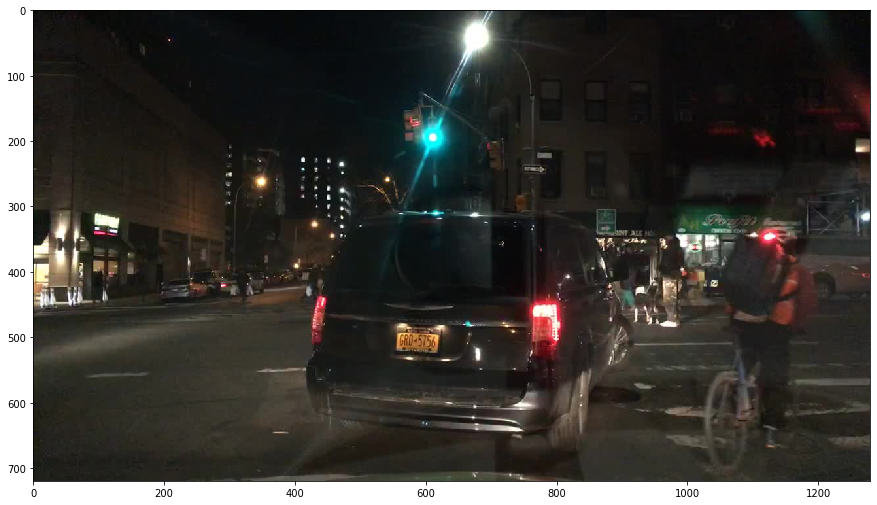

In [4]:
index = randint(0, len(person_img_names)-1)
print(index)
test_img = plt.imread("../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/" + person_img_names[index] + ".jpg")
plt.figure(figsize = (15, 10))
plt.imshow(test_img)

# Generate Sub Images Including Person and Annotations

In [23]:
# Generate sub-image data
count = 0

sub_names = []
sub_infor = []

for img_name in person_img_names:
    
    img_path = f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{img_name}.jpg"
    xml_path = f"../datasets/bdd100k/xml/train/{img_name}.xml"

    image = cv2.imread(img_path)

    img_info = []
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            
            if obj_name == "person":
                bndbox = obj.find('bndbox')
                left = bndbox.find('xmin').text
                top = bndbox.find('ymin').text
                right = bndbox.find('xmax').text
                bottom = bndbox.find('ymax').text

                img_info.append([obj_name, left, top, right, bottom])

    # Innitialize
    w = 608
    h = 608

    # Crop Image
    top_left = [[0, 112], [336, 112], [672, 112]]
    patches = []
    
    for point in top_left:
        patch = image[point[1]:point[1]+h, point[0]:point[0]+w]
        patches.append(patch)
    
    # Generate Info
    patch_info_0 = []
    patch_info_1 = []
    patch_info_2 = []

    for obj in img_info:
        x1 = int(obj[1])
        y1 = int(obj[2])
        x2 = int(obj[3])
        y2 = int(obj[4])
        
        # Patch 0
        if x1 < 608 and x2 > 0 and y1 < 720 and y2 > 112:           
            x1_ = x1 - 0
            y1_ = y1 - 112
            x2_ = x2 - 0
            y2_ = y2 - 112
            
            if x2_ >= 608: x2_ = 607
            if y1_ <= 0: y1_ = 1
            
            patch_info_0.append([obj[0], x1_, y1_, x2_, y2_])
            
        # Patch 1
        if x1 < 944 and x2 > 336 and y1 < 720 and y2 > 112:
            x1_ = x1 - 336
            y1_ = y1 - 112
            x2_ = x2 - 336
            y2_ = y2 - 112
            
            if x1_ <= 0: x1_ = 1
            if x2_ >= 608: x2_ = 607
            if y1_ <= 0: y1_ = 1
            
            patch_info_1.append([obj[0], x1_, y1_, x2_, y2_])

        # Patch 2
        if x1 < 1280 and x2 > 672 and y1 < 720 and y2 > 112:
            x1_ = x1 - 672
            y1_ = y1 - 112
            x2_ = x2 - 672
            y2_ = y2 - 112
            
            if x1_ <= 0: x1_ = 1
            if y1_ <= 0: y1_ = 1
            
            patch_info_2.append([obj[0], x1_, y1_, x2_, y2_])         
    
    # Write Text and Patches
    # Patch 0
    if len(patch_info_0) > 0:
        text_file = open(f"./608_sub_samples/patch-labels/{img_name}_608_0.txt", "w+")
        for infor in patch_info_0:
            print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
        text_file.close()
        cv2.imwrite(f"./608_sub_samples/patches/{img_name}_608_0.jpg", patches[0])
    
    # Patch 1
    if len(patch_info_1) > 0:
        text_file = open(f"./608_sub_samples/patch-labels/{img_name}_608_1.txt", "w+")
        for infor in patch_info_1:
            print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
        text_file.close()
        cv2.imwrite(f"./608_sub_samples/patches/{img_name}_608_1.jpg", patches[1])
            
    # Patch 2
    if len(patch_info_2) > 0:
        text_file = open(f"./608_sub_samples/patch-labels/{img_name}_608_2.txt", "w+")
        for infor in patch_info_2:
            print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
        text_file.close() 
        cv2.imwrite(f"./608_sub_samples/patches/{img_name}_608_2.jpg", patches[2])
        
    count += 1  
    print(count, f"- {len(person_img_names)}")
#     if count == 10: break

1 - 22076
2 - 22076
3 - 22076
4 - 22076
5 - 22076
6 - 22076
7 - 22076
8 - 22076
9 - 22076
10 - 22076
11 - 22076
12 - 22076
13 - 22076
14 - 22076
15 - 22076
16 - 22076
17 - 22076
18 - 22076
19 - 22076
20 - 22076
21 - 22076
22 - 22076
23 - 22076
24 - 22076
25 - 22076
26 - 22076
27 - 22076
28 - 22076
29 - 22076
30 - 22076
31 - 22076
32 - 22076
33 - 22076
34 - 22076
35 - 22076
36 - 22076
37 - 22076
38 - 22076
39 - 22076
40 - 22076
41 - 22076
42 - 22076
43 - 22076
44 - 22076
45 - 22076
46 - 22076
47 - 22076
48 - 22076
49 - 22076
50 - 22076
51 - 22076
52 - 22076
53 - 22076
54 - 22076
55 - 22076
56 - 22076
57 - 22076
58 - 22076
59 - 22076
60 - 22076
61 - 22076
62 - 22076
63 - 22076
64 - 22076
65 - 22076
66 - 22076
67 - 22076
68 - 22076
69 - 22076
70 - 22076
71 - 22076
72 - 22076
73 - 22076
74 - 22076
75 - 22076
76 - 22076
77 - 22076
78 - 22076
79 - 22076
80 - 22076
81 - 22076
82 - 22076
83 - 22076
84 - 22076
85 - 22076
86 - 22076
87 - 22076
88 - 22076
89 - 22076
90 - 22076
91 - 22076
92 - 220

696 - 22076
697 - 22076
698 - 22076
699 - 22076
700 - 22076
701 - 22076
702 - 22076
703 - 22076
704 - 22076
705 - 22076
706 - 22076
707 - 22076
708 - 22076
709 - 22076
710 - 22076
711 - 22076
712 - 22076
713 - 22076
714 - 22076
715 - 22076
716 - 22076
717 - 22076
718 - 22076
719 - 22076
720 - 22076
721 - 22076
722 - 22076
723 - 22076
724 - 22076
725 - 22076
726 - 22076
727 - 22076
728 - 22076
729 - 22076
730 - 22076
731 - 22076
732 - 22076
733 - 22076
734 - 22076
735 - 22076
736 - 22076
737 - 22076
738 - 22076
739 - 22076
740 - 22076
741 - 22076
742 - 22076
743 - 22076
744 - 22076
745 - 22076
746 - 22076
747 - 22076
748 - 22076
749 - 22076
750 - 22076
751 - 22076
752 - 22076
753 - 22076
754 - 22076
755 - 22076
756 - 22076
757 - 22076
758 - 22076
759 - 22076
760 - 22076
761 - 22076
762 - 22076
763 - 22076
764 - 22076
765 - 22076
766 - 22076
767 - 22076
768 - 22076
769 - 22076
770 - 22076
771 - 22076
772 - 22076
773 - 22076
774 - 22076
775 - 22076
776 - 22076
777 - 22076
778 - 22076
779 

1352 - 22076
1353 - 22076
1354 - 22076
1355 - 22076
1356 - 22076
1357 - 22076
1358 - 22076
1359 - 22076
1360 - 22076
1361 - 22076
1362 - 22076
1363 - 22076
1364 - 22076
1365 - 22076
1366 - 22076
1367 - 22076
1368 - 22076
1369 - 22076
1370 - 22076
1371 - 22076
1372 - 22076
1373 - 22076
1374 - 22076
1375 - 22076
1376 - 22076
1377 - 22076
1378 - 22076
1379 - 22076
1380 - 22076
1381 - 22076
1382 - 22076
1383 - 22076
1384 - 22076
1385 - 22076
1386 - 22076
1387 - 22076
1388 - 22076
1389 - 22076
1390 - 22076
1391 - 22076
1392 - 22076
1393 - 22076
1394 - 22076
1395 - 22076
1396 - 22076
1397 - 22076
1398 - 22076
1399 - 22076
1400 - 22076
1401 - 22076
1402 - 22076
1403 - 22076
1404 - 22076
1405 - 22076
1406 - 22076
1407 - 22076
1408 - 22076
1409 - 22076
1410 - 22076
1411 - 22076
1412 - 22076
1413 - 22076
1414 - 22076
1415 - 22076
1416 - 22076
1417 - 22076
1418 - 22076
1419 - 22076
1420 - 22076
1421 - 22076
1422 - 22076
1423 - 22076
1424 - 22076
1425 - 22076
1426 - 22076
1427 - 22076
1428 - 22076

1984 - 22076
1985 - 22076
1986 - 22076
1987 - 22076
1988 - 22076
1989 - 22076
1990 - 22076
1991 - 22076
1992 - 22076
1993 - 22076
1994 - 22076
1995 - 22076
1996 - 22076
1997 - 22076
1998 - 22076
1999 - 22076
2000 - 22076
2001 - 22076
2002 - 22076
2003 - 22076
2004 - 22076
2005 - 22076
2006 - 22076
2007 - 22076
2008 - 22076
2009 - 22076
2010 - 22076
2011 - 22076
2012 - 22076
2013 - 22076
2014 - 22076
2015 - 22076
2016 - 22076
2017 - 22076
2018 - 22076
2019 - 22076
2020 - 22076
2021 - 22076
2022 - 22076
2023 - 22076
2024 - 22076
2025 - 22076
2026 - 22076
2027 - 22076
2028 - 22076
2029 - 22076
2030 - 22076
2031 - 22076
2032 - 22076
2033 - 22076
2034 - 22076
2035 - 22076
2036 - 22076
2037 - 22076
2038 - 22076
2039 - 22076
2040 - 22076
2041 - 22076
2042 - 22076
2043 - 22076
2044 - 22076
2045 - 22076
2046 - 22076
2047 - 22076
2048 - 22076
2049 - 22076
2050 - 22076
2051 - 22076
2052 - 22076
2053 - 22076
2054 - 22076
2055 - 22076
2056 - 22076
2057 - 22076
2058 - 22076
2059 - 22076
2060 - 22076

2616 - 22076
2617 - 22076
2618 - 22076
2619 - 22076
2620 - 22076
2621 - 22076
2622 - 22076
2623 - 22076
2624 - 22076
2625 - 22076
2626 - 22076
2627 - 22076
2628 - 22076
2629 - 22076
2630 - 22076
2631 - 22076
2632 - 22076
2633 - 22076
2634 - 22076
2635 - 22076
2636 - 22076
2637 - 22076
2638 - 22076
2639 - 22076
2640 - 22076
2641 - 22076
2642 - 22076
2643 - 22076
2644 - 22076
2645 - 22076
2646 - 22076
2647 - 22076
2648 - 22076
2649 - 22076
2650 - 22076
2651 - 22076
2652 - 22076
2653 - 22076
2654 - 22076
2655 - 22076
2656 - 22076
2657 - 22076
2658 - 22076
2659 - 22076
2660 - 22076
2661 - 22076
2662 - 22076
2663 - 22076
2664 - 22076
2665 - 22076
2666 - 22076
2667 - 22076
2668 - 22076
2669 - 22076
2670 - 22076
2671 - 22076
2672 - 22076
2673 - 22076
2674 - 22076
2675 - 22076
2676 - 22076
2677 - 22076
2678 - 22076
2679 - 22076
2680 - 22076
2681 - 22076
2682 - 22076
2683 - 22076
2684 - 22076
2685 - 22076
2686 - 22076
2687 - 22076
2688 - 22076
2689 - 22076
2690 - 22076
2691 - 22076
2692 - 22076

3251 - 22076
3252 - 22076
3253 - 22076
3254 - 22076
3255 - 22076
3256 - 22076
3257 - 22076
3258 - 22076
3259 - 22076
3260 - 22076
3261 - 22076
3262 - 22076
3263 - 22076
3264 - 22076
3265 - 22076
3266 - 22076
3267 - 22076
3268 - 22076
3269 - 22076
3270 - 22076
3271 - 22076
3272 - 22076
3273 - 22076
3274 - 22076
3275 - 22076
3276 - 22076
3277 - 22076
3278 - 22076
3279 - 22076
3280 - 22076
3281 - 22076
3282 - 22076
3283 - 22076
3284 - 22076
3285 - 22076
3286 - 22076
3287 - 22076
3288 - 22076
3289 - 22076
3290 - 22076
3291 - 22076
3292 - 22076
3293 - 22076
3294 - 22076
3295 - 22076
3296 - 22076
3297 - 22076
3298 - 22076
3299 - 22076
3300 - 22076
3301 - 22076
3302 - 22076
3303 - 22076
3304 - 22076
3305 - 22076
3306 - 22076
3307 - 22076
3308 - 22076
3309 - 22076
3310 - 22076
3311 - 22076
3312 - 22076
3313 - 22076
3314 - 22076
3315 - 22076
3316 - 22076
3317 - 22076
3318 - 22076
3319 - 22076
3320 - 22076
3321 - 22076
3322 - 22076
3323 - 22076
3324 - 22076
3325 - 22076
3326 - 22076
3327 - 22076

3886 - 22076
3887 - 22076
3888 - 22076
3889 - 22076
3890 - 22076
3891 - 22076
3892 - 22076
3893 - 22076
3894 - 22076
3895 - 22076
3896 - 22076
3897 - 22076
3898 - 22076
3899 - 22076
3900 - 22076
3901 - 22076
3902 - 22076
3903 - 22076
3904 - 22076
3905 - 22076
3906 - 22076
3907 - 22076
3908 - 22076
3909 - 22076
3910 - 22076
3911 - 22076
3912 - 22076
3913 - 22076
3914 - 22076
3915 - 22076
3916 - 22076
3917 - 22076
3918 - 22076
3919 - 22076
3920 - 22076
3921 - 22076
3922 - 22076
3923 - 22076
3924 - 22076
3925 - 22076
3926 - 22076
3927 - 22076
3928 - 22076
3929 - 22076
3930 - 22076
3931 - 22076
3932 - 22076
3933 - 22076
3934 - 22076
3935 - 22076
3936 - 22076
3937 - 22076
3938 - 22076
3939 - 22076
3940 - 22076
3941 - 22076
3942 - 22076
3943 - 22076
3944 - 22076
3945 - 22076
3946 - 22076
3947 - 22076
3948 - 22076
3949 - 22076
3950 - 22076
3951 - 22076
3952 - 22076
3953 - 22076
3954 - 22076
3955 - 22076
3956 - 22076
3957 - 22076
3958 - 22076
3959 - 22076
3960 - 22076
3961 - 22076
3962 - 22076

4520 - 22076
4521 - 22076
4522 - 22076
4523 - 22076
4524 - 22076
4525 - 22076
4526 - 22076
4527 - 22076
4528 - 22076
4529 - 22076
4530 - 22076
4531 - 22076
4532 - 22076
4533 - 22076
4534 - 22076
4535 - 22076
4536 - 22076
4537 - 22076
4538 - 22076
4539 - 22076
4540 - 22076
4541 - 22076
4542 - 22076
4543 - 22076
4544 - 22076
4545 - 22076
4546 - 22076
4547 - 22076
4548 - 22076
4549 - 22076
4550 - 22076
4551 - 22076
4552 - 22076
4553 - 22076
4554 - 22076
4555 - 22076
4556 - 22076
4557 - 22076
4558 - 22076
4559 - 22076
4560 - 22076
4561 - 22076
4562 - 22076
4563 - 22076
4564 - 22076
4565 - 22076
4566 - 22076
4567 - 22076
4568 - 22076
4569 - 22076
4570 - 22076
4571 - 22076
4572 - 22076
4573 - 22076
4574 - 22076
4575 - 22076
4576 - 22076
4577 - 22076
4578 - 22076
4579 - 22076
4580 - 22076
4581 - 22076
4582 - 22076
4583 - 22076
4584 - 22076
4585 - 22076
4586 - 22076
4587 - 22076
4588 - 22076
4589 - 22076
4590 - 22076
4591 - 22076
4592 - 22076
4593 - 22076
4594 - 22076
4595 - 22076
4596 - 22076

5154 - 22076
5155 - 22076
5156 - 22076
5157 - 22076
5158 - 22076
5159 - 22076
5160 - 22076
5161 - 22076
5162 - 22076
5163 - 22076
5164 - 22076
5165 - 22076
5166 - 22076
5167 - 22076
5168 - 22076
5169 - 22076
5170 - 22076
5171 - 22076
5172 - 22076
5173 - 22076
5174 - 22076
5175 - 22076
5176 - 22076
5177 - 22076
5178 - 22076
5179 - 22076
5180 - 22076
5181 - 22076
5182 - 22076
5183 - 22076
5184 - 22076
5185 - 22076
5186 - 22076
5187 - 22076
5188 - 22076
5189 - 22076
5190 - 22076
5191 - 22076
5192 - 22076
5193 - 22076
5194 - 22076
5195 - 22076
5196 - 22076
5197 - 22076
5198 - 22076
5199 - 22076
5200 - 22076
5201 - 22076
5202 - 22076
5203 - 22076
5204 - 22076
5205 - 22076
5206 - 22076
5207 - 22076
5208 - 22076
5209 - 22076
5210 - 22076
5211 - 22076
5212 - 22076
5213 - 22076
5214 - 22076
5215 - 22076
5216 - 22076
5217 - 22076
5218 - 22076
5219 - 22076
5220 - 22076
5221 - 22076
5222 - 22076
5223 - 22076
5224 - 22076
5225 - 22076
5226 - 22076
5227 - 22076
5228 - 22076
5229 - 22076
5230 - 22076

5788 - 22076
5789 - 22076
5790 - 22076
5791 - 22076
5792 - 22076
5793 - 22076
5794 - 22076
5795 - 22076
5796 - 22076
5797 - 22076
5798 - 22076
5799 - 22076
5800 - 22076
5801 - 22076
5802 - 22076
5803 - 22076
5804 - 22076
5805 - 22076
5806 - 22076
5807 - 22076
5808 - 22076
5809 - 22076
5810 - 22076
5811 - 22076
5812 - 22076
5813 - 22076
5814 - 22076
5815 - 22076
5816 - 22076
5817 - 22076
5818 - 22076
5819 - 22076
5820 - 22076
5821 - 22076
5822 - 22076
5823 - 22076
5824 - 22076
5825 - 22076
5826 - 22076
5827 - 22076
5828 - 22076
5829 - 22076
5830 - 22076
5831 - 22076
5832 - 22076
5833 - 22076
5834 - 22076
5835 - 22076
5836 - 22076
5837 - 22076
5838 - 22076
5839 - 22076
5840 - 22076
5841 - 22076
5842 - 22076
5843 - 22076
5844 - 22076
5845 - 22076
5846 - 22076
5847 - 22076
5848 - 22076
5849 - 22076
5850 - 22076
5851 - 22076
5852 - 22076
5853 - 22076
5854 - 22076
5855 - 22076
5856 - 22076
5857 - 22076
5858 - 22076
5859 - 22076
5860 - 22076
5861 - 22076
5862 - 22076
5863 - 22076
5864 - 22076

6420 - 22076
6421 - 22076
6422 - 22076
6423 - 22076
6424 - 22076
6425 - 22076
6426 - 22076
6427 - 22076
6428 - 22076
6429 - 22076
6430 - 22076
6431 - 22076
6432 - 22076
6433 - 22076
6434 - 22076
6435 - 22076
6436 - 22076
6437 - 22076
6438 - 22076
6439 - 22076
6440 - 22076
6441 - 22076
6442 - 22076
6443 - 22076
6444 - 22076
6445 - 22076
6446 - 22076
6447 - 22076
6448 - 22076
6449 - 22076
6450 - 22076
6451 - 22076
6452 - 22076
6453 - 22076
6454 - 22076
6455 - 22076
6456 - 22076
6457 - 22076
6458 - 22076
6459 - 22076
6460 - 22076
6461 - 22076
6462 - 22076
6463 - 22076
6464 - 22076
6465 - 22076
6466 - 22076
6467 - 22076
6468 - 22076
6469 - 22076
6470 - 22076
6471 - 22076
6472 - 22076
6473 - 22076
6474 - 22076
6475 - 22076
6476 - 22076
6477 - 22076
6478 - 22076
6479 - 22076
6480 - 22076
6481 - 22076
6482 - 22076
6483 - 22076
6484 - 22076
6485 - 22076
6486 - 22076
6487 - 22076
6488 - 22076
6489 - 22076
6490 - 22076
6491 - 22076
6492 - 22076
6493 - 22076
6494 - 22076
6495 - 22076
6496 - 22076

7051 - 22076
7052 - 22076
7053 - 22076
7054 - 22076
7055 - 22076
7056 - 22076
7057 - 22076
7058 - 22076
7059 - 22076
7060 - 22076
7061 - 22076
7062 - 22076
7063 - 22076
7064 - 22076
7065 - 22076
7066 - 22076
7067 - 22076
7068 - 22076
7069 - 22076
7070 - 22076
7071 - 22076
7072 - 22076
7073 - 22076
7074 - 22076
7075 - 22076
7076 - 22076
7077 - 22076
7078 - 22076
7079 - 22076
7080 - 22076
7081 - 22076
7082 - 22076
7083 - 22076
7084 - 22076
7085 - 22076
7086 - 22076
7087 - 22076
7088 - 22076
7089 - 22076
7090 - 22076
7091 - 22076
7092 - 22076
7093 - 22076
7094 - 22076
7095 - 22076
7096 - 22076
7097 - 22076
7098 - 22076
7099 - 22076
7100 - 22076
7101 - 22076
7102 - 22076
7103 - 22076
7104 - 22076
7105 - 22076
7106 - 22076
7107 - 22076
7108 - 22076
7109 - 22076
7110 - 22076
7111 - 22076
7112 - 22076
7113 - 22076
7114 - 22076
7115 - 22076
7116 - 22076
7117 - 22076
7118 - 22076
7119 - 22076
7120 - 22076
7121 - 22076
7122 - 22076
7123 - 22076
7124 - 22076
7125 - 22076
7126 - 22076
7127 - 22076

7682 - 22076
7683 - 22076
7684 - 22076
7685 - 22076
7686 - 22076
7687 - 22076
7688 - 22076
7689 - 22076
7690 - 22076
7691 - 22076
7692 - 22076
7693 - 22076
7694 - 22076
7695 - 22076
7696 - 22076
7697 - 22076
7698 - 22076
7699 - 22076
7700 - 22076
7701 - 22076
7702 - 22076
7703 - 22076
7704 - 22076
7705 - 22076
7706 - 22076
7707 - 22076
7708 - 22076
7709 - 22076
7710 - 22076
7711 - 22076
7712 - 22076
7713 - 22076
7714 - 22076
7715 - 22076
7716 - 22076
7717 - 22076
7718 - 22076
7719 - 22076
7720 - 22076
7721 - 22076
7722 - 22076
7723 - 22076
7724 - 22076
7725 - 22076
7726 - 22076
7727 - 22076
7728 - 22076
7729 - 22076
7730 - 22076
7731 - 22076
7732 - 22076
7733 - 22076
7734 - 22076
7735 - 22076
7736 - 22076
7737 - 22076
7738 - 22076
7739 - 22076
7740 - 22076
7741 - 22076
7742 - 22076
7743 - 22076
7744 - 22076
7745 - 22076
7746 - 22076
7747 - 22076
7748 - 22076
7749 - 22076
7750 - 22076
7751 - 22076
7752 - 22076
7753 - 22076
7754 - 22076
7755 - 22076
7756 - 22076
7757 - 22076
7758 - 22076

8314 - 22076
8315 - 22076
8316 - 22076
8317 - 22076
8318 - 22076
8319 - 22076
8320 - 22076
8321 - 22076
8322 - 22076
8323 - 22076
8324 - 22076
8325 - 22076
8326 - 22076
8327 - 22076
8328 - 22076
8329 - 22076
8330 - 22076
8331 - 22076
8332 - 22076
8333 - 22076
8334 - 22076
8335 - 22076
8336 - 22076
8337 - 22076
8338 - 22076
8339 - 22076
8340 - 22076
8341 - 22076
8342 - 22076
8343 - 22076
8344 - 22076
8345 - 22076
8346 - 22076
8347 - 22076
8348 - 22076
8349 - 22076
8350 - 22076
8351 - 22076
8352 - 22076
8353 - 22076
8354 - 22076
8355 - 22076
8356 - 22076
8357 - 22076
8358 - 22076
8359 - 22076
8360 - 22076
8361 - 22076
8362 - 22076
8363 - 22076
8364 - 22076
8365 - 22076
8366 - 22076
8367 - 22076
8368 - 22076
8369 - 22076
8370 - 22076
8371 - 22076
8372 - 22076
8373 - 22076
8374 - 22076
8375 - 22076
8376 - 22076
8377 - 22076
8378 - 22076
8379 - 22076
8380 - 22076
8381 - 22076
8382 - 22076
8383 - 22076
8384 - 22076
8385 - 22076
8386 - 22076
8387 - 22076
8388 - 22076
8389 - 22076
8390 - 22076

8948 - 22076
8949 - 22076
8950 - 22076
8951 - 22076
8952 - 22076
8953 - 22076
8954 - 22076
8955 - 22076
8956 - 22076
8957 - 22076
8958 - 22076
8959 - 22076
8960 - 22076
8961 - 22076
8962 - 22076
8963 - 22076
8964 - 22076
8965 - 22076
8966 - 22076
8967 - 22076
8968 - 22076
8969 - 22076
8970 - 22076
8971 - 22076
8972 - 22076
8973 - 22076
8974 - 22076
8975 - 22076
8976 - 22076
8977 - 22076
8978 - 22076
8979 - 22076
8980 - 22076
8981 - 22076
8982 - 22076
8983 - 22076
8984 - 22076
8985 - 22076
8986 - 22076
8987 - 22076
8988 - 22076
8989 - 22076
8990 - 22076
8991 - 22076
8992 - 22076
8993 - 22076
8994 - 22076
8995 - 22076
8996 - 22076
8997 - 22076
8998 - 22076
8999 - 22076
9000 - 22076
9001 - 22076
9002 - 22076
9003 - 22076
9004 - 22076
9005 - 22076
9006 - 22076
9007 - 22076
9008 - 22076
9009 - 22076
9010 - 22076
9011 - 22076
9012 - 22076
9013 - 22076
9014 - 22076
9015 - 22076
9016 - 22076
9017 - 22076
9018 - 22076
9019 - 22076
9020 - 22076
9021 - 22076
9022 - 22076
9023 - 22076
9024 - 22076

9579 - 22076
9580 - 22076
9581 - 22076
9582 - 22076
9583 - 22076
9584 - 22076
9585 - 22076
9586 - 22076
9587 - 22076
9588 - 22076
9589 - 22076
9590 - 22076
9591 - 22076
9592 - 22076
9593 - 22076
9594 - 22076
9595 - 22076
9596 - 22076
9597 - 22076
9598 - 22076
9599 - 22076
9600 - 22076
9601 - 22076
9602 - 22076
9603 - 22076
9604 - 22076
9605 - 22076
9606 - 22076
9607 - 22076
9608 - 22076
9609 - 22076
9610 - 22076
9611 - 22076
9612 - 22076
9613 - 22076
9614 - 22076
9615 - 22076
9616 - 22076
9617 - 22076
9618 - 22076
9619 - 22076
9620 - 22076
9621 - 22076
9622 - 22076
9623 - 22076
9624 - 22076
9625 - 22076
9626 - 22076
9627 - 22076
9628 - 22076
9629 - 22076
9630 - 22076
9631 - 22076
9632 - 22076
9633 - 22076
9634 - 22076
9635 - 22076
9636 - 22076
9637 - 22076
9638 - 22076
9639 - 22076
9640 - 22076
9641 - 22076
9642 - 22076
9643 - 22076
9644 - 22076
9645 - 22076
9646 - 22076
9647 - 22076
9648 - 22076
9649 - 22076
9650 - 22076
9651 - 22076
9652 - 22076
9653 - 22076
9654 - 22076
9655 - 22076

10195 - 22076
10196 - 22076
10197 - 22076
10198 - 22076
10199 - 22076
10200 - 22076
10201 - 22076
10202 - 22076
10203 - 22076
10204 - 22076
10205 - 22076
10206 - 22076
10207 - 22076
10208 - 22076
10209 - 22076
10210 - 22076
10211 - 22076
10212 - 22076
10213 - 22076
10214 - 22076
10215 - 22076
10216 - 22076
10217 - 22076
10218 - 22076
10219 - 22076
10220 - 22076
10221 - 22076
10222 - 22076
10223 - 22076
10224 - 22076
10225 - 22076
10226 - 22076
10227 - 22076
10228 - 22076
10229 - 22076
10230 - 22076
10231 - 22076
10232 - 22076
10233 - 22076
10234 - 22076
10235 - 22076
10236 - 22076
10237 - 22076
10238 - 22076
10239 - 22076
10240 - 22076
10241 - 22076
10242 - 22076
10243 - 22076
10244 - 22076
10245 - 22076
10246 - 22076
10247 - 22076
10248 - 22076
10249 - 22076
10250 - 22076
10251 - 22076
10252 - 22076
10253 - 22076
10254 - 22076
10255 - 22076
10256 - 22076
10257 - 22076
10258 - 22076
10259 - 22076
10260 - 22076
10261 - 22076
10262 - 22076
10263 - 22076
10264 - 22076
10265 - 22076
10266 

10782 - 22076
10783 - 22076
10784 - 22076
10785 - 22076
10786 - 22076
10787 - 22076
10788 - 22076
10789 - 22076
10790 - 22076
10791 - 22076
10792 - 22076
10793 - 22076
10794 - 22076
10795 - 22076
10796 - 22076
10797 - 22076
10798 - 22076
10799 - 22076
10800 - 22076
10801 - 22076
10802 - 22076
10803 - 22076
10804 - 22076
10805 - 22076
10806 - 22076
10807 - 22076
10808 - 22076
10809 - 22076
10810 - 22076
10811 - 22076
10812 - 22076
10813 - 22076
10814 - 22076
10815 - 22076
10816 - 22076
10817 - 22076
10818 - 22076
10819 - 22076
10820 - 22076
10821 - 22076
10822 - 22076
10823 - 22076
10824 - 22076
10825 - 22076
10826 - 22076
10827 - 22076
10828 - 22076
10829 - 22076
10830 - 22076
10831 - 22076
10832 - 22076
10833 - 22076
10834 - 22076
10835 - 22076
10836 - 22076
10837 - 22076
10838 - 22076
10839 - 22076
10840 - 22076
10841 - 22076
10842 - 22076
10843 - 22076
10844 - 22076
10845 - 22076
10846 - 22076
10847 - 22076
10848 - 22076
10849 - 22076
10850 - 22076
10851 - 22076
10852 - 22076
10853 

11371 - 22076
11372 - 22076
11373 - 22076
11374 - 22076
11375 - 22076
11376 - 22076
11377 - 22076
11378 - 22076
11379 - 22076
11380 - 22076
11381 - 22076
11382 - 22076
11383 - 22076
11384 - 22076
11385 - 22076
11386 - 22076
11387 - 22076
11388 - 22076
11389 - 22076
11390 - 22076
11391 - 22076
11392 - 22076
11393 - 22076
11394 - 22076
11395 - 22076
11396 - 22076
11397 - 22076
11398 - 22076
11399 - 22076
11400 - 22076
11401 - 22076
11402 - 22076
11403 - 22076
11404 - 22076
11405 - 22076
11406 - 22076
11407 - 22076
11408 - 22076
11409 - 22076
11410 - 22076
11411 - 22076
11412 - 22076
11413 - 22076
11414 - 22076
11415 - 22076
11416 - 22076
11417 - 22076
11418 - 22076
11419 - 22076
11420 - 22076
11421 - 22076
11422 - 22076
11423 - 22076
11424 - 22076
11425 - 22076
11426 - 22076
11427 - 22076
11428 - 22076
11429 - 22076
11430 - 22076
11431 - 22076
11432 - 22076
11433 - 22076
11434 - 22076
11435 - 22076
11436 - 22076
11437 - 22076
11438 - 22076
11439 - 22076
11440 - 22076
11441 - 22076
11442 

11960 - 22076
11961 - 22076
11962 - 22076
11963 - 22076
11964 - 22076
11965 - 22076
11966 - 22076
11967 - 22076
11968 - 22076
11969 - 22076
11970 - 22076
11971 - 22076
11972 - 22076
11973 - 22076
11974 - 22076
11975 - 22076
11976 - 22076
11977 - 22076
11978 - 22076
11979 - 22076
11980 - 22076
11981 - 22076
11982 - 22076
11983 - 22076
11984 - 22076
11985 - 22076
11986 - 22076
11987 - 22076
11988 - 22076
11989 - 22076
11990 - 22076
11991 - 22076
11992 - 22076
11993 - 22076
11994 - 22076
11995 - 22076
11996 - 22076
11997 - 22076
11998 - 22076
11999 - 22076
12000 - 22076
12001 - 22076
12002 - 22076
12003 - 22076
12004 - 22076
12005 - 22076
12006 - 22076
12007 - 22076
12008 - 22076
12009 - 22076
12010 - 22076
12011 - 22076
12012 - 22076
12013 - 22076
12014 - 22076
12015 - 22076
12016 - 22076
12017 - 22076
12018 - 22076
12019 - 22076
12020 - 22076
12021 - 22076
12022 - 22076
12023 - 22076
12024 - 22076
12025 - 22076
12026 - 22076
12027 - 22076
12028 - 22076
12029 - 22076
12030 - 22076
12031 

12546 - 22076
12547 - 22076
12548 - 22076
12549 - 22076
12550 - 22076
12551 - 22076
12552 - 22076
12553 - 22076
12554 - 22076
12555 - 22076
12556 - 22076
12557 - 22076
12558 - 22076
12559 - 22076
12560 - 22076
12561 - 22076
12562 - 22076
12563 - 22076
12564 - 22076
12565 - 22076
12566 - 22076
12567 - 22076
12568 - 22076
12569 - 22076
12570 - 22076
12571 - 22076
12572 - 22076
12573 - 22076
12574 - 22076
12575 - 22076
12576 - 22076
12577 - 22076
12578 - 22076
12579 - 22076
12580 - 22076
12581 - 22076
12582 - 22076
12583 - 22076
12584 - 22076
12585 - 22076
12586 - 22076
12587 - 22076
12588 - 22076
12589 - 22076
12590 - 22076
12591 - 22076
12592 - 22076
12593 - 22076
12594 - 22076
12595 - 22076
12596 - 22076
12597 - 22076
12598 - 22076
12599 - 22076
12600 - 22076
12601 - 22076
12602 - 22076
12603 - 22076
12604 - 22076
12605 - 22076
12606 - 22076
12607 - 22076
12608 - 22076
12609 - 22076
12610 - 22076
12611 - 22076
12612 - 22076
12613 - 22076
12614 - 22076
12615 - 22076
12616 - 22076
12617 

13135 - 22076
13136 - 22076
13137 - 22076
13138 - 22076
13139 - 22076
13140 - 22076
13141 - 22076
13142 - 22076
13143 - 22076
13144 - 22076
13145 - 22076
13146 - 22076
13147 - 22076
13148 - 22076
13149 - 22076
13150 - 22076
13151 - 22076
13152 - 22076
13153 - 22076
13154 - 22076
13155 - 22076
13156 - 22076
13157 - 22076
13158 - 22076
13159 - 22076
13160 - 22076
13161 - 22076
13162 - 22076
13163 - 22076
13164 - 22076
13165 - 22076
13166 - 22076
13167 - 22076
13168 - 22076
13169 - 22076
13170 - 22076
13171 - 22076
13172 - 22076
13173 - 22076
13174 - 22076
13175 - 22076
13176 - 22076
13177 - 22076
13178 - 22076
13179 - 22076
13180 - 22076
13181 - 22076
13182 - 22076
13183 - 22076
13184 - 22076
13185 - 22076
13186 - 22076
13187 - 22076
13188 - 22076
13189 - 22076
13190 - 22076
13191 - 22076
13192 - 22076
13193 - 22076
13194 - 22076
13195 - 22076
13196 - 22076
13197 - 22076
13198 - 22076
13199 - 22076
13200 - 22076
13201 - 22076
13202 - 22076
13203 - 22076
13204 - 22076
13205 - 22076
13206 

13722 - 22076
13723 - 22076
13724 - 22076
13725 - 22076
13726 - 22076
13727 - 22076
13728 - 22076
13729 - 22076
13730 - 22076
13731 - 22076
13732 - 22076
13733 - 22076
13734 - 22076
13735 - 22076
13736 - 22076
13737 - 22076
13738 - 22076
13739 - 22076
13740 - 22076
13741 - 22076
13742 - 22076
13743 - 22076
13744 - 22076
13745 - 22076
13746 - 22076
13747 - 22076
13748 - 22076
13749 - 22076
13750 - 22076
13751 - 22076
13752 - 22076
13753 - 22076
13754 - 22076
13755 - 22076
13756 - 22076
13757 - 22076
13758 - 22076
13759 - 22076
13760 - 22076
13761 - 22076
13762 - 22076
13763 - 22076
13764 - 22076
13765 - 22076
13766 - 22076
13767 - 22076
13768 - 22076
13769 - 22076
13770 - 22076
13771 - 22076
13772 - 22076
13773 - 22076
13774 - 22076
13775 - 22076
13776 - 22076
13777 - 22076
13778 - 22076
13779 - 22076
13780 - 22076
13781 - 22076
13782 - 22076
13783 - 22076
13784 - 22076
13785 - 22076
13786 - 22076
13787 - 22076
13788 - 22076
13789 - 22076
13790 - 22076
13791 - 22076
13792 - 22076
13793 

14308 - 22076
14309 - 22076
14310 - 22076
14311 - 22076
14312 - 22076
14313 - 22076
14314 - 22076
14315 - 22076
14316 - 22076
14317 - 22076
14318 - 22076
14319 - 22076
14320 - 22076
14321 - 22076
14322 - 22076
14323 - 22076
14324 - 22076
14325 - 22076
14326 - 22076
14327 - 22076
14328 - 22076
14329 - 22076
14330 - 22076
14331 - 22076
14332 - 22076
14333 - 22076
14334 - 22076
14335 - 22076
14336 - 22076
14337 - 22076
14338 - 22076
14339 - 22076
14340 - 22076
14341 - 22076
14342 - 22076
14343 - 22076
14344 - 22076
14345 - 22076
14346 - 22076
14347 - 22076
14348 - 22076
14349 - 22076
14350 - 22076
14351 - 22076
14352 - 22076
14353 - 22076
14354 - 22076
14355 - 22076
14356 - 22076
14357 - 22076
14358 - 22076
14359 - 22076
14360 - 22076
14361 - 22076
14362 - 22076
14363 - 22076
14364 - 22076
14365 - 22076
14366 - 22076
14367 - 22076
14368 - 22076
14369 - 22076
14370 - 22076
14371 - 22076
14372 - 22076
14373 - 22076
14374 - 22076
14375 - 22076
14376 - 22076
14377 - 22076
14378 - 22076
14379 

14897 - 22076
14898 - 22076
14899 - 22076
14900 - 22076
14901 - 22076
14902 - 22076
14903 - 22076
14904 - 22076
14905 - 22076
14906 - 22076
14907 - 22076
14908 - 22076
14909 - 22076
14910 - 22076
14911 - 22076
14912 - 22076
14913 - 22076
14914 - 22076
14915 - 22076
14916 - 22076
14917 - 22076
14918 - 22076
14919 - 22076
14920 - 22076
14921 - 22076
14922 - 22076
14923 - 22076
14924 - 22076
14925 - 22076
14926 - 22076
14927 - 22076
14928 - 22076
14929 - 22076
14930 - 22076
14931 - 22076
14932 - 22076
14933 - 22076
14934 - 22076
14935 - 22076
14936 - 22076
14937 - 22076
14938 - 22076
14939 - 22076
14940 - 22076
14941 - 22076
14942 - 22076
14943 - 22076
14944 - 22076
14945 - 22076
14946 - 22076
14947 - 22076
14948 - 22076
14949 - 22076
14950 - 22076
14951 - 22076
14952 - 22076
14953 - 22076
14954 - 22076
14955 - 22076
14956 - 22076
14957 - 22076
14958 - 22076
14959 - 22076
14960 - 22076
14961 - 22076
14962 - 22076
14963 - 22076
14964 - 22076
14965 - 22076
14966 - 22076
14967 - 22076
14968 

15483 - 22076
15484 - 22076
15485 - 22076
15486 - 22076
15487 - 22076
15488 - 22076
15489 - 22076
15490 - 22076
15491 - 22076
15492 - 22076
15493 - 22076
15494 - 22076
15495 - 22076
15496 - 22076
15497 - 22076
15498 - 22076
15499 - 22076
15500 - 22076
15501 - 22076
15502 - 22076
15503 - 22076
15504 - 22076
15505 - 22076
15506 - 22076
15507 - 22076
15508 - 22076
15509 - 22076
15510 - 22076
15511 - 22076
15512 - 22076
15513 - 22076
15514 - 22076
15515 - 22076
15516 - 22076
15517 - 22076
15518 - 22076
15519 - 22076
15520 - 22076
15521 - 22076
15522 - 22076
15523 - 22076
15524 - 22076
15525 - 22076
15526 - 22076
15527 - 22076
15528 - 22076
15529 - 22076
15530 - 22076
15531 - 22076
15532 - 22076
15533 - 22076
15534 - 22076
15535 - 22076
15536 - 22076
15537 - 22076
15538 - 22076
15539 - 22076
15540 - 22076
15541 - 22076
15542 - 22076
15543 - 22076
15544 - 22076
15545 - 22076
15546 - 22076
15547 - 22076
15548 - 22076
15549 - 22076
15550 - 22076
15551 - 22076
15552 - 22076
15553 - 22076
15554 

16069 - 22076
16070 - 22076
16071 - 22076
16072 - 22076
16073 - 22076
16074 - 22076
16075 - 22076
16076 - 22076
16077 - 22076
16078 - 22076
16079 - 22076
16080 - 22076
16081 - 22076
16082 - 22076
16083 - 22076
16084 - 22076
16085 - 22076
16086 - 22076
16087 - 22076
16088 - 22076
16089 - 22076
16090 - 22076
16091 - 22076
16092 - 22076
16093 - 22076
16094 - 22076
16095 - 22076
16096 - 22076
16097 - 22076
16098 - 22076
16099 - 22076
16100 - 22076
16101 - 22076
16102 - 22076
16103 - 22076
16104 - 22076
16105 - 22076
16106 - 22076
16107 - 22076
16108 - 22076
16109 - 22076
16110 - 22076
16111 - 22076
16112 - 22076
16113 - 22076
16114 - 22076
16115 - 22076
16116 - 22076
16117 - 22076
16118 - 22076
16119 - 22076
16120 - 22076
16121 - 22076
16122 - 22076
16123 - 22076
16124 - 22076
16125 - 22076
16126 - 22076
16127 - 22076
16128 - 22076
16129 - 22076
16130 - 22076
16131 - 22076
16132 - 22076
16133 - 22076
16134 - 22076
16135 - 22076
16136 - 22076
16137 - 22076
16138 - 22076
16139 - 22076
16140 

16656 - 22076
16657 - 22076
16658 - 22076
16659 - 22076
16660 - 22076
16661 - 22076
16662 - 22076
16663 - 22076
16664 - 22076
16665 - 22076
16666 - 22076
16667 - 22076
16668 - 22076
16669 - 22076
16670 - 22076
16671 - 22076
16672 - 22076
16673 - 22076
16674 - 22076
16675 - 22076
16676 - 22076
16677 - 22076
16678 - 22076
16679 - 22076
16680 - 22076
16681 - 22076
16682 - 22076
16683 - 22076
16684 - 22076
16685 - 22076
16686 - 22076
16687 - 22076
16688 - 22076
16689 - 22076
16690 - 22076
16691 - 22076
16692 - 22076
16693 - 22076
16694 - 22076
16695 - 22076
16696 - 22076
16697 - 22076
16698 - 22076
16699 - 22076
16700 - 22076
16701 - 22076
16702 - 22076
16703 - 22076
16704 - 22076
16705 - 22076
16706 - 22076
16707 - 22076
16708 - 22076
16709 - 22076
16710 - 22076
16711 - 22076
16712 - 22076
16713 - 22076
16714 - 22076
16715 - 22076
16716 - 22076
16717 - 22076
16718 - 22076
16719 - 22076
16720 - 22076
16721 - 22076
16722 - 22076
16723 - 22076
16724 - 22076
16725 - 22076
16726 - 22076
16727 

17241 - 22076
17242 - 22076
17243 - 22076
17244 - 22076
17245 - 22076
17246 - 22076
17247 - 22076
17248 - 22076
17249 - 22076
17250 - 22076
17251 - 22076
17252 - 22076
17253 - 22076
17254 - 22076
17255 - 22076
17256 - 22076
17257 - 22076
17258 - 22076
17259 - 22076
17260 - 22076
17261 - 22076
17262 - 22076
17263 - 22076
17264 - 22076
17265 - 22076
17266 - 22076
17267 - 22076
17268 - 22076
17269 - 22076
17270 - 22076
17271 - 22076
17272 - 22076
17273 - 22076
17274 - 22076
17275 - 22076
17276 - 22076
17277 - 22076
17278 - 22076
17279 - 22076
17280 - 22076
17281 - 22076
17282 - 22076
17283 - 22076
17284 - 22076
17285 - 22076
17286 - 22076
17287 - 22076
17288 - 22076
17289 - 22076
17290 - 22076
17291 - 22076
17292 - 22076
17293 - 22076
17294 - 22076
17295 - 22076
17296 - 22076
17297 - 22076
17298 - 22076
17299 - 22076
17300 - 22076
17301 - 22076
17302 - 22076
17303 - 22076
17304 - 22076
17305 - 22076
17306 - 22076
17307 - 22076
17308 - 22076
17309 - 22076
17310 - 22076
17311 - 22076
17312 

17832 - 22076
17833 - 22076
17834 - 22076
17835 - 22076
17836 - 22076
17837 - 22076
17838 - 22076
17839 - 22076
17840 - 22076
17841 - 22076
17842 - 22076
17843 - 22076
17844 - 22076
17845 - 22076
17846 - 22076
17847 - 22076
17848 - 22076
17849 - 22076
17850 - 22076
17851 - 22076
17852 - 22076
17853 - 22076
17854 - 22076
17855 - 22076
17856 - 22076
17857 - 22076
17858 - 22076
17859 - 22076
17860 - 22076
17861 - 22076
17862 - 22076
17863 - 22076
17864 - 22076
17865 - 22076
17866 - 22076
17867 - 22076
17868 - 22076
17869 - 22076
17870 - 22076
17871 - 22076
17872 - 22076
17873 - 22076
17874 - 22076
17875 - 22076
17876 - 22076
17877 - 22076
17878 - 22076
17879 - 22076
17880 - 22076
17881 - 22076
17882 - 22076
17883 - 22076
17884 - 22076
17885 - 22076
17886 - 22076
17887 - 22076
17888 - 22076
17889 - 22076
17890 - 22076
17891 - 22076
17892 - 22076
17893 - 22076
17894 - 22076
17895 - 22076
17896 - 22076
17897 - 22076
17898 - 22076
17899 - 22076
17900 - 22076
17901 - 22076
17902 - 22076
17903 

18420 - 22076
18421 - 22076
18422 - 22076
18423 - 22076
18424 - 22076
18425 - 22076
18426 - 22076
18427 - 22076
18428 - 22076
18429 - 22076
18430 - 22076
18431 - 22076
18432 - 22076
18433 - 22076
18434 - 22076
18435 - 22076
18436 - 22076
18437 - 22076
18438 - 22076
18439 - 22076
18440 - 22076
18441 - 22076
18442 - 22076
18443 - 22076
18444 - 22076
18445 - 22076
18446 - 22076
18447 - 22076
18448 - 22076
18449 - 22076
18450 - 22076
18451 - 22076
18452 - 22076
18453 - 22076
18454 - 22076
18455 - 22076
18456 - 22076
18457 - 22076
18458 - 22076
18459 - 22076
18460 - 22076
18461 - 22076
18462 - 22076
18463 - 22076
18464 - 22076
18465 - 22076
18466 - 22076
18467 - 22076
18468 - 22076
18469 - 22076
18470 - 22076
18471 - 22076
18472 - 22076
18473 - 22076
18474 - 22076
18475 - 22076
18476 - 22076
18477 - 22076
18478 - 22076
18479 - 22076
18480 - 22076
18481 - 22076
18482 - 22076
18483 - 22076
18484 - 22076
18485 - 22076
18486 - 22076
18487 - 22076
18488 - 22076
18489 - 22076
18490 - 22076
18491 

19010 - 22076
19011 - 22076
19012 - 22076
19013 - 22076
19014 - 22076
19015 - 22076
19016 - 22076
19017 - 22076
19018 - 22076
19019 - 22076
19020 - 22076
19021 - 22076
19022 - 22076
19023 - 22076
19024 - 22076
19025 - 22076
19026 - 22076
19027 - 22076
19028 - 22076
19029 - 22076
19030 - 22076
19031 - 22076
19032 - 22076
19033 - 22076
19034 - 22076
19035 - 22076
19036 - 22076
19037 - 22076
19038 - 22076
19039 - 22076
19040 - 22076
19041 - 22076
19042 - 22076
19043 - 22076
19044 - 22076
19045 - 22076
19046 - 22076
19047 - 22076
19048 - 22076
19049 - 22076
19050 - 22076
19051 - 22076
19052 - 22076
19053 - 22076
19054 - 22076
19055 - 22076
19056 - 22076
19057 - 22076
19058 - 22076
19059 - 22076
19060 - 22076
19061 - 22076
19062 - 22076
19063 - 22076
19064 - 22076
19065 - 22076
19066 - 22076
19067 - 22076
19068 - 22076
19069 - 22076
19070 - 22076
19071 - 22076
19072 - 22076
19073 - 22076
19074 - 22076
19075 - 22076
19076 - 22076
19077 - 22076
19078 - 22076
19079 - 22076
19080 - 22076
19081 

19596 - 22076
19597 - 22076
19598 - 22076
19599 - 22076
19600 - 22076
19601 - 22076
19602 - 22076
19603 - 22076
19604 - 22076
19605 - 22076
19606 - 22076
19607 - 22076
19608 - 22076
19609 - 22076
19610 - 22076
19611 - 22076
19612 - 22076
19613 - 22076
19614 - 22076
19615 - 22076
19616 - 22076
19617 - 22076
19618 - 22076
19619 - 22076
19620 - 22076
19621 - 22076
19622 - 22076
19623 - 22076
19624 - 22076
19625 - 22076
19626 - 22076
19627 - 22076
19628 - 22076
19629 - 22076
19630 - 22076
19631 - 22076
19632 - 22076
19633 - 22076
19634 - 22076
19635 - 22076
19636 - 22076
19637 - 22076
19638 - 22076
19639 - 22076
19640 - 22076
19641 - 22076
19642 - 22076
19643 - 22076
19644 - 22076
19645 - 22076
19646 - 22076
19647 - 22076
19648 - 22076
19649 - 22076
19650 - 22076
19651 - 22076
19652 - 22076
19653 - 22076
19654 - 22076
19655 - 22076
19656 - 22076
19657 - 22076
19658 - 22076
19659 - 22076
19660 - 22076
19661 - 22076
19662 - 22076
19663 - 22076
19664 - 22076
19665 - 22076
19666 - 22076
19667 

20186 - 22076
20187 - 22076
20188 - 22076
20189 - 22076
20190 - 22076
20191 - 22076
20192 - 22076
20193 - 22076
20194 - 22076
20195 - 22076
20196 - 22076
20197 - 22076
20198 - 22076
20199 - 22076
20200 - 22076
20201 - 22076
20202 - 22076
20203 - 22076
20204 - 22076
20205 - 22076
20206 - 22076
20207 - 22076
20208 - 22076
20209 - 22076
20210 - 22076
20211 - 22076
20212 - 22076
20213 - 22076
20214 - 22076
20215 - 22076
20216 - 22076
20217 - 22076
20218 - 22076
20219 - 22076
20220 - 22076
20221 - 22076
20222 - 22076
20223 - 22076
20224 - 22076
20225 - 22076
20226 - 22076
20227 - 22076
20228 - 22076
20229 - 22076
20230 - 22076
20231 - 22076
20232 - 22076
20233 - 22076
20234 - 22076
20235 - 22076
20236 - 22076
20237 - 22076
20238 - 22076
20239 - 22076
20240 - 22076
20241 - 22076
20242 - 22076
20243 - 22076
20244 - 22076
20245 - 22076
20246 - 22076
20247 - 22076
20248 - 22076
20249 - 22076
20250 - 22076
20251 - 22076
20252 - 22076
20253 - 22076
20254 - 22076
20255 - 22076
20256 - 22076
20257 

20776 - 22076
20777 - 22076
20778 - 22076
20779 - 22076
20780 - 22076
20781 - 22076
20782 - 22076
20783 - 22076
20784 - 22076
20785 - 22076
20786 - 22076
20787 - 22076
20788 - 22076
20789 - 22076
20790 - 22076
20791 - 22076
20792 - 22076
20793 - 22076
20794 - 22076
20795 - 22076
20796 - 22076
20797 - 22076
20798 - 22076
20799 - 22076
20800 - 22076
20801 - 22076
20802 - 22076
20803 - 22076
20804 - 22076
20805 - 22076
20806 - 22076
20807 - 22076
20808 - 22076
20809 - 22076
20810 - 22076
20811 - 22076
20812 - 22076
20813 - 22076
20814 - 22076
20815 - 22076
20816 - 22076
20817 - 22076
20818 - 22076
20819 - 22076
20820 - 22076
20821 - 22076
20822 - 22076
20823 - 22076
20824 - 22076
20825 - 22076
20826 - 22076
20827 - 22076
20828 - 22076
20829 - 22076
20830 - 22076
20831 - 22076
20832 - 22076
20833 - 22076
20834 - 22076
20835 - 22076
20836 - 22076
20837 - 22076
20838 - 22076
20839 - 22076
20840 - 22076
20841 - 22076
20842 - 22076
20843 - 22076
20844 - 22076
20845 - 22076
20846 - 22076
20847 

21367 - 22076
21368 - 22076
21369 - 22076
21370 - 22076
21371 - 22076
21372 - 22076
21373 - 22076
21374 - 22076
21375 - 22076
21376 - 22076
21377 - 22076
21378 - 22076
21379 - 22076
21380 - 22076
21381 - 22076
21382 - 22076
21383 - 22076
21384 - 22076
21385 - 22076
21386 - 22076
21387 - 22076
21388 - 22076
21389 - 22076
21390 - 22076
21391 - 22076
21392 - 22076
21393 - 22076
21394 - 22076
21395 - 22076
21396 - 22076
21397 - 22076
21398 - 22076
21399 - 22076
21400 - 22076
21401 - 22076
21402 - 22076
21403 - 22076
21404 - 22076
21405 - 22076
21406 - 22076
21407 - 22076
21408 - 22076
21409 - 22076
21410 - 22076
21411 - 22076
21412 - 22076
21413 - 22076
21414 - 22076
21415 - 22076
21416 - 22076
21417 - 22076
21418 - 22076
21419 - 22076
21420 - 22076
21421 - 22076
21422 - 22076
21423 - 22076
21424 - 22076
21425 - 22076
21426 - 22076
21427 - 22076
21428 - 22076
21429 - 22076
21430 - 22076
21431 - 22076
21432 - 22076
21433 - 22076
21434 - 22076
21435 - 22076
21436 - 22076
21437 - 22076
21438 

21957 - 22076
21958 - 22076
21959 - 22076
21960 - 22076
21961 - 22076
21962 - 22076
21963 - 22076
21964 - 22076
21965 - 22076
21966 - 22076
21967 - 22076
21968 - 22076
21969 - 22076
21970 - 22076
21971 - 22076
21972 - 22076
21973 - 22076
21974 - 22076
21975 - 22076
21976 - 22076
21977 - 22076
21978 - 22076
21979 - 22076
21980 - 22076
21981 - 22076
21982 - 22076
21983 - 22076
21984 - 22076
21985 - 22076
21986 - 22076
21987 - 22076
21988 - 22076
21989 - 22076
21990 - 22076
21991 - 22076
21992 - 22076
21993 - 22076
21994 - 22076
21995 - 22076
21996 - 22076
21997 - 22076
21998 - 22076
21999 - 22076
22000 - 22076
22001 - 22076
22002 - 22076
22003 - 22076
22004 - 22076
22005 - 22076
22006 - 22076
22007 - 22076
22008 - 22076
22009 - 22076
22010 - 22076
22011 - 22076
22012 - 22076
22013 - 22076
22014 - 22076
22015 - 22076
22016 - 22076
22017 - 22076
22018 - 22076
22019 - 22076
22020 - 22076
22021 - 22076
22022 - 22076
22023 - 22076
22024 - 22076
22025 - 22076
22026 - 22076
22027 - 22076
22028 

# Test Loading a Patch + Its Annotation + Drawing Bbox

In [24]:
sub_img_src = glob.glob("./608_sub_samples/patches/*.jpg")
print(len(sub_img_src))

44643


In [25]:
sub_img_names = []

for sub_img in sub_img_src:
    name = get_file_name(sub_img)
    sub_img_names.append(name)
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 44643


70db4cac-447776ea_608_2
(608, 608, 3)


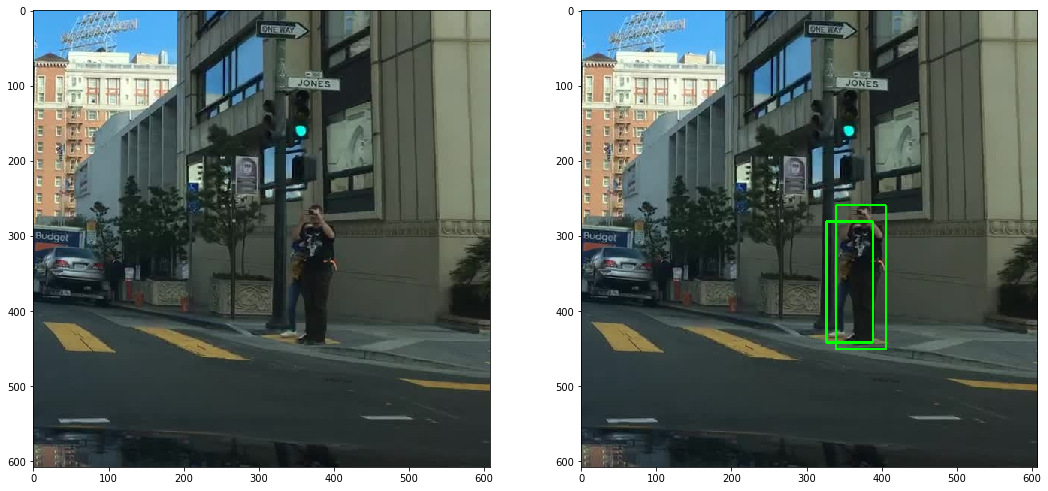

In [29]:
sub_img_name = sub_img_names[randint(0, len(sub_img_names)-1)]
print(sub_img_name)

test_sub_img = plt.imread("./608_sub_samples/patches/" + sub_img_name + ".jpg")
annotation = file_lines_to_list("./608_sub_samples/patch-labels/" + sub_img_name + ".txt")

dummy = test_sub_img.copy()

for obj in annotation:
    rec_img = cv2.rectangle(dummy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 2)

print(test_sub_img.shape)
plt.figure(figsize = (18, 10))
plt.subplot(121), plt.imshow(test_sub_img)
plt.subplot(122), plt.imshow(dummy)
plt.show()

# Generate Training Annotations

In [31]:
# GENERATE TRAINING ANNOTATIONS
txt_src = glob.glob("./608_sub_samples/patch-labels/*.txt")

text_file = open("./608_sub_samples/bdd100k_608_subsamples_anno.txt", "w+")

i=0
for txt_path in txt_src:
    contents = file_lines_to_list(txt_path)

    img_name = get_file_name(txt_path)

    text_file.write(f'/home/mju-hpc-02/Leanh/datasets/bdd100k-modification/608-subsamples/patches/{img_name}.jpg ')

    for box in contents:
        text_file.write('{},{},{},{},{} '.format(box[1], box[2], box[3], box[4], 0))
    text_file.write('\n')
    i+=1
    print(i, f"/ {len(txt_src)}")
    
#     if i == 20: break
    
text_file.close()

1 / 44643
2 / 44643
3 / 44643
4 / 44643
5 / 44643
6 / 44643
7 / 44643
8 / 44643
9 / 44643
10 / 44643
11 / 44643
12 / 44643
13 / 44643
14 / 44643
15 / 44643
16 / 44643
17 / 44643
18 / 44643
19 / 44643
20 / 44643
21 / 44643
22 / 44643
23 / 44643
24 / 44643
25 / 44643
26 / 44643
27 / 44643
28 / 44643
29 / 44643
30 / 44643
31 / 44643
32 / 44643
33 / 44643
34 / 44643
35 / 44643
36 / 44643
37 / 44643
38 / 44643
39 / 44643
40 / 44643
41 / 44643
42 / 44643
43 / 44643
44 / 44643
45 / 44643
46 / 44643
47 / 44643
48 / 44643
49 / 44643
50 / 44643
51 / 44643
52 / 44643
53 / 44643
54 / 44643
55 / 44643
56 / 44643
57 / 44643
58 / 44643
59 / 44643
60 / 44643
61 / 44643
62 / 44643
63 / 44643
64 / 44643
65 / 44643
66 / 44643
67 / 44643
68 / 44643
69 / 44643
70 / 44643
71 / 44643
72 / 44643
73 / 44643
74 / 44643
75 / 44643
76 / 44643
77 / 44643
78 / 44643
79 / 44643
80 / 44643
81 / 44643
82 / 44643
83 / 44643
84 / 44643
85 / 44643
86 / 44643
87 / 44643
88 / 44643
89 / 44643
90 / 44643
91 / 44643
92 / 446

717 / 44643
718 / 44643
719 / 44643
720 / 44643
721 / 44643
722 / 44643
723 / 44643
724 / 44643
725 / 44643
726 / 44643
727 / 44643
728 / 44643
729 / 44643
730 / 44643
731 / 44643
732 / 44643
733 / 44643
734 / 44643
735 / 44643
736 / 44643
737 / 44643
738 / 44643
739 / 44643
740 / 44643
741 / 44643
742 / 44643
743 / 44643
744 / 44643
745 / 44643
746 / 44643
747 / 44643
748 / 44643
749 / 44643
750 / 44643
751 / 44643
752 / 44643
753 / 44643
754 / 44643
755 / 44643
756 / 44643
757 / 44643
758 / 44643
759 / 44643
760 / 44643
761 / 44643
762 / 44643
763 / 44643
764 / 44643
765 / 44643
766 / 44643
767 / 44643
768 / 44643
769 / 44643
770 / 44643
771 / 44643
772 / 44643
773 / 44643
774 / 44643
775 / 44643
776 / 44643
777 / 44643
778 / 44643
779 / 44643
780 / 44643
781 / 44643
782 / 44643
783 / 44643
784 / 44643
785 / 44643
786 / 44643
787 / 44643
788 / 44643
789 / 44643
790 / 44643
791 / 44643
792 / 44643
793 / 44643
794 / 44643
795 / 44643
796 / 44643
797 / 44643
798 / 44643
799 / 44643
800 

1405 / 44643
1406 / 44643
1407 / 44643
1408 / 44643
1409 / 44643
1410 / 44643
1411 / 44643
1412 / 44643
1413 / 44643
1414 / 44643
1415 / 44643
1416 / 44643
1417 / 44643
1418 / 44643
1419 / 44643
1420 / 44643
1421 / 44643
1422 / 44643
1423 / 44643
1424 / 44643
1425 / 44643
1426 / 44643
1427 / 44643
1428 / 44643
1429 / 44643
1430 / 44643
1431 / 44643
1432 / 44643
1433 / 44643
1434 / 44643
1435 / 44643
1436 / 44643
1437 / 44643
1438 / 44643
1439 / 44643
1440 / 44643
1441 / 44643
1442 / 44643
1443 / 44643
1444 / 44643
1445 / 44643
1446 / 44643
1447 / 44643
1448 / 44643
1449 / 44643
1450 / 44643
1451 / 44643
1452 / 44643
1453 / 44643
1454 / 44643
1455 / 44643
1456 / 44643
1457 / 44643
1458 / 44643
1459 / 44643
1460 / 44643
1461 / 44643
1462 / 44643
1463 / 44643
1464 / 44643
1465 / 44643
1466 / 44643
1467 / 44643
1468 / 44643
1469 / 44643
1470 / 44643
1471 / 44643
1472 / 44643
1473 / 44643
1474 / 44643
1475 / 44643
1476 / 44643
1477 / 44643
1478 / 44643
1479 / 44643
1480 / 44643
1481 / 44643

2068 / 44643
2069 / 44643
2070 / 44643
2071 / 44643
2072 / 44643
2073 / 44643
2074 / 44643
2075 / 44643
2076 / 44643
2077 / 44643
2078 / 44643
2079 / 44643
2080 / 44643
2081 / 44643
2082 / 44643
2083 / 44643
2084 / 44643
2085 / 44643
2086 / 44643
2087 / 44643
2088 / 44643
2089 / 44643
2090 / 44643
2091 / 44643
2092 / 44643
2093 / 44643
2094 / 44643
2095 / 44643
2096 / 44643
2097 / 44643
2098 / 44643
2099 / 44643
2100 / 44643
2101 / 44643
2102 / 44643
2103 / 44643
2104 / 44643
2105 / 44643
2106 / 44643
2107 / 44643
2108 / 44643
2109 / 44643
2110 / 44643
2111 / 44643
2112 / 44643
2113 / 44643
2114 / 44643
2115 / 44643
2116 / 44643
2117 / 44643
2118 / 44643
2119 / 44643
2120 / 44643
2121 / 44643
2122 / 44643
2123 / 44643
2124 / 44643
2125 / 44643
2126 / 44643
2127 / 44643
2128 / 44643
2129 / 44643
2130 / 44643
2131 / 44643
2132 / 44643
2133 / 44643
2134 / 44643
2135 / 44643
2136 / 44643
2137 / 44643
2138 / 44643
2139 / 44643
2140 / 44643
2141 / 44643
2142 / 44643
2143 / 44643
2144 / 44643

2722 / 44643
2723 / 44643
2724 / 44643
2725 / 44643
2726 / 44643
2727 / 44643
2728 / 44643
2729 / 44643
2730 / 44643
2731 / 44643
2732 / 44643
2733 / 44643
2734 / 44643
2735 / 44643
2736 / 44643
2737 / 44643
2738 / 44643
2739 / 44643
2740 / 44643
2741 / 44643
2742 / 44643
2743 / 44643
2744 / 44643
2745 / 44643
2746 / 44643
2747 / 44643
2748 / 44643
2749 / 44643
2750 / 44643
2751 / 44643
2752 / 44643
2753 / 44643
2754 / 44643
2755 / 44643
2756 / 44643
2757 / 44643
2758 / 44643
2759 / 44643
2760 / 44643
2761 / 44643
2762 / 44643
2763 / 44643
2764 / 44643
2765 / 44643
2766 / 44643
2767 / 44643
2768 / 44643
2769 / 44643
2770 / 44643
2771 / 44643
2772 / 44643
2773 / 44643
2774 / 44643
2775 / 44643
2776 / 44643
2777 / 44643
2778 / 44643
2779 / 44643
2780 / 44643
2781 / 44643
2782 / 44643
2783 / 44643
2784 / 44643
2785 / 44643
2786 / 44643
2787 / 44643
2788 / 44643
2789 / 44643
2790 / 44643
2791 / 44643
2792 / 44643
2793 / 44643
2794 / 44643
2795 / 44643
2796 / 44643
2797 / 44643
2798 / 44643

3387 / 44643
3388 / 44643
3389 / 44643
3390 / 44643
3391 / 44643
3392 / 44643
3393 / 44643
3394 / 44643
3395 / 44643
3396 / 44643
3397 / 44643
3398 / 44643
3399 / 44643
3400 / 44643
3401 / 44643
3402 / 44643
3403 / 44643
3404 / 44643
3405 / 44643
3406 / 44643
3407 / 44643
3408 / 44643
3409 / 44643
3410 / 44643
3411 / 44643
3412 / 44643
3413 / 44643
3414 / 44643
3415 / 44643
3416 / 44643
3417 / 44643
3418 / 44643
3419 / 44643
3420 / 44643
3421 / 44643
3422 / 44643
3423 / 44643
3424 / 44643
3425 / 44643
3426 / 44643
3427 / 44643
3428 / 44643
3429 / 44643
3430 / 44643
3431 / 44643
3432 / 44643
3433 / 44643
3434 / 44643
3435 / 44643
3436 / 44643
3437 / 44643
3438 / 44643
3439 / 44643
3440 / 44643
3441 / 44643
3442 / 44643
3443 / 44643
3444 / 44643
3445 / 44643
3446 / 44643
3447 / 44643
3448 / 44643
3449 / 44643
3450 / 44643
3451 / 44643
3452 / 44643
3453 / 44643
3454 / 44643
3455 / 44643
3456 / 44643
3457 / 44643
3458 / 44643
3459 / 44643
3460 / 44643
3461 / 44643
3462 / 44643
3463 / 44643

4028 / 44643
4029 / 44643
4030 / 44643
4031 / 44643
4032 / 44643
4033 / 44643
4034 / 44643
4035 / 44643
4036 / 44643
4037 / 44643
4038 / 44643
4039 / 44643
4040 / 44643
4041 / 44643
4042 / 44643
4043 / 44643
4044 / 44643
4045 / 44643
4046 / 44643
4047 / 44643
4048 / 44643
4049 / 44643
4050 / 44643
4051 / 44643
4052 / 44643
4053 / 44643
4054 / 44643
4055 / 44643
4056 / 44643
4057 / 44643
4058 / 44643
4059 / 44643
4060 / 44643
4061 / 44643
4062 / 44643
4063 / 44643
4064 / 44643
4065 / 44643
4066 / 44643
4067 / 44643
4068 / 44643
4069 / 44643
4070 / 44643
4071 / 44643
4072 / 44643
4073 / 44643
4074 / 44643
4075 / 44643
4076 / 44643
4077 / 44643
4078 / 44643
4079 / 44643
4080 / 44643
4081 / 44643
4082 / 44643
4083 / 44643
4084 / 44643
4085 / 44643
4086 / 44643
4087 / 44643
4088 / 44643
4089 / 44643
4090 / 44643
4091 / 44643
4092 / 44643
4093 / 44643
4094 / 44643
4095 / 44643
4096 / 44643
4097 / 44643
4098 / 44643
4099 / 44643
4100 / 44643
4101 / 44643
4102 / 44643
4103 / 44643
4104 / 44643

4666 / 44643
4667 / 44643
4668 / 44643
4669 / 44643
4670 / 44643
4671 / 44643
4672 / 44643
4673 / 44643
4674 / 44643
4675 / 44643
4676 / 44643
4677 / 44643
4678 / 44643
4679 / 44643
4680 / 44643
4681 / 44643
4682 / 44643
4683 / 44643
4684 / 44643
4685 / 44643
4686 / 44643
4687 / 44643
4688 / 44643
4689 / 44643
4690 / 44643
4691 / 44643
4692 / 44643
4693 / 44643
4694 / 44643
4695 / 44643
4696 / 44643
4697 / 44643
4698 / 44643
4699 / 44643
4700 / 44643
4701 / 44643
4702 / 44643
4703 / 44643
4704 / 44643
4705 / 44643
4706 / 44643
4707 / 44643
4708 / 44643
4709 / 44643
4710 / 44643
4711 / 44643
4712 / 44643
4713 / 44643
4714 / 44643
4715 / 44643
4716 / 44643
4717 / 44643
4718 / 44643
4719 / 44643
4720 / 44643
4721 / 44643
4722 / 44643
4723 / 44643
4724 / 44643
4725 / 44643
4726 / 44643
4727 / 44643
4728 / 44643
4729 / 44643
4730 / 44643
4731 / 44643
4732 / 44643
4733 / 44643
4734 / 44643
4735 / 44643
4736 / 44643
4737 / 44643
4738 / 44643
4739 / 44643
4740 / 44643
4741 / 44643
4742 / 44643

5307 / 44643
5308 / 44643
5309 / 44643
5310 / 44643
5311 / 44643
5312 / 44643
5313 / 44643
5314 / 44643
5315 / 44643
5316 / 44643
5317 / 44643
5318 / 44643
5319 / 44643
5320 / 44643
5321 / 44643
5322 / 44643
5323 / 44643
5324 / 44643
5325 / 44643
5326 / 44643
5327 / 44643
5328 / 44643
5329 / 44643
5330 / 44643
5331 / 44643
5332 / 44643
5333 / 44643
5334 / 44643
5335 / 44643
5336 / 44643
5337 / 44643
5338 / 44643
5339 / 44643
5340 / 44643
5341 / 44643
5342 / 44643
5343 / 44643
5344 / 44643
5345 / 44643
5346 / 44643
5347 / 44643
5348 / 44643
5349 / 44643
5350 / 44643
5351 / 44643
5352 / 44643
5353 / 44643
5354 / 44643
5355 / 44643
5356 / 44643
5357 / 44643
5358 / 44643
5359 / 44643
5360 / 44643
5361 / 44643
5362 / 44643
5363 / 44643
5364 / 44643
5365 / 44643
5366 / 44643
5367 / 44643
5368 / 44643
5369 / 44643
5370 / 44643
5371 / 44643
5372 / 44643
5373 / 44643
5374 / 44643
5375 / 44643
5376 / 44643
5377 / 44643
5378 / 44643
5379 / 44643
5380 / 44643
5381 / 44643
5382 / 44643
5383 / 44643

5949 / 44643
5950 / 44643
5951 / 44643
5952 / 44643
5953 / 44643
5954 / 44643
5955 / 44643
5956 / 44643
5957 / 44643
5958 / 44643
5959 / 44643
5960 / 44643
5961 / 44643
5962 / 44643
5963 / 44643
5964 / 44643
5965 / 44643
5966 / 44643
5967 / 44643
5968 / 44643
5969 / 44643
5970 / 44643
5971 / 44643
5972 / 44643
5973 / 44643
5974 / 44643
5975 / 44643
5976 / 44643
5977 / 44643
5978 / 44643
5979 / 44643
5980 / 44643
5981 / 44643
5982 / 44643
5983 / 44643
5984 / 44643
5985 / 44643
5986 / 44643
5987 / 44643
5988 / 44643
5989 / 44643
5990 / 44643
5991 / 44643
5992 / 44643
5993 / 44643
5994 / 44643
5995 / 44643
5996 / 44643
5997 / 44643
5998 / 44643
5999 / 44643
6000 / 44643
6001 / 44643
6002 / 44643
6003 / 44643
6004 / 44643
6005 / 44643
6006 / 44643
6007 / 44643
6008 / 44643
6009 / 44643
6010 / 44643
6011 / 44643
6012 / 44643
6013 / 44643
6014 / 44643
6015 / 44643
6016 / 44643
6017 / 44643
6018 / 44643
6019 / 44643
6020 / 44643
6021 / 44643
6022 / 44643
6023 / 44643
6024 / 44643
6025 / 44643

6596 / 44643
6597 / 44643
6598 / 44643
6599 / 44643
6600 / 44643
6601 / 44643
6602 / 44643
6603 / 44643
6604 / 44643
6605 / 44643
6606 / 44643
6607 / 44643
6608 / 44643
6609 / 44643
6610 / 44643
6611 / 44643
6612 / 44643
6613 / 44643
6614 / 44643
6615 / 44643
6616 / 44643
6617 / 44643
6618 / 44643
6619 / 44643
6620 / 44643
6621 / 44643
6622 / 44643
6623 / 44643
6624 / 44643
6625 / 44643
6626 / 44643
6627 / 44643
6628 / 44643
6629 / 44643
6630 / 44643
6631 / 44643
6632 / 44643
6633 / 44643
6634 / 44643
6635 / 44643
6636 / 44643
6637 / 44643
6638 / 44643
6639 / 44643
6640 / 44643
6641 / 44643
6642 / 44643
6643 / 44643
6644 / 44643
6645 / 44643
6646 / 44643
6647 / 44643
6648 / 44643
6649 / 44643
6650 / 44643
6651 / 44643
6652 / 44643
6653 / 44643
6654 / 44643
6655 / 44643
6656 / 44643
6657 / 44643
6658 / 44643
6659 / 44643
6660 / 44643
6661 / 44643
6662 / 44643
6663 / 44643
6664 / 44643
6665 / 44643
6666 / 44643
6667 / 44643
6668 / 44643
6669 / 44643
6670 / 44643
6671 / 44643
6672 / 44643

7238 / 44643
7239 / 44643
7240 / 44643
7241 / 44643
7242 / 44643
7243 / 44643
7244 / 44643
7245 / 44643
7246 / 44643
7247 / 44643
7248 / 44643
7249 / 44643
7250 / 44643
7251 / 44643
7252 / 44643
7253 / 44643
7254 / 44643
7255 / 44643
7256 / 44643
7257 / 44643
7258 / 44643
7259 / 44643
7260 / 44643
7261 / 44643
7262 / 44643
7263 / 44643
7264 / 44643
7265 / 44643
7266 / 44643
7267 / 44643
7268 / 44643
7269 / 44643
7270 / 44643
7271 / 44643
7272 / 44643
7273 / 44643
7274 / 44643
7275 / 44643
7276 / 44643
7277 / 44643
7278 / 44643
7279 / 44643
7280 / 44643
7281 / 44643
7282 / 44643
7283 / 44643
7284 / 44643
7285 / 44643
7286 / 44643
7287 / 44643
7288 / 44643
7289 / 44643
7290 / 44643
7291 / 44643
7292 / 44643
7293 / 44643
7294 / 44643
7295 / 44643
7296 / 44643
7297 / 44643
7298 / 44643
7299 / 44643
7300 / 44643
7301 / 44643
7302 / 44643
7303 / 44643
7304 / 44643
7305 / 44643
7306 / 44643
7307 / 44643
7308 / 44643
7309 / 44643
7310 / 44643
7311 / 44643
7312 / 44643
7313 / 44643
7314 / 44643

7884 / 44643
7885 / 44643
7886 / 44643
7887 / 44643
7888 / 44643
7889 / 44643
7890 / 44643
7891 / 44643
7892 / 44643
7893 / 44643
7894 / 44643
7895 / 44643
7896 / 44643
7897 / 44643
7898 / 44643
7899 / 44643
7900 / 44643
7901 / 44643
7902 / 44643
7903 / 44643
7904 / 44643
7905 / 44643
7906 / 44643
7907 / 44643
7908 / 44643
7909 / 44643
7910 / 44643
7911 / 44643
7912 / 44643
7913 / 44643
7914 / 44643
7915 / 44643
7916 / 44643
7917 / 44643
7918 / 44643
7919 / 44643
7920 / 44643
7921 / 44643
7922 / 44643
7923 / 44643
7924 / 44643
7925 / 44643
7926 / 44643
7927 / 44643
7928 / 44643
7929 / 44643
7930 / 44643
7931 / 44643
7932 / 44643
7933 / 44643
7934 / 44643
7935 / 44643
7936 / 44643
7937 / 44643
7938 / 44643
7939 / 44643
7940 / 44643
7941 / 44643
7942 / 44643
7943 / 44643
7944 / 44643
7945 / 44643
7946 / 44643
7947 / 44643
7948 / 44643
7949 / 44643
7950 / 44643
7951 / 44643
7952 / 44643
7953 / 44643
7954 / 44643
7955 / 44643
7956 / 44643
7957 / 44643
7958 / 44643
7959 / 44643
7960 / 44643

8518 / 44643
8519 / 44643
8520 / 44643
8521 / 44643
8522 / 44643
8523 / 44643
8524 / 44643
8525 / 44643
8526 / 44643
8527 / 44643
8528 / 44643
8529 / 44643
8530 / 44643
8531 / 44643
8532 / 44643
8533 / 44643
8534 / 44643
8535 / 44643
8536 / 44643
8537 / 44643
8538 / 44643
8539 / 44643
8540 / 44643
8541 / 44643
8542 / 44643
8543 / 44643
8544 / 44643
8545 / 44643
8546 / 44643
8547 / 44643
8548 / 44643
8549 / 44643
8550 / 44643
8551 / 44643
8552 / 44643
8553 / 44643
8554 / 44643
8555 / 44643
8556 / 44643
8557 / 44643
8558 / 44643
8559 / 44643
8560 / 44643
8561 / 44643
8562 / 44643
8563 / 44643
8564 / 44643
8565 / 44643
8566 / 44643
8567 / 44643
8568 / 44643
8569 / 44643
8570 / 44643
8571 / 44643
8572 / 44643
8573 / 44643
8574 / 44643
8575 / 44643
8576 / 44643
8577 / 44643
8578 / 44643
8579 / 44643
8580 / 44643
8581 / 44643
8582 / 44643
8583 / 44643
8584 / 44643
8585 / 44643
8586 / 44643
8587 / 44643
8588 / 44643
8589 / 44643
8590 / 44643
8591 / 44643
8592 / 44643
8593 / 44643
8594 / 44643

9154 / 44643
9155 / 44643
9156 / 44643
9157 / 44643
9158 / 44643
9159 / 44643
9160 / 44643
9161 / 44643
9162 / 44643
9163 / 44643
9164 / 44643
9165 / 44643
9166 / 44643
9167 / 44643
9168 / 44643
9169 / 44643
9170 / 44643
9171 / 44643
9172 / 44643
9173 / 44643
9174 / 44643
9175 / 44643
9176 / 44643
9177 / 44643
9178 / 44643
9179 / 44643
9180 / 44643
9181 / 44643
9182 / 44643
9183 / 44643
9184 / 44643
9185 / 44643
9186 / 44643
9187 / 44643
9188 / 44643
9189 / 44643
9190 / 44643
9191 / 44643
9192 / 44643
9193 / 44643
9194 / 44643
9195 / 44643
9196 / 44643
9197 / 44643
9198 / 44643
9199 / 44643
9200 / 44643
9201 / 44643
9202 / 44643
9203 / 44643
9204 / 44643
9205 / 44643
9206 / 44643
9207 / 44643
9208 / 44643
9209 / 44643
9210 / 44643
9211 / 44643
9212 / 44643
9213 / 44643
9214 / 44643
9215 / 44643
9216 / 44643
9217 / 44643
9218 / 44643
9219 / 44643
9220 / 44643
9221 / 44643
9222 / 44643
9223 / 44643
9224 / 44643
9225 / 44643
9226 / 44643
9227 / 44643
9228 / 44643
9229 / 44643
9230 / 44643

9808 / 44643
9809 / 44643
9810 / 44643
9811 / 44643
9812 / 44643
9813 / 44643
9814 / 44643
9815 / 44643
9816 / 44643
9817 / 44643
9818 / 44643
9819 / 44643
9820 / 44643
9821 / 44643
9822 / 44643
9823 / 44643
9824 / 44643
9825 / 44643
9826 / 44643
9827 / 44643
9828 / 44643
9829 / 44643
9830 / 44643
9831 / 44643
9832 / 44643
9833 / 44643
9834 / 44643
9835 / 44643
9836 / 44643
9837 / 44643
9838 / 44643
9839 / 44643
9840 / 44643
9841 / 44643
9842 / 44643
9843 / 44643
9844 / 44643
9845 / 44643
9846 / 44643
9847 / 44643
9848 / 44643
9849 / 44643
9850 / 44643
9851 / 44643
9852 / 44643
9853 / 44643
9854 / 44643
9855 / 44643
9856 / 44643
9857 / 44643
9858 / 44643
9859 / 44643
9860 / 44643
9861 / 44643
9862 / 44643
9863 / 44643
9864 / 44643
9865 / 44643
9866 / 44643
9867 / 44643
9868 / 44643
9869 / 44643
9870 / 44643
9871 / 44643
9872 / 44643
9873 / 44643
9874 / 44643
9875 / 44643
9876 / 44643
9877 / 44643
9878 / 44643
9879 / 44643
9880 / 44643
9881 / 44643
9882 / 44643
9883 / 44643
9884 / 44643

10416 / 44643
10417 / 44643
10418 / 44643
10419 / 44643
10420 / 44643
10421 / 44643
10422 / 44643
10423 / 44643
10424 / 44643
10425 / 44643
10426 / 44643
10427 / 44643
10428 / 44643
10429 / 44643
10430 / 44643
10431 / 44643
10432 / 44643
10433 / 44643
10434 / 44643
10435 / 44643
10436 / 44643
10437 / 44643
10438 / 44643
10439 / 44643
10440 / 44643
10441 / 44643
10442 / 44643
10443 / 44643
10444 / 44643
10445 / 44643
10446 / 44643
10447 / 44643
10448 / 44643
10449 / 44643
10450 / 44643
10451 / 44643
10452 / 44643
10453 / 44643
10454 / 44643
10455 / 44643
10456 / 44643
10457 / 44643
10458 / 44643
10459 / 44643
10460 / 44643
10461 / 44643
10462 / 44643
10463 / 44643
10464 / 44643
10465 / 44643
10466 / 44643
10467 / 44643
10468 / 44643
10469 / 44643
10470 / 44643
10471 / 44643
10472 / 44643
10473 / 44643
10474 / 44643
10475 / 44643
10476 / 44643
10477 / 44643
10478 / 44643
10479 / 44643
10480 / 44643
10481 / 44643
10482 / 44643
10483 / 44643
10484 / 44643
10485 / 44643
10486 / 44643
10487 

11017 / 44643
11018 / 44643
11019 / 44643
11020 / 44643
11021 / 44643
11022 / 44643
11023 / 44643
11024 / 44643
11025 / 44643
11026 / 44643
11027 / 44643
11028 / 44643
11029 / 44643
11030 / 44643
11031 / 44643
11032 / 44643
11033 / 44643
11034 / 44643
11035 / 44643
11036 / 44643
11037 / 44643
11038 / 44643
11039 / 44643
11040 / 44643
11041 / 44643
11042 / 44643
11043 / 44643
11044 / 44643
11045 / 44643
11046 / 44643
11047 / 44643
11048 / 44643
11049 / 44643
11050 / 44643
11051 / 44643
11052 / 44643
11053 / 44643
11054 / 44643
11055 / 44643
11056 / 44643
11057 / 44643
11058 / 44643
11059 / 44643
11060 / 44643
11061 / 44643
11062 / 44643
11063 / 44643
11064 / 44643
11065 / 44643
11066 / 44643
11067 / 44643
11068 / 44643
11069 / 44643
11070 / 44643
11071 / 44643
11072 / 44643
11073 / 44643
11074 / 44643
11075 / 44643
11076 / 44643
11077 / 44643
11078 / 44643
11079 / 44643
11080 / 44643
11081 / 44643
11082 / 44643
11083 / 44643
11084 / 44643
11085 / 44643
11086 / 44643
11087 / 44643
11088 

11609 / 44643
11610 / 44643
11611 / 44643
11612 / 44643
11613 / 44643
11614 / 44643
11615 / 44643
11616 / 44643
11617 / 44643
11618 / 44643
11619 / 44643
11620 / 44643
11621 / 44643
11622 / 44643
11623 / 44643
11624 / 44643
11625 / 44643
11626 / 44643
11627 / 44643
11628 / 44643
11629 / 44643
11630 / 44643
11631 / 44643
11632 / 44643
11633 / 44643
11634 / 44643
11635 / 44643
11636 / 44643
11637 / 44643
11638 / 44643
11639 / 44643
11640 / 44643
11641 / 44643
11642 / 44643
11643 / 44643
11644 / 44643
11645 / 44643
11646 / 44643
11647 / 44643
11648 / 44643
11649 / 44643
11650 / 44643
11651 / 44643
11652 / 44643
11653 / 44643
11654 / 44643
11655 / 44643
11656 / 44643
11657 / 44643
11658 / 44643
11659 / 44643
11660 / 44643
11661 / 44643
11662 / 44643
11663 / 44643
11664 / 44643
11665 / 44643
11666 / 44643
11667 / 44643
11668 / 44643
11669 / 44643
11670 / 44643
11671 / 44643
11672 / 44643
11673 / 44643
11674 / 44643
11675 / 44643
11676 / 44643
11677 / 44643
11678 / 44643
11679 / 44643
11680 

12203 / 44643
12204 / 44643
12205 / 44643
12206 / 44643
12207 / 44643
12208 / 44643
12209 / 44643
12210 / 44643
12211 / 44643
12212 / 44643
12213 / 44643
12214 / 44643
12215 / 44643
12216 / 44643
12217 / 44643
12218 / 44643
12219 / 44643
12220 / 44643
12221 / 44643
12222 / 44643
12223 / 44643
12224 / 44643
12225 / 44643
12226 / 44643
12227 / 44643
12228 / 44643
12229 / 44643
12230 / 44643
12231 / 44643
12232 / 44643
12233 / 44643
12234 / 44643
12235 / 44643
12236 / 44643
12237 / 44643
12238 / 44643
12239 / 44643
12240 / 44643
12241 / 44643
12242 / 44643
12243 / 44643
12244 / 44643
12245 / 44643
12246 / 44643
12247 / 44643
12248 / 44643
12249 / 44643
12250 / 44643
12251 / 44643
12252 / 44643
12253 / 44643
12254 / 44643
12255 / 44643
12256 / 44643
12257 / 44643
12258 / 44643
12259 / 44643
12260 / 44643
12261 / 44643
12262 / 44643
12263 / 44643
12264 / 44643
12265 / 44643
12266 / 44643
12267 / 44643
12268 / 44643
12269 / 44643
12270 / 44643
12271 / 44643
12272 / 44643
12273 / 44643
12274 

12805 / 44643
12806 / 44643
12807 / 44643
12808 / 44643
12809 / 44643
12810 / 44643
12811 / 44643
12812 / 44643
12813 / 44643
12814 / 44643
12815 / 44643
12816 / 44643
12817 / 44643
12818 / 44643
12819 / 44643
12820 / 44643
12821 / 44643
12822 / 44643
12823 / 44643
12824 / 44643
12825 / 44643
12826 / 44643
12827 / 44643
12828 / 44643
12829 / 44643
12830 / 44643
12831 / 44643
12832 / 44643
12833 / 44643
12834 / 44643
12835 / 44643
12836 / 44643
12837 / 44643
12838 / 44643
12839 / 44643
12840 / 44643
12841 / 44643
12842 / 44643
12843 / 44643
12844 / 44643
12845 / 44643
12846 / 44643
12847 / 44643
12848 / 44643
12849 / 44643
12850 / 44643
12851 / 44643
12852 / 44643
12853 / 44643
12854 / 44643
12855 / 44643
12856 / 44643
12857 / 44643
12858 / 44643
12859 / 44643
12860 / 44643
12861 / 44643
12862 / 44643
12863 / 44643
12864 / 44643
12865 / 44643
12866 / 44643
12867 / 44643
12868 / 44643
12869 / 44643
12870 / 44643
12871 / 44643
12872 / 44643
12873 / 44643
12874 / 44643
12875 / 44643
12876 

13402 / 44643
13403 / 44643
13404 / 44643
13405 / 44643
13406 / 44643
13407 / 44643
13408 / 44643
13409 / 44643
13410 / 44643
13411 / 44643
13412 / 44643
13413 / 44643
13414 / 44643
13415 / 44643
13416 / 44643
13417 / 44643
13418 / 44643
13419 / 44643
13420 / 44643
13421 / 44643
13422 / 44643
13423 / 44643
13424 / 44643
13425 / 44643
13426 / 44643
13427 / 44643
13428 / 44643
13429 / 44643
13430 / 44643
13431 / 44643
13432 / 44643
13433 / 44643
13434 / 44643
13435 / 44643
13436 / 44643
13437 / 44643
13438 / 44643
13439 / 44643
13440 / 44643
13441 / 44643
13442 / 44643
13443 / 44643
13444 / 44643
13445 / 44643
13446 / 44643
13447 / 44643
13448 / 44643
13449 / 44643
13450 / 44643
13451 / 44643
13452 / 44643
13453 / 44643
13454 / 44643
13455 / 44643
13456 / 44643
13457 / 44643
13458 / 44643
13459 / 44643
13460 / 44643
13461 / 44643
13462 / 44643
13463 / 44643
13464 / 44643
13465 / 44643
13466 / 44643
13467 / 44643
13468 / 44643
13469 / 44643
13470 / 44643
13471 / 44643
13472 / 44643
13473 

13992 / 44643
13993 / 44643
13994 / 44643
13995 / 44643
13996 / 44643
13997 / 44643
13998 / 44643
13999 / 44643
14000 / 44643
14001 / 44643
14002 / 44643
14003 / 44643
14004 / 44643
14005 / 44643
14006 / 44643
14007 / 44643
14008 / 44643
14009 / 44643
14010 / 44643
14011 / 44643
14012 / 44643
14013 / 44643
14014 / 44643
14015 / 44643
14016 / 44643
14017 / 44643
14018 / 44643
14019 / 44643
14020 / 44643
14021 / 44643
14022 / 44643
14023 / 44643
14024 / 44643
14025 / 44643
14026 / 44643
14027 / 44643
14028 / 44643
14029 / 44643
14030 / 44643
14031 / 44643
14032 / 44643
14033 / 44643
14034 / 44643
14035 / 44643
14036 / 44643
14037 / 44643
14038 / 44643
14039 / 44643
14040 / 44643
14041 / 44643
14042 / 44643
14043 / 44643
14044 / 44643
14045 / 44643
14046 / 44643
14047 / 44643
14048 / 44643
14049 / 44643
14050 / 44643
14051 / 44643
14052 / 44643
14053 / 44643
14054 / 44643
14055 / 44643
14056 / 44643
14057 / 44643
14058 / 44643
14059 / 44643
14060 / 44643
14061 / 44643
14062 / 44643
14063 

14608 / 44643
14609 / 44643
14610 / 44643
14611 / 44643
14612 / 44643
14613 / 44643
14614 / 44643
14615 / 44643
14616 / 44643
14617 / 44643
14618 / 44643
14619 / 44643
14620 / 44643
14621 / 44643
14622 / 44643
14623 / 44643
14624 / 44643
14625 / 44643
14626 / 44643
14627 / 44643
14628 / 44643
14629 / 44643
14630 / 44643
14631 / 44643
14632 / 44643
14633 / 44643
14634 / 44643
14635 / 44643
14636 / 44643
14637 / 44643
14638 / 44643
14639 / 44643
14640 / 44643
14641 / 44643
14642 / 44643
14643 / 44643
14644 / 44643
14645 / 44643
14646 / 44643
14647 / 44643
14648 / 44643
14649 / 44643
14650 / 44643
14651 / 44643
14652 / 44643
14653 / 44643
14654 / 44643
14655 / 44643
14656 / 44643
14657 / 44643
14658 / 44643
14659 / 44643
14660 / 44643
14661 / 44643
14662 / 44643
14663 / 44643
14664 / 44643
14665 / 44643
14666 / 44643
14667 / 44643
14668 / 44643
14669 / 44643
14670 / 44643
14671 / 44643
14672 / 44643
14673 / 44643
14674 / 44643
14675 / 44643
14676 / 44643
14677 / 44643
14678 / 44643
14679 

15221 / 44643
15222 / 44643
15223 / 44643
15224 / 44643
15225 / 44643
15226 / 44643
15227 / 44643
15228 / 44643
15229 / 44643
15230 / 44643
15231 / 44643
15232 / 44643
15233 / 44643
15234 / 44643
15235 / 44643
15236 / 44643
15237 / 44643
15238 / 44643
15239 / 44643
15240 / 44643
15241 / 44643
15242 / 44643
15243 / 44643
15244 / 44643
15245 / 44643
15246 / 44643
15247 / 44643
15248 / 44643
15249 / 44643
15250 / 44643
15251 / 44643
15252 / 44643
15253 / 44643
15254 / 44643
15255 / 44643
15256 / 44643
15257 / 44643
15258 / 44643
15259 / 44643
15260 / 44643
15261 / 44643
15262 / 44643
15263 / 44643
15264 / 44643
15265 / 44643
15266 / 44643
15267 / 44643
15268 / 44643
15269 / 44643
15270 / 44643
15271 / 44643
15272 / 44643
15273 / 44643
15274 / 44643
15275 / 44643
15276 / 44643
15277 / 44643
15278 / 44643
15279 / 44643
15280 / 44643
15281 / 44643
15282 / 44643
15283 / 44643
15284 / 44643
15285 / 44643
15286 / 44643
15287 / 44643
15288 / 44643
15289 / 44643
15290 / 44643
15291 / 44643
15292 

15823 / 44643
15824 / 44643
15825 / 44643
15826 / 44643
15827 / 44643
15828 / 44643
15829 / 44643
15830 / 44643
15831 / 44643
15832 / 44643
15833 / 44643
15834 / 44643
15835 / 44643
15836 / 44643
15837 / 44643
15838 / 44643
15839 / 44643
15840 / 44643
15841 / 44643
15842 / 44643
15843 / 44643
15844 / 44643
15845 / 44643
15846 / 44643
15847 / 44643
15848 / 44643
15849 / 44643
15850 / 44643
15851 / 44643
15852 / 44643
15853 / 44643
15854 / 44643
15855 / 44643
15856 / 44643
15857 / 44643
15858 / 44643
15859 / 44643
15860 / 44643
15861 / 44643
15862 / 44643
15863 / 44643
15864 / 44643
15865 / 44643
15866 / 44643
15867 / 44643
15868 / 44643
15869 / 44643
15870 / 44643
15871 / 44643
15872 / 44643
15873 / 44643
15874 / 44643
15875 / 44643
15876 / 44643
15877 / 44643
15878 / 44643
15879 / 44643
15880 / 44643
15881 / 44643
15882 / 44643
15883 / 44643
15884 / 44643
15885 / 44643
15886 / 44643
15887 / 44643
15888 / 44643
15889 / 44643
15890 / 44643
15891 / 44643
15892 / 44643
15893 / 44643
15894 

16421 / 44643
16422 / 44643
16423 / 44643
16424 / 44643
16425 / 44643
16426 / 44643
16427 / 44643
16428 / 44643
16429 / 44643
16430 / 44643
16431 / 44643
16432 / 44643
16433 / 44643
16434 / 44643
16435 / 44643
16436 / 44643
16437 / 44643
16438 / 44643
16439 / 44643
16440 / 44643
16441 / 44643
16442 / 44643
16443 / 44643
16444 / 44643
16445 / 44643
16446 / 44643
16447 / 44643
16448 / 44643
16449 / 44643
16450 / 44643
16451 / 44643
16452 / 44643
16453 / 44643
16454 / 44643
16455 / 44643
16456 / 44643
16457 / 44643
16458 / 44643
16459 / 44643
16460 / 44643
16461 / 44643
16462 / 44643
16463 / 44643
16464 / 44643
16465 / 44643
16466 / 44643
16467 / 44643
16468 / 44643
16469 / 44643
16470 / 44643
16471 / 44643
16472 / 44643
16473 / 44643
16474 / 44643
16475 / 44643
16476 / 44643
16477 / 44643
16478 / 44643
16479 / 44643
16480 / 44643
16481 / 44643
16482 / 44643
16483 / 44643
16484 / 44643
16485 / 44643
16486 / 44643
16487 / 44643
16488 / 44643
16489 / 44643
16490 / 44643
16491 / 44643
16492 

17040 / 44643
17041 / 44643
17042 / 44643
17043 / 44643
17044 / 44643
17045 / 44643
17046 / 44643
17047 / 44643
17048 / 44643
17049 / 44643
17050 / 44643
17051 / 44643
17052 / 44643
17053 / 44643
17054 / 44643
17055 / 44643
17056 / 44643
17057 / 44643
17058 / 44643
17059 / 44643
17060 / 44643
17061 / 44643
17062 / 44643
17063 / 44643
17064 / 44643
17065 / 44643
17066 / 44643
17067 / 44643
17068 / 44643
17069 / 44643
17070 / 44643
17071 / 44643
17072 / 44643
17073 / 44643
17074 / 44643
17075 / 44643
17076 / 44643
17077 / 44643
17078 / 44643
17079 / 44643
17080 / 44643
17081 / 44643
17082 / 44643
17083 / 44643
17084 / 44643
17085 / 44643
17086 / 44643
17087 / 44643
17088 / 44643
17089 / 44643
17090 / 44643
17091 / 44643
17092 / 44643
17093 / 44643
17094 / 44643
17095 / 44643
17096 / 44643
17097 / 44643
17098 / 44643
17099 / 44643
17100 / 44643
17101 / 44643
17102 / 44643
17103 / 44643
17104 / 44643
17105 / 44643
17106 / 44643
17107 / 44643
17108 / 44643
17109 / 44643
17110 / 44643
17111 

17628 / 44643
17629 / 44643
17630 / 44643
17631 / 44643
17632 / 44643
17633 / 44643
17634 / 44643
17635 / 44643
17636 / 44643
17637 / 44643
17638 / 44643
17639 / 44643
17640 / 44643
17641 / 44643
17642 / 44643
17643 / 44643
17644 / 44643
17645 / 44643
17646 / 44643
17647 / 44643
17648 / 44643
17649 / 44643
17650 / 44643
17651 / 44643
17652 / 44643
17653 / 44643
17654 / 44643
17655 / 44643
17656 / 44643
17657 / 44643
17658 / 44643
17659 / 44643
17660 / 44643
17661 / 44643
17662 / 44643
17663 / 44643
17664 / 44643
17665 / 44643
17666 / 44643
17667 / 44643
17668 / 44643
17669 / 44643
17670 / 44643
17671 / 44643
17672 / 44643
17673 / 44643
17674 / 44643
17675 / 44643
17676 / 44643
17677 / 44643
17678 / 44643
17679 / 44643
17680 / 44643
17681 / 44643
17682 / 44643
17683 / 44643
17684 / 44643
17685 / 44643
17686 / 44643
17687 / 44643
17688 / 44643
17689 / 44643
17690 / 44643
17691 / 44643
17692 / 44643
17693 / 44643
17694 / 44643
17695 / 44643
17696 / 44643
17697 / 44643
17698 / 44643
17699 

18245 / 44643
18246 / 44643
18247 / 44643
18248 / 44643
18249 / 44643
18250 / 44643
18251 / 44643
18252 / 44643
18253 / 44643
18254 / 44643
18255 / 44643
18256 / 44643
18257 / 44643
18258 / 44643
18259 / 44643
18260 / 44643
18261 / 44643
18262 / 44643
18263 / 44643
18264 / 44643
18265 / 44643
18266 / 44643
18267 / 44643
18268 / 44643
18269 / 44643
18270 / 44643
18271 / 44643
18272 / 44643
18273 / 44643
18274 / 44643
18275 / 44643
18276 / 44643
18277 / 44643
18278 / 44643
18279 / 44643
18280 / 44643
18281 / 44643
18282 / 44643
18283 / 44643
18284 / 44643
18285 / 44643
18286 / 44643
18287 / 44643
18288 / 44643
18289 / 44643
18290 / 44643
18291 / 44643
18292 / 44643
18293 / 44643
18294 / 44643
18295 / 44643
18296 / 44643
18297 / 44643
18298 / 44643
18299 / 44643
18300 / 44643
18301 / 44643
18302 / 44643
18303 / 44643
18304 / 44643
18305 / 44643
18306 / 44643
18307 / 44643
18308 / 44643
18309 / 44643
18310 / 44643
18311 / 44643
18312 / 44643
18313 / 44643
18314 / 44643
18315 / 44643
18316 

18866 / 44643
18867 / 44643
18868 / 44643
18869 / 44643
18870 / 44643
18871 / 44643
18872 / 44643
18873 / 44643
18874 / 44643
18875 / 44643
18876 / 44643
18877 / 44643
18878 / 44643
18879 / 44643
18880 / 44643
18881 / 44643
18882 / 44643
18883 / 44643
18884 / 44643
18885 / 44643
18886 / 44643
18887 / 44643
18888 / 44643
18889 / 44643
18890 / 44643
18891 / 44643
18892 / 44643
18893 / 44643
18894 / 44643
18895 / 44643
18896 / 44643
18897 / 44643
18898 / 44643
18899 / 44643
18900 / 44643
18901 / 44643
18902 / 44643
18903 / 44643
18904 / 44643
18905 / 44643
18906 / 44643
18907 / 44643
18908 / 44643
18909 / 44643
18910 / 44643
18911 / 44643
18912 / 44643
18913 / 44643
18914 / 44643
18915 / 44643
18916 / 44643
18917 / 44643
18918 / 44643
18919 / 44643
18920 / 44643
18921 / 44643
18922 / 44643
18923 / 44643
18924 / 44643
18925 / 44643
18926 / 44643
18927 / 44643
18928 / 44643
18929 / 44643
18930 / 44643
18931 / 44643
18932 / 44643
18933 / 44643
18934 / 44643
18935 / 44643
18936 / 44643
18937 

19458 / 44643
19459 / 44643
19460 / 44643
19461 / 44643
19462 / 44643
19463 / 44643
19464 / 44643
19465 / 44643
19466 / 44643
19467 / 44643
19468 / 44643
19469 / 44643
19470 / 44643
19471 / 44643
19472 / 44643
19473 / 44643
19474 / 44643
19475 / 44643
19476 / 44643
19477 / 44643
19478 / 44643
19479 / 44643
19480 / 44643
19481 / 44643
19482 / 44643
19483 / 44643
19484 / 44643
19485 / 44643
19486 / 44643
19487 / 44643
19488 / 44643
19489 / 44643
19490 / 44643
19491 / 44643
19492 / 44643
19493 / 44643
19494 / 44643
19495 / 44643
19496 / 44643
19497 / 44643
19498 / 44643
19499 / 44643
19500 / 44643
19501 / 44643
19502 / 44643
19503 / 44643
19504 / 44643
19505 / 44643
19506 / 44643
19507 / 44643
19508 / 44643
19509 / 44643
19510 / 44643
19511 / 44643
19512 / 44643
19513 / 44643
19514 / 44643
19515 / 44643
19516 / 44643
19517 / 44643
19518 / 44643
19519 / 44643
19520 / 44643
19521 / 44643
19522 / 44643
19523 / 44643
19524 / 44643
19525 / 44643
19526 / 44643
19527 / 44643
19528 / 44643
19529 

20045 / 44643
20046 / 44643
20047 / 44643
20048 / 44643
20049 / 44643
20050 / 44643
20051 / 44643
20052 / 44643
20053 / 44643
20054 / 44643
20055 / 44643
20056 / 44643
20057 / 44643
20058 / 44643
20059 / 44643
20060 / 44643
20061 / 44643
20062 / 44643
20063 / 44643
20064 / 44643
20065 / 44643
20066 / 44643
20067 / 44643
20068 / 44643
20069 / 44643
20070 / 44643
20071 / 44643
20072 / 44643
20073 / 44643
20074 / 44643
20075 / 44643
20076 / 44643
20077 / 44643
20078 / 44643
20079 / 44643
20080 / 44643
20081 / 44643
20082 / 44643
20083 / 44643
20084 / 44643
20085 / 44643
20086 / 44643
20087 / 44643
20088 / 44643
20089 / 44643
20090 / 44643
20091 / 44643
20092 / 44643
20093 / 44643
20094 / 44643
20095 / 44643
20096 / 44643
20097 / 44643
20098 / 44643
20099 / 44643
20100 / 44643
20101 / 44643
20102 / 44643
20103 / 44643
20104 / 44643
20105 / 44643
20106 / 44643
20107 / 44643
20108 / 44643
20109 / 44643
20110 / 44643
20111 / 44643
20112 / 44643
20113 / 44643
20114 / 44643
20115 / 44643
20116 

20666 / 44643
20667 / 44643
20668 / 44643
20669 / 44643
20670 / 44643
20671 / 44643
20672 / 44643
20673 / 44643
20674 / 44643
20675 / 44643
20676 / 44643
20677 / 44643
20678 / 44643
20679 / 44643
20680 / 44643
20681 / 44643
20682 / 44643
20683 / 44643
20684 / 44643
20685 / 44643
20686 / 44643
20687 / 44643
20688 / 44643
20689 / 44643
20690 / 44643
20691 / 44643
20692 / 44643
20693 / 44643
20694 / 44643
20695 / 44643
20696 / 44643
20697 / 44643
20698 / 44643
20699 / 44643
20700 / 44643
20701 / 44643
20702 / 44643
20703 / 44643
20704 / 44643
20705 / 44643
20706 / 44643
20707 / 44643
20708 / 44643
20709 / 44643
20710 / 44643
20711 / 44643
20712 / 44643
20713 / 44643
20714 / 44643
20715 / 44643
20716 / 44643
20717 / 44643
20718 / 44643
20719 / 44643
20720 / 44643
20721 / 44643
20722 / 44643
20723 / 44643
20724 / 44643
20725 / 44643
20726 / 44643
20727 / 44643
20728 / 44643
20729 / 44643
20730 / 44643
20731 / 44643
20732 / 44643
20733 / 44643
20734 / 44643
20735 / 44643
20736 / 44643
20737 

21253 / 44643
21254 / 44643
21255 / 44643
21256 / 44643
21257 / 44643
21258 / 44643
21259 / 44643
21260 / 44643
21261 / 44643
21262 / 44643
21263 / 44643
21264 / 44643
21265 / 44643
21266 / 44643
21267 / 44643
21268 / 44643
21269 / 44643
21270 / 44643
21271 / 44643
21272 / 44643
21273 / 44643
21274 / 44643
21275 / 44643
21276 / 44643
21277 / 44643
21278 / 44643
21279 / 44643
21280 / 44643
21281 / 44643
21282 / 44643
21283 / 44643
21284 / 44643
21285 / 44643
21286 / 44643
21287 / 44643
21288 / 44643
21289 / 44643
21290 / 44643
21291 / 44643
21292 / 44643
21293 / 44643
21294 / 44643
21295 / 44643
21296 / 44643
21297 / 44643
21298 / 44643
21299 / 44643
21300 / 44643
21301 / 44643
21302 / 44643
21303 / 44643
21304 / 44643
21305 / 44643
21306 / 44643
21307 / 44643
21308 / 44643
21309 / 44643
21310 / 44643
21311 / 44643
21312 / 44643
21313 / 44643
21314 / 44643
21315 / 44643
21316 / 44643
21317 / 44643
21318 / 44643
21319 / 44643
21320 / 44643
21321 / 44643
21322 / 44643
21323 / 44643
21324 

21874 / 44643
21875 / 44643
21876 / 44643
21877 / 44643
21878 / 44643
21879 / 44643
21880 / 44643
21881 / 44643
21882 / 44643
21883 / 44643
21884 / 44643
21885 / 44643
21886 / 44643
21887 / 44643
21888 / 44643
21889 / 44643
21890 / 44643
21891 / 44643
21892 / 44643
21893 / 44643
21894 / 44643
21895 / 44643
21896 / 44643
21897 / 44643
21898 / 44643
21899 / 44643
21900 / 44643
21901 / 44643
21902 / 44643
21903 / 44643
21904 / 44643
21905 / 44643
21906 / 44643
21907 / 44643
21908 / 44643
21909 / 44643
21910 / 44643
21911 / 44643
21912 / 44643
21913 / 44643
21914 / 44643
21915 / 44643
21916 / 44643
21917 / 44643
21918 / 44643
21919 / 44643
21920 / 44643
21921 / 44643
21922 / 44643
21923 / 44643
21924 / 44643
21925 / 44643
21926 / 44643
21927 / 44643
21928 / 44643
21929 / 44643
21930 / 44643
21931 / 44643
21932 / 44643
21933 / 44643
21934 / 44643
21935 / 44643
21936 / 44643
21937 / 44643
21938 / 44643
21939 / 44643
21940 / 44643
21941 / 44643
21942 / 44643
21943 / 44643
21944 / 44643
21945 

22468 / 44643
22469 / 44643
22470 / 44643
22471 / 44643
22472 / 44643
22473 / 44643
22474 / 44643
22475 / 44643
22476 / 44643
22477 / 44643
22478 / 44643
22479 / 44643
22480 / 44643
22481 / 44643
22482 / 44643
22483 / 44643
22484 / 44643
22485 / 44643
22486 / 44643
22487 / 44643
22488 / 44643
22489 / 44643
22490 / 44643
22491 / 44643
22492 / 44643
22493 / 44643
22494 / 44643
22495 / 44643
22496 / 44643
22497 / 44643
22498 / 44643
22499 / 44643
22500 / 44643
22501 / 44643
22502 / 44643
22503 / 44643
22504 / 44643
22505 / 44643
22506 / 44643
22507 / 44643
22508 / 44643
22509 / 44643
22510 / 44643
22511 / 44643
22512 / 44643
22513 / 44643
22514 / 44643
22515 / 44643
22516 / 44643
22517 / 44643
22518 / 44643
22519 / 44643
22520 / 44643
22521 / 44643
22522 / 44643
22523 / 44643
22524 / 44643
22525 / 44643
22526 / 44643
22527 / 44643
22528 / 44643
22529 / 44643
22530 / 44643
22531 / 44643
22532 / 44643
22533 / 44643
22534 / 44643
22535 / 44643
22536 / 44643
22537 / 44643
22538 / 44643
22539 

23070 / 44643
23071 / 44643
23072 / 44643
23073 / 44643
23074 / 44643
23075 / 44643
23076 / 44643
23077 / 44643
23078 / 44643
23079 / 44643
23080 / 44643
23081 / 44643
23082 / 44643
23083 / 44643
23084 / 44643
23085 / 44643
23086 / 44643
23087 / 44643
23088 / 44643
23089 / 44643
23090 / 44643
23091 / 44643
23092 / 44643
23093 / 44643
23094 / 44643
23095 / 44643
23096 / 44643
23097 / 44643
23098 / 44643
23099 / 44643
23100 / 44643
23101 / 44643
23102 / 44643
23103 / 44643
23104 / 44643
23105 / 44643
23106 / 44643
23107 / 44643
23108 / 44643
23109 / 44643
23110 / 44643
23111 / 44643
23112 / 44643
23113 / 44643
23114 / 44643
23115 / 44643
23116 / 44643
23117 / 44643
23118 / 44643
23119 / 44643
23120 / 44643
23121 / 44643
23122 / 44643
23123 / 44643
23124 / 44643
23125 / 44643
23126 / 44643
23127 / 44643
23128 / 44643
23129 / 44643
23130 / 44643
23131 / 44643
23132 / 44643
23133 / 44643
23134 / 44643
23135 / 44643
23136 / 44643
23137 / 44643
23138 / 44643
23139 / 44643
23140 / 44643
23141 

23664 / 44643
23665 / 44643
23666 / 44643
23667 / 44643
23668 / 44643
23669 / 44643
23670 / 44643
23671 / 44643
23672 / 44643
23673 / 44643
23674 / 44643
23675 / 44643
23676 / 44643
23677 / 44643
23678 / 44643
23679 / 44643
23680 / 44643
23681 / 44643
23682 / 44643
23683 / 44643
23684 / 44643
23685 / 44643
23686 / 44643
23687 / 44643
23688 / 44643
23689 / 44643
23690 / 44643
23691 / 44643
23692 / 44643
23693 / 44643
23694 / 44643
23695 / 44643
23696 / 44643
23697 / 44643
23698 / 44643
23699 / 44643
23700 / 44643
23701 / 44643
23702 / 44643
23703 / 44643
23704 / 44643
23705 / 44643
23706 / 44643
23707 / 44643
23708 / 44643
23709 / 44643
23710 / 44643
23711 / 44643
23712 / 44643
23713 / 44643
23714 / 44643
23715 / 44643
23716 / 44643
23717 / 44643
23718 / 44643
23719 / 44643
23720 / 44643
23721 / 44643
23722 / 44643
23723 / 44643
23724 / 44643
23725 / 44643
23726 / 44643
23727 / 44643
23728 / 44643
23729 / 44643
23730 / 44643
23731 / 44643
23732 / 44643
23733 / 44643
23734 / 44643
23735 

24270 / 44643
24271 / 44643
24272 / 44643
24273 / 44643
24274 / 44643
24275 / 44643
24276 / 44643
24277 / 44643
24278 / 44643
24279 / 44643
24280 / 44643
24281 / 44643
24282 / 44643
24283 / 44643
24284 / 44643
24285 / 44643
24286 / 44643
24287 / 44643
24288 / 44643
24289 / 44643
24290 / 44643
24291 / 44643
24292 / 44643
24293 / 44643
24294 / 44643
24295 / 44643
24296 / 44643
24297 / 44643
24298 / 44643
24299 / 44643
24300 / 44643
24301 / 44643
24302 / 44643
24303 / 44643
24304 / 44643
24305 / 44643
24306 / 44643
24307 / 44643
24308 / 44643
24309 / 44643
24310 / 44643
24311 / 44643
24312 / 44643
24313 / 44643
24314 / 44643
24315 / 44643
24316 / 44643
24317 / 44643
24318 / 44643
24319 / 44643
24320 / 44643
24321 / 44643
24322 / 44643
24323 / 44643
24324 / 44643
24325 / 44643
24326 / 44643
24327 / 44643
24328 / 44643
24329 / 44643
24330 / 44643
24331 / 44643
24332 / 44643
24333 / 44643
24334 / 44643
24335 / 44643
24336 / 44643
24337 / 44643
24338 / 44643
24339 / 44643
24340 / 44643
24341 

24885 / 44643
24886 / 44643
24887 / 44643
24888 / 44643
24889 / 44643
24890 / 44643
24891 / 44643
24892 / 44643
24893 / 44643
24894 / 44643
24895 / 44643
24896 / 44643
24897 / 44643
24898 / 44643
24899 / 44643
24900 / 44643
24901 / 44643
24902 / 44643
24903 / 44643
24904 / 44643
24905 / 44643
24906 / 44643
24907 / 44643
24908 / 44643
24909 / 44643
24910 / 44643
24911 / 44643
24912 / 44643
24913 / 44643
24914 / 44643
24915 / 44643
24916 / 44643
24917 / 44643
24918 / 44643
24919 / 44643
24920 / 44643
24921 / 44643
24922 / 44643
24923 / 44643
24924 / 44643
24925 / 44643
24926 / 44643
24927 / 44643
24928 / 44643
24929 / 44643
24930 / 44643
24931 / 44643
24932 / 44643
24933 / 44643
24934 / 44643
24935 / 44643
24936 / 44643
24937 / 44643
24938 / 44643
24939 / 44643
24940 / 44643
24941 / 44643
24942 / 44643
24943 / 44643
24944 / 44643
24945 / 44643
24946 / 44643
24947 / 44643
24948 / 44643
24949 / 44643
24950 / 44643
24951 / 44643
24952 / 44643
24953 / 44643
24954 / 44643
24955 / 44643
24956 

25491 / 44643
25492 / 44643
25493 / 44643
25494 / 44643
25495 / 44643
25496 / 44643
25497 / 44643
25498 / 44643
25499 / 44643
25500 / 44643
25501 / 44643
25502 / 44643
25503 / 44643
25504 / 44643
25505 / 44643
25506 / 44643
25507 / 44643
25508 / 44643
25509 / 44643
25510 / 44643
25511 / 44643
25512 / 44643
25513 / 44643
25514 / 44643
25515 / 44643
25516 / 44643
25517 / 44643
25518 / 44643
25519 / 44643
25520 / 44643
25521 / 44643
25522 / 44643
25523 / 44643
25524 / 44643
25525 / 44643
25526 / 44643
25527 / 44643
25528 / 44643
25529 / 44643
25530 / 44643
25531 / 44643
25532 / 44643
25533 / 44643
25534 / 44643
25535 / 44643
25536 / 44643
25537 / 44643
25538 / 44643
25539 / 44643
25540 / 44643
25541 / 44643
25542 / 44643
25543 / 44643
25544 / 44643
25545 / 44643
25546 / 44643
25547 / 44643
25548 / 44643
25549 / 44643
25550 / 44643
25551 / 44643
25552 / 44643
25553 / 44643
25554 / 44643
25555 / 44643
25556 / 44643
25557 / 44643
25558 / 44643
25559 / 44643
25560 / 44643
25561 / 44643
25562 

26082 / 44643
26083 / 44643
26084 / 44643
26085 / 44643
26086 / 44643
26087 / 44643
26088 / 44643
26089 / 44643
26090 / 44643
26091 / 44643
26092 / 44643
26093 / 44643
26094 / 44643
26095 / 44643
26096 / 44643
26097 / 44643
26098 / 44643
26099 / 44643
26100 / 44643
26101 / 44643
26102 / 44643
26103 / 44643
26104 / 44643
26105 / 44643
26106 / 44643
26107 / 44643
26108 / 44643
26109 / 44643
26110 / 44643
26111 / 44643
26112 / 44643
26113 / 44643
26114 / 44643
26115 / 44643
26116 / 44643
26117 / 44643
26118 / 44643
26119 / 44643
26120 / 44643
26121 / 44643
26122 / 44643
26123 / 44643
26124 / 44643
26125 / 44643
26126 / 44643
26127 / 44643
26128 / 44643
26129 / 44643
26130 / 44643
26131 / 44643
26132 / 44643
26133 / 44643
26134 / 44643
26135 / 44643
26136 / 44643
26137 / 44643
26138 / 44643
26139 / 44643
26140 / 44643
26141 / 44643
26142 / 44643
26143 / 44643
26144 / 44643
26145 / 44643
26146 / 44643
26147 / 44643
26148 / 44643
26149 / 44643
26150 / 44643
26151 / 44643
26152 / 44643
26153 

26671 / 44643
26672 / 44643
26673 / 44643
26674 / 44643
26675 / 44643
26676 / 44643
26677 / 44643
26678 / 44643
26679 / 44643
26680 / 44643
26681 / 44643
26682 / 44643
26683 / 44643
26684 / 44643
26685 / 44643
26686 / 44643
26687 / 44643
26688 / 44643
26689 / 44643
26690 / 44643
26691 / 44643
26692 / 44643
26693 / 44643
26694 / 44643
26695 / 44643
26696 / 44643
26697 / 44643
26698 / 44643
26699 / 44643
26700 / 44643
26701 / 44643
26702 / 44643
26703 / 44643
26704 / 44643
26705 / 44643
26706 / 44643
26707 / 44643
26708 / 44643
26709 / 44643
26710 / 44643
26711 / 44643
26712 / 44643
26713 / 44643
26714 / 44643
26715 / 44643
26716 / 44643
26717 / 44643
26718 / 44643
26719 / 44643
26720 / 44643
26721 / 44643
26722 / 44643
26723 / 44643
26724 / 44643
26725 / 44643
26726 / 44643
26727 / 44643
26728 / 44643
26729 / 44643
26730 / 44643
26731 / 44643
26732 / 44643
26733 / 44643
26734 / 44643
26735 / 44643
26736 / 44643
26737 / 44643
26738 / 44643
26739 / 44643
26740 / 44643
26741 / 44643
26742 

27269 / 44643
27270 / 44643
27271 / 44643
27272 / 44643
27273 / 44643
27274 / 44643
27275 / 44643
27276 / 44643
27277 / 44643
27278 / 44643
27279 / 44643
27280 / 44643
27281 / 44643
27282 / 44643
27283 / 44643
27284 / 44643
27285 / 44643
27286 / 44643
27287 / 44643
27288 / 44643
27289 / 44643
27290 / 44643
27291 / 44643
27292 / 44643
27293 / 44643
27294 / 44643
27295 / 44643
27296 / 44643
27297 / 44643
27298 / 44643
27299 / 44643
27300 / 44643
27301 / 44643
27302 / 44643
27303 / 44643
27304 / 44643
27305 / 44643
27306 / 44643
27307 / 44643
27308 / 44643
27309 / 44643
27310 / 44643
27311 / 44643
27312 / 44643
27313 / 44643
27314 / 44643
27315 / 44643
27316 / 44643
27317 / 44643
27318 / 44643
27319 / 44643
27320 / 44643
27321 / 44643
27322 / 44643
27323 / 44643
27324 / 44643
27325 / 44643
27326 / 44643
27327 / 44643
27328 / 44643
27329 / 44643
27330 / 44643
27331 / 44643
27332 / 44643
27333 / 44643
27334 / 44643
27335 / 44643
27336 / 44643
27337 / 44643
27338 / 44643
27339 / 44643
27340 

27880 / 44643
27881 / 44643
27882 / 44643
27883 / 44643
27884 / 44643
27885 / 44643
27886 / 44643
27887 / 44643
27888 / 44643
27889 / 44643
27890 / 44643
27891 / 44643
27892 / 44643
27893 / 44643
27894 / 44643
27895 / 44643
27896 / 44643
27897 / 44643
27898 / 44643
27899 / 44643
27900 / 44643
27901 / 44643
27902 / 44643
27903 / 44643
27904 / 44643
27905 / 44643
27906 / 44643
27907 / 44643
27908 / 44643
27909 / 44643
27910 / 44643
27911 / 44643
27912 / 44643
27913 / 44643
27914 / 44643
27915 / 44643
27916 / 44643
27917 / 44643
27918 / 44643
27919 / 44643
27920 / 44643
27921 / 44643
27922 / 44643
27923 / 44643
27924 / 44643
27925 / 44643
27926 / 44643
27927 / 44643
27928 / 44643
27929 / 44643
27930 / 44643
27931 / 44643
27932 / 44643
27933 / 44643
27934 / 44643
27935 / 44643
27936 / 44643
27937 / 44643
27938 / 44643
27939 / 44643
27940 / 44643
27941 / 44643
27942 / 44643
27943 / 44643
27944 / 44643
27945 / 44643
27946 / 44643
27947 / 44643
27948 / 44643
27949 / 44643
27950 / 44643
27951 

28474 / 44643
28475 / 44643
28476 / 44643
28477 / 44643
28478 / 44643
28479 / 44643
28480 / 44643
28481 / 44643
28482 / 44643
28483 / 44643
28484 / 44643
28485 / 44643
28486 / 44643
28487 / 44643
28488 / 44643
28489 / 44643
28490 / 44643
28491 / 44643
28492 / 44643
28493 / 44643
28494 / 44643
28495 / 44643
28496 / 44643
28497 / 44643
28498 / 44643
28499 / 44643
28500 / 44643
28501 / 44643
28502 / 44643
28503 / 44643
28504 / 44643
28505 / 44643
28506 / 44643
28507 / 44643
28508 / 44643
28509 / 44643
28510 / 44643
28511 / 44643
28512 / 44643
28513 / 44643
28514 / 44643
28515 / 44643
28516 / 44643
28517 / 44643
28518 / 44643
28519 / 44643
28520 / 44643
28521 / 44643
28522 / 44643
28523 / 44643
28524 / 44643
28525 / 44643
28526 / 44643
28527 / 44643
28528 / 44643
28529 / 44643
28530 / 44643
28531 / 44643
28532 / 44643
28533 / 44643
28534 / 44643
28535 / 44643
28536 / 44643
28537 / 44643
28538 / 44643
28539 / 44643
28540 / 44643
28541 / 44643
28542 / 44643
28543 / 44643
28544 / 44643
28545 

29064 / 44643
29065 / 44643
29066 / 44643
29067 / 44643
29068 / 44643
29069 / 44643
29070 / 44643
29071 / 44643
29072 / 44643
29073 / 44643
29074 / 44643
29075 / 44643
29076 / 44643
29077 / 44643
29078 / 44643
29079 / 44643
29080 / 44643
29081 / 44643
29082 / 44643
29083 / 44643
29084 / 44643
29085 / 44643
29086 / 44643
29087 / 44643
29088 / 44643
29089 / 44643
29090 / 44643
29091 / 44643
29092 / 44643
29093 / 44643
29094 / 44643
29095 / 44643
29096 / 44643
29097 / 44643
29098 / 44643
29099 / 44643
29100 / 44643
29101 / 44643
29102 / 44643
29103 / 44643
29104 / 44643
29105 / 44643
29106 / 44643
29107 / 44643
29108 / 44643
29109 / 44643
29110 / 44643
29111 / 44643
29112 / 44643
29113 / 44643
29114 / 44643
29115 / 44643
29116 / 44643
29117 / 44643
29118 / 44643
29119 / 44643
29120 / 44643
29121 / 44643
29122 / 44643
29123 / 44643
29124 / 44643
29125 / 44643
29126 / 44643
29127 / 44643
29128 / 44643
29129 / 44643
29130 / 44643
29131 / 44643
29132 / 44643
29133 / 44643
29134 / 44643
29135 

29653 / 44643
29654 / 44643
29655 / 44643
29656 / 44643
29657 / 44643
29658 / 44643
29659 / 44643
29660 / 44643
29661 / 44643
29662 / 44643
29663 / 44643
29664 / 44643
29665 / 44643
29666 / 44643
29667 / 44643
29668 / 44643
29669 / 44643
29670 / 44643
29671 / 44643
29672 / 44643
29673 / 44643
29674 / 44643
29675 / 44643
29676 / 44643
29677 / 44643
29678 / 44643
29679 / 44643
29680 / 44643
29681 / 44643
29682 / 44643
29683 / 44643
29684 / 44643
29685 / 44643
29686 / 44643
29687 / 44643
29688 / 44643
29689 / 44643
29690 / 44643
29691 / 44643
29692 / 44643
29693 / 44643
29694 / 44643
29695 / 44643
29696 / 44643
29697 / 44643
29698 / 44643
29699 / 44643
29700 / 44643
29701 / 44643
29702 / 44643
29703 / 44643
29704 / 44643
29705 / 44643
29706 / 44643
29707 / 44643
29708 / 44643
29709 / 44643
29710 / 44643
29711 / 44643
29712 / 44643
29713 / 44643
29714 / 44643
29715 / 44643
29716 / 44643
29717 / 44643
29718 / 44643
29719 / 44643
29720 / 44643
29721 / 44643
29722 / 44643
29723 / 44643
29724 

30264 / 44643
30265 / 44643
30266 / 44643
30267 / 44643
30268 / 44643
30269 / 44643
30270 / 44643
30271 / 44643
30272 / 44643
30273 / 44643
30274 / 44643
30275 / 44643
30276 / 44643
30277 / 44643
30278 / 44643
30279 / 44643
30280 / 44643
30281 / 44643
30282 / 44643
30283 / 44643
30284 / 44643
30285 / 44643
30286 / 44643
30287 / 44643
30288 / 44643
30289 / 44643
30290 / 44643
30291 / 44643
30292 / 44643
30293 / 44643
30294 / 44643
30295 / 44643
30296 / 44643
30297 / 44643
30298 / 44643
30299 / 44643
30300 / 44643
30301 / 44643
30302 / 44643
30303 / 44643
30304 / 44643
30305 / 44643
30306 / 44643
30307 / 44643
30308 / 44643
30309 / 44643
30310 / 44643
30311 / 44643
30312 / 44643
30313 / 44643
30314 / 44643
30315 / 44643
30316 / 44643
30317 / 44643
30318 / 44643
30319 / 44643
30320 / 44643
30321 / 44643
30322 / 44643
30323 / 44643
30324 / 44643
30325 / 44643
30326 / 44643
30327 / 44643
30328 / 44643
30329 / 44643
30330 / 44643
30331 / 44643
30332 / 44643
30333 / 44643
30334 / 44643
30335 

30853 / 44643
30854 / 44643
30855 / 44643
30856 / 44643
30857 / 44643
30858 / 44643
30859 / 44643
30860 / 44643
30861 / 44643
30862 / 44643
30863 / 44643
30864 / 44643
30865 / 44643
30866 / 44643
30867 / 44643
30868 / 44643
30869 / 44643
30870 / 44643
30871 / 44643
30872 / 44643
30873 / 44643
30874 / 44643
30875 / 44643
30876 / 44643
30877 / 44643
30878 / 44643
30879 / 44643
30880 / 44643
30881 / 44643
30882 / 44643
30883 / 44643
30884 / 44643
30885 / 44643
30886 / 44643
30887 / 44643
30888 / 44643
30889 / 44643
30890 / 44643
30891 / 44643
30892 / 44643
30893 / 44643
30894 / 44643
30895 / 44643
30896 / 44643
30897 / 44643
30898 / 44643
30899 / 44643
30900 / 44643
30901 / 44643
30902 / 44643
30903 / 44643
30904 / 44643
30905 / 44643
30906 / 44643
30907 / 44643
30908 / 44643
30909 / 44643
30910 / 44643
30911 / 44643
30912 / 44643
30913 / 44643
30914 / 44643
30915 / 44643
30916 / 44643
30917 / 44643
30918 / 44643
30919 / 44643
30920 / 44643
30921 / 44643
30922 / 44643
30923 / 44643
30924 

31456 / 44643
31457 / 44643
31458 / 44643
31459 / 44643
31460 / 44643
31461 / 44643
31462 / 44643
31463 / 44643
31464 / 44643
31465 / 44643
31466 / 44643
31467 / 44643
31468 / 44643
31469 / 44643
31470 / 44643
31471 / 44643
31472 / 44643
31473 / 44643
31474 / 44643
31475 / 44643
31476 / 44643
31477 / 44643
31478 / 44643
31479 / 44643
31480 / 44643
31481 / 44643
31482 / 44643
31483 / 44643
31484 / 44643
31485 / 44643
31486 / 44643
31487 / 44643
31488 / 44643
31489 / 44643
31490 / 44643
31491 / 44643
31492 / 44643
31493 / 44643
31494 / 44643
31495 / 44643
31496 / 44643
31497 / 44643
31498 / 44643
31499 / 44643
31500 / 44643
31501 / 44643
31502 / 44643
31503 / 44643
31504 / 44643
31505 / 44643
31506 / 44643
31507 / 44643
31508 / 44643
31509 / 44643
31510 / 44643
31511 / 44643
31512 / 44643
31513 / 44643
31514 / 44643
31515 / 44643
31516 / 44643
31517 / 44643
31518 / 44643
31519 / 44643
31520 / 44643
31521 / 44643
31522 / 44643
31523 / 44643
31524 / 44643
31525 / 44643
31526 / 44643
31527 

32043 / 44643
32044 / 44643
32045 / 44643
32046 / 44643
32047 / 44643
32048 / 44643
32049 / 44643
32050 / 44643
32051 / 44643
32052 / 44643
32053 / 44643
32054 / 44643
32055 / 44643
32056 / 44643
32057 / 44643
32058 / 44643
32059 / 44643
32060 / 44643
32061 / 44643
32062 / 44643
32063 / 44643
32064 / 44643
32065 / 44643
32066 / 44643
32067 / 44643
32068 / 44643
32069 / 44643
32070 / 44643
32071 / 44643
32072 / 44643
32073 / 44643
32074 / 44643
32075 / 44643
32076 / 44643
32077 / 44643
32078 / 44643
32079 / 44643
32080 / 44643
32081 / 44643
32082 / 44643
32083 / 44643
32084 / 44643
32085 / 44643
32086 / 44643
32087 / 44643
32088 / 44643
32089 / 44643
32090 / 44643
32091 / 44643
32092 / 44643
32093 / 44643
32094 / 44643
32095 / 44643
32096 / 44643
32097 / 44643
32098 / 44643
32099 / 44643
32100 / 44643
32101 / 44643
32102 / 44643
32103 / 44643
32104 / 44643
32105 / 44643
32106 / 44643
32107 / 44643
32108 / 44643
32109 / 44643
32110 / 44643
32111 / 44643
32112 / 44643
32113 / 44643
32114 

32634 / 44643
32635 / 44643
32636 / 44643
32637 / 44643
32638 / 44643
32639 / 44643
32640 / 44643
32641 / 44643
32642 / 44643
32643 / 44643
32644 / 44643
32645 / 44643
32646 / 44643
32647 / 44643
32648 / 44643
32649 / 44643
32650 / 44643
32651 / 44643
32652 / 44643
32653 / 44643
32654 / 44643
32655 / 44643
32656 / 44643
32657 / 44643
32658 / 44643
32659 / 44643
32660 / 44643
32661 / 44643
32662 / 44643
32663 / 44643
32664 / 44643
32665 / 44643
32666 / 44643
32667 / 44643
32668 / 44643
32669 / 44643
32670 / 44643
32671 / 44643
32672 / 44643
32673 / 44643
32674 / 44643
32675 / 44643
32676 / 44643
32677 / 44643
32678 / 44643
32679 / 44643
32680 / 44643
32681 / 44643
32682 / 44643
32683 / 44643
32684 / 44643
32685 / 44643
32686 / 44643
32687 / 44643
32688 / 44643
32689 / 44643
32690 / 44643
32691 / 44643
32692 / 44643
32693 / 44643
32694 / 44643
32695 / 44643
32696 / 44643
32697 / 44643
32698 / 44643
32699 / 44643
32700 / 44643
32701 / 44643
32702 / 44643
32703 / 44643
32704 / 44643
32705 

33235 / 44643
33236 / 44643
33237 / 44643
33238 / 44643
33239 / 44643
33240 / 44643
33241 / 44643
33242 / 44643
33243 / 44643
33244 / 44643
33245 / 44643
33246 / 44643
33247 / 44643
33248 / 44643
33249 / 44643
33250 / 44643
33251 / 44643
33252 / 44643
33253 / 44643
33254 / 44643
33255 / 44643
33256 / 44643
33257 / 44643
33258 / 44643
33259 / 44643
33260 / 44643
33261 / 44643
33262 / 44643
33263 / 44643
33264 / 44643
33265 / 44643
33266 / 44643
33267 / 44643
33268 / 44643
33269 / 44643
33270 / 44643
33271 / 44643
33272 / 44643
33273 / 44643
33274 / 44643
33275 / 44643
33276 / 44643
33277 / 44643
33278 / 44643
33279 / 44643
33280 / 44643
33281 / 44643
33282 / 44643
33283 / 44643
33284 / 44643
33285 / 44643
33286 / 44643
33287 / 44643
33288 / 44643
33289 / 44643
33290 / 44643
33291 / 44643
33292 / 44643
33293 / 44643
33294 / 44643
33295 / 44643
33296 / 44643
33297 / 44643
33298 / 44643
33299 / 44643
33300 / 44643
33301 / 44643
33302 / 44643
33303 / 44643
33304 / 44643
33305 / 44643
33306 

33831 / 44643
33832 / 44643
33833 / 44643
33834 / 44643
33835 / 44643
33836 / 44643
33837 / 44643
33838 / 44643
33839 / 44643
33840 / 44643
33841 / 44643
33842 / 44643
33843 / 44643
33844 / 44643
33845 / 44643
33846 / 44643
33847 / 44643
33848 / 44643
33849 / 44643
33850 / 44643
33851 / 44643
33852 / 44643
33853 / 44643
33854 / 44643
33855 / 44643
33856 / 44643
33857 / 44643
33858 / 44643
33859 / 44643
33860 / 44643
33861 / 44643
33862 / 44643
33863 / 44643
33864 / 44643
33865 / 44643
33866 / 44643
33867 / 44643
33868 / 44643
33869 / 44643
33870 / 44643
33871 / 44643
33872 / 44643
33873 / 44643
33874 / 44643
33875 / 44643
33876 / 44643
33877 / 44643
33878 / 44643
33879 / 44643
33880 / 44643
33881 / 44643
33882 / 44643
33883 / 44643
33884 / 44643
33885 / 44643
33886 / 44643
33887 / 44643
33888 / 44643
33889 / 44643
33890 / 44643
33891 / 44643
33892 / 44643
33893 / 44643
33894 / 44643
33895 / 44643
33896 / 44643
33897 / 44643
33898 / 44643
33899 / 44643
33900 / 44643
33901 / 44643
33902 

34427 / 44643
34428 / 44643
34429 / 44643
34430 / 44643
34431 / 44643
34432 / 44643
34433 / 44643
34434 / 44643
34435 / 44643
34436 / 44643
34437 / 44643
34438 / 44643
34439 / 44643
34440 / 44643
34441 / 44643
34442 / 44643
34443 / 44643
34444 / 44643
34445 / 44643
34446 / 44643
34447 / 44643
34448 / 44643
34449 / 44643
34450 / 44643
34451 / 44643
34452 / 44643
34453 / 44643
34454 / 44643
34455 / 44643
34456 / 44643
34457 / 44643
34458 / 44643
34459 / 44643
34460 / 44643
34461 / 44643
34462 / 44643
34463 / 44643
34464 / 44643
34465 / 44643
34466 / 44643
34467 / 44643
34468 / 44643
34469 / 44643
34470 / 44643
34471 / 44643
34472 / 44643
34473 / 44643
34474 / 44643
34475 / 44643
34476 / 44643
34477 / 44643
34478 / 44643
34479 / 44643
34480 / 44643
34481 / 44643
34482 / 44643
34483 / 44643
34484 / 44643
34485 / 44643
34486 / 44643
34487 / 44643
34488 / 44643
34489 / 44643
34490 / 44643
34491 / 44643
34492 / 44643
34493 / 44643
34494 / 44643
34495 / 44643
34496 / 44643
34497 / 44643
34498 

35043 / 44643
35044 / 44643
35045 / 44643
35046 / 44643
35047 / 44643
35048 / 44643
35049 / 44643
35050 / 44643
35051 / 44643
35052 / 44643
35053 / 44643
35054 / 44643
35055 / 44643
35056 / 44643
35057 / 44643
35058 / 44643
35059 / 44643
35060 / 44643
35061 / 44643
35062 / 44643
35063 / 44643
35064 / 44643
35065 / 44643
35066 / 44643
35067 / 44643
35068 / 44643
35069 / 44643
35070 / 44643
35071 / 44643
35072 / 44643
35073 / 44643
35074 / 44643
35075 / 44643
35076 / 44643
35077 / 44643
35078 / 44643
35079 / 44643
35080 / 44643
35081 / 44643
35082 / 44643
35083 / 44643
35084 / 44643
35085 / 44643
35086 / 44643
35087 / 44643
35088 / 44643
35089 / 44643
35090 / 44643
35091 / 44643
35092 / 44643
35093 / 44643
35094 / 44643
35095 / 44643
35096 / 44643
35097 / 44643
35098 / 44643
35099 / 44643
35100 / 44643
35101 / 44643
35102 / 44643
35103 / 44643
35104 / 44643
35105 / 44643
35106 / 44643
35107 / 44643
35108 / 44643
35109 / 44643
35110 / 44643
35111 / 44643
35112 / 44643
35113 / 44643
35114 

35653 / 44643
35654 / 44643
35655 / 44643
35656 / 44643
35657 / 44643
35658 / 44643
35659 / 44643
35660 / 44643
35661 / 44643
35662 / 44643
35663 / 44643
35664 / 44643
35665 / 44643
35666 / 44643
35667 / 44643
35668 / 44643
35669 / 44643
35670 / 44643
35671 / 44643
35672 / 44643
35673 / 44643
35674 / 44643
35675 / 44643
35676 / 44643
35677 / 44643
35678 / 44643
35679 / 44643
35680 / 44643
35681 / 44643
35682 / 44643
35683 / 44643
35684 / 44643
35685 / 44643
35686 / 44643
35687 / 44643
35688 / 44643
35689 / 44643
35690 / 44643
35691 / 44643
35692 / 44643
35693 / 44643
35694 / 44643
35695 / 44643
35696 / 44643
35697 / 44643
35698 / 44643
35699 / 44643
35700 / 44643
35701 / 44643
35702 / 44643
35703 / 44643
35704 / 44643
35705 / 44643
35706 / 44643
35707 / 44643
35708 / 44643
35709 / 44643
35710 / 44643
35711 / 44643
35712 / 44643
35713 / 44643
35714 / 44643
35715 / 44643
35716 / 44643
35717 / 44643
35718 / 44643
35719 / 44643
35720 / 44643
35721 / 44643
35722 / 44643
35723 / 44643
35724 

36246 / 44643
36247 / 44643
36248 / 44643
36249 / 44643
36250 / 44643
36251 / 44643
36252 / 44643
36253 / 44643
36254 / 44643
36255 / 44643
36256 / 44643
36257 / 44643
36258 / 44643
36259 / 44643
36260 / 44643
36261 / 44643
36262 / 44643
36263 / 44643
36264 / 44643
36265 / 44643
36266 / 44643
36267 / 44643
36268 / 44643
36269 / 44643
36270 / 44643
36271 / 44643
36272 / 44643
36273 / 44643
36274 / 44643
36275 / 44643
36276 / 44643
36277 / 44643
36278 / 44643
36279 / 44643
36280 / 44643
36281 / 44643
36282 / 44643
36283 / 44643
36284 / 44643
36285 / 44643
36286 / 44643
36287 / 44643
36288 / 44643
36289 / 44643
36290 / 44643
36291 / 44643
36292 / 44643
36293 / 44643
36294 / 44643
36295 / 44643
36296 / 44643
36297 / 44643
36298 / 44643
36299 / 44643
36300 / 44643
36301 / 44643
36302 / 44643
36303 / 44643
36304 / 44643
36305 / 44643
36306 / 44643
36307 / 44643
36308 / 44643
36309 / 44643
36310 / 44643
36311 / 44643
36312 / 44643
36313 / 44643
36314 / 44643
36315 / 44643
36316 / 44643
36317 

36840 / 44643
36841 / 44643
36842 / 44643
36843 / 44643
36844 / 44643
36845 / 44643
36846 / 44643
36847 / 44643
36848 / 44643
36849 / 44643
36850 / 44643
36851 / 44643
36852 / 44643
36853 / 44643
36854 / 44643
36855 / 44643
36856 / 44643
36857 / 44643
36858 / 44643
36859 / 44643
36860 / 44643
36861 / 44643
36862 / 44643
36863 / 44643
36864 / 44643
36865 / 44643
36866 / 44643
36867 / 44643
36868 / 44643
36869 / 44643
36870 / 44643
36871 / 44643
36872 / 44643
36873 / 44643
36874 / 44643
36875 / 44643
36876 / 44643
36877 / 44643
36878 / 44643
36879 / 44643
36880 / 44643
36881 / 44643
36882 / 44643
36883 / 44643
36884 / 44643
36885 / 44643
36886 / 44643
36887 / 44643
36888 / 44643
36889 / 44643
36890 / 44643
36891 / 44643
36892 / 44643
36893 / 44643
36894 / 44643
36895 / 44643
36896 / 44643
36897 / 44643
36898 / 44643
36899 / 44643
36900 / 44643
36901 / 44643
36902 / 44643
36903 / 44643
36904 / 44643
36905 / 44643
36906 / 44643
36907 / 44643
36908 / 44643
36909 / 44643
36910 / 44643
36911 

37437 / 44643
37438 / 44643
37439 / 44643
37440 / 44643
37441 / 44643
37442 / 44643
37443 / 44643
37444 / 44643
37445 / 44643
37446 / 44643
37447 / 44643
37448 / 44643
37449 / 44643
37450 / 44643
37451 / 44643
37452 / 44643
37453 / 44643
37454 / 44643
37455 / 44643
37456 / 44643
37457 / 44643
37458 / 44643
37459 / 44643
37460 / 44643
37461 / 44643
37462 / 44643
37463 / 44643
37464 / 44643
37465 / 44643
37466 / 44643
37467 / 44643
37468 / 44643
37469 / 44643
37470 / 44643
37471 / 44643
37472 / 44643
37473 / 44643
37474 / 44643
37475 / 44643
37476 / 44643
37477 / 44643
37478 / 44643
37479 / 44643
37480 / 44643
37481 / 44643
37482 / 44643
37483 / 44643
37484 / 44643
37485 / 44643
37486 / 44643
37487 / 44643
37488 / 44643
37489 / 44643
37490 / 44643
37491 / 44643
37492 / 44643
37493 / 44643
37494 / 44643
37495 / 44643
37496 / 44643
37497 / 44643
37498 / 44643
37499 / 44643
37500 / 44643
37501 / 44643
37502 / 44643
37503 / 44643
37504 / 44643
37505 / 44643
37506 / 44643
37507 / 44643
37508 

38055 / 44643
38056 / 44643
38057 / 44643
38058 / 44643
38059 / 44643
38060 / 44643
38061 / 44643
38062 / 44643
38063 / 44643
38064 / 44643
38065 / 44643
38066 / 44643
38067 / 44643
38068 / 44643
38069 / 44643
38070 / 44643
38071 / 44643
38072 / 44643
38073 / 44643
38074 / 44643
38075 / 44643
38076 / 44643
38077 / 44643
38078 / 44643
38079 / 44643
38080 / 44643
38081 / 44643
38082 / 44643
38083 / 44643
38084 / 44643
38085 / 44643
38086 / 44643
38087 / 44643
38088 / 44643
38089 / 44643
38090 / 44643
38091 / 44643
38092 / 44643
38093 / 44643
38094 / 44643
38095 / 44643
38096 / 44643
38097 / 44643
38098 / 44643
38099 / 44643
38100 / 44643
38101 / 44643
38102 / 44643
38103 / 44643
38104 / 44643
38105 / 44643
38106 / 44643
38107 / 44643
38108 / 44643
38109 / 44643
38110 / 44643
38111 / 44643
38112 / 44643
38113 / 44643
38114 / 44643
38115 / 44643
38116 / 44643
38117 / 44643
38118 / 44643
38119 / 44643
38120 / 44643
38121 / 44643
38122 / 44643
38123 / 44643
38124 / 44643
38125 / 44643
38126 

38678 / 44643
38679 / 44643
38680 / 44643
38681 / 44643
38682 / 44643
38683 / 44643
38684 / 44643
38685 / 44643
38686 / 44643
38687 / 44643
38688 / 44643
38689 / 44643
38690 / 44643
38691 / 44643
38692 / 44643
38693 / 44643
38694 / 44643
38695 / 44643
38696 / 44643
38697 / 44643
38698 / 44643
38699 / 44643
38700 / 44643
38701 / 44643
38702 / 44643
38703 / 44643
38704 / 44643
38705 / 44643
38706 / 44643
38707 / 44643
38708 / 44643
38709 / 44643
38710 / 44643
38711 / 44643
38712 / 44643
38713 / 44643
38714 / 44643
38715 / 44643
38716 / 44643
38717 / 44643
38718 / 44643
38719 / 44643
38720 / 44643
38721 / 44643
38722 / 44643
38723 / 44643
38724 / 44643
38725 / 44643
38726 / 44643
38727 / 44643
38728 / 44643
38729 / 44643
38730 / 44643
38731 / 44643
38732 / 44643
38733 / 44643
38734 / 44643
38735 / 44643
38736 / 44643
38737 / 44643
38738 / 44643
38739 / 44643
38740 / 44643
38741 / 44643
38742 / 44643
38743 / 44643
38744 / 44643
38745 / 44643
38746 / 44643
38747 / 44643
38748 / 44643
38749 

39283 / 44643
39284 / 44643
39285 / 44643
39286 / 44643
39287 / 44643
39288 / 44643
39289 / 44643
39290 / 44643
39291 / 44643
39292 / 44643
39293 / 44643
39294 / 44643
39295 / 44643
39296 / 44643
39297 / 44643
39298 / 44643
39299 / 44643
39300 / 44643
39301 / 44643
39302 / 44643
39303 / 44643
39304 / 44643
39305 / 44643
39306 / 44643
39307 / 44643
39308 / 44643
39309 / 44643
39310 / 44643
39311 / 44643
39312 / 44643
39313 / 44643
39314 / 44643
39315 / 44643
39316 / 44643
39317 / 44643
39318 / 44643
39319 / 44643
39320 / 44643
39321 / 44643
39322 / 44643
39323 / 44643
39324 / 44643
39325 / 44643
39326 / 44643
39327 / 44643
39328 / 44643
39329 / 44643
39330 / 44643
39331 / 44643
39332 / 44643
39333 / 44643
39334 / 44643
39335 / 44643
39336 / 44643
39337 / 44643
39338 / 44643
39339 / 44643
39340 / 44643
39341 / 44643
39342 / 44643
39343 / 44643
39344 / 44643
39345 / 44643
39346 / 44643
39347 / 44643
39348 / 44643
39349 / 44643
39350 / 44643
39351 / 44643
39352 / 44643
39353 / 44643
39354 

39885 / 44643
39886 / 44643
39887 / 44643
39888 / 44643
39889 / 44643
39890 / 44643
39891 / 44643
39892 / 44643
39893 / 44643
39894 / 44643
39895 / 44643
39896 / 44643
39897 / 44643
39898 / 44643
39899 / 44643
39900 / 44643
39901 / 44643
39902 / 44643
39903 / 44643
39904 / 44643
39905 / 44643
39906 / 44643
39907 / 44643
39908 / 44643
39909 / 44643
39910 / 44643
39911 / 44643
39912 / 44643
39913 / 44643
39914 / 44643
39915 / 44643
39916 / 44643
39917 / 44643
39918 / 44643
39919 / 44643
39920 / 44643
39921 / 44643
39922 / 44643
39923 / 44643
39924 / 44643
39925 / 44643
39926 / 44643
39927 / 44643
39928 / 44643
39929 / 44643
39930 / 44643
39931 / 44643
39932 / 44643
39933 / 44643
39934 / 44643
39935 / 44643
39936 / 44643
39937 / 44643
39938 / 44643
39939 / 44643
39940 / 44643
39941 / 44643
39942 / 44643
39943 / 44643
39944 / 44643
39945 / 44643
39946 / 44643
39947 / 44643
39948 / 44643
39949 / 44643
39950 / 44643
39951 / 44643
39952 / 44643
39953 / 44643
39954 / 44643
39955 / 44643
39956 

40480 / 44643
40481 / 44643
40482 / 44643
40483 / 44643
40484 / 44643
40485 / 44643
40486 / 44643
40487 / 44643
40488 / 44643
40489 / 44643
40490 / 44643
40491 / 44643
40492 / 44643
40493 / 44643
40494 / 44643
40495 / 44643
40496 / 44643
40497 / 44643
40498 / 44643
40499 / 44643
40500 / 44643
40501 / 44643
40502 / 44643
40503 / 44643
40504 / 44643
40505 / 44643
40506 / 44643
40507 / 44643
40508 / 44643
40509 / 44643
40510 / 44643
40511 / 44643
40512 / 44643
40513 / 44643
40514 / 44643
40515 / 44643
40516 / 44643
40517 / 44643
40518 / 44643
40519 / 44643
40520 / 44643
40521 / 44643
40522 / 44643
40523 / 44643
40524 / 44643
40525 / 44643
40526 / 44643
40527 / 44643
40528 / 44643
40529 / 44643
40530 / 44643
40531 / 44643
40532 / 44643
40533 / 44643
40534 / 44643
40535 / 44643
40536 / 44643
40537 / 44643
40538 / 44643
40539 / 44643
40540 / 44643
40541 / 44643
40542 / 44643
40543 / 44643
40544 / 44643
40545 / 44643
40546 / 44643
40547 / 44643
40548 / 44643
40549 / 44643
40550 / 44643
40551 

41073 / 44643
41074 / 44643
41075 / 44643
41076 / 44643
41077 / 44643
41078 / 44643
41079 / 44643
41080 / 44643
41081 / 44643
41082 / 44643
41083 / 44643
41084 / 44643
41085 / 44643
41086 / 44643
41087 / 44643
41088 / 44643
41089 / 44643
41090 / 44643
41091 / 44643
41092 / 44643
41093 / 44643
41094 / 44643
41095 / 44643
41096 / 44643
41097 / 44643
41098 / 44643
41099 / 44643
41100 / 44643
41101 / 44643
41102 / 44643
41103 / 44643
41104 / 44643
41105 / 44643
41106 / 44643
41107 / 44643
41108 / 44643
41109 / 44643
41110 / 44643
41111 / 44643
41112 / 44643
41113 / 44643
41114 / 44643
41115 / 44643
41116 / 44643
41117 / 44643
41118 / 44643
41119 / 44643
41120 / 44643
41121 / 44643
41122 / 44643
41123 / 44643
41124 / 44643
41125 / 44643
41126 / 44643
41127 / 44643
41128 / 44643
41129 / 44643
41130 / 44643
41131 / 44643
41132 / 44643
41133 / 44643
41134 / 44643
41135 / 44643
41136 / 44643
41137 / 44643
41138 / 44643
41139 / 44643
41140 / 44643
41141 / 44643
41142 / 44643
41143 / 44643
41144 

41690 / 44643
41691 / 44643
41692 / 44643
41693 / 44643
41694 / 44643
41695 / 44643
41696 / 44643
41697 / 44643
41698 / 44643
41699 / 44643
41700 / 44643
41701 / 44643
41702 / 44643
41703 / 44643
41704 / 44643
41705 / 44643
41706 / 44643
41707 / 44643
41708 / 44643
41709 / 44643
41710 / 44643
41711 / 44643
41712 / 44643
41713 / 44643
41714 / 44643
41715 / 44643
41716 / 44643
41717 / 44643
41718 / 44643
41719 / 44643
41720 / 44643
41721 / 44643
41722 / 44643
41723 / 44643
41724 / 44643
41725 / 44643
41726 / 44643
41727 / 44643
41728 / 44643
41729 / 44643
41730 / 44643
41731 / 44643
41732 / 44643
41733 / 44643
41734 / 44643
41735 / 44643
41736 / 44643
41737 / 44643
41738 / 44643
41739 / 44643
41740 / 44643
41741 / 44643
41742 / 44643
41743 / 44643
41744 / 44643
41745 / 44643
41746 / 44643
41747 / 44643
41748 / 44643
41749 / 44643
41750 / 44643
41751 / 44643
41752 / 44643
41753 / 44643
41754 / 44643
41755 / 44643
41756 / 44643
41757 / 44643
41758 / 44643
41759 / 44643
41760 / 44643
41761 

42279 / 44643
42280 / 44643
42281 / 44643
42282 / 44643
42283 / 44643
42284 / 44643
42285 / 44643
42286 / 44643
42287 / 44643
42288 / 44643
42289 / 44643
42290 / 44643
42291 / 44643
42292 / 44643
42293 / 44643
42294 / 44643
42295 / 44643
42296 / 44643
42297 / 44643
42298 / 44643
42299 / 44643
42300 / 44643
42301 / 44643
42302 / 44643
42303 / 44643
42304 / 44643
42305 / 44643
42306 / 44643
42307 / 44643
42308 / 44643
42309 / 44643
42310 / 44643
42311 / 44643
42312 / 44643
42313 / 44643
42314 / 44643
42315 / 44643
42316 / 44643
42317 / 44643
42318 / 44643
42319 / 44643
42320 / 44643
42321 / 44643
42322 / 44643
42323 / 44643
42324 / 44643
42325 / 44643
42326 / 44643
42327 / 44643
42328 / 44643
42329 / 44643
42330 / 44643
42331 / 44643
42332 / 44643
42333 / 44643
42334 / 44643
42335 / 44643
42336 / 44643
42337 / 44643
42338 / 44643
42339 / 44643
42340 / 44643
42341 / 44643
42342 / 44643
42343 / 44643
42344 / 44643
42345 / 44643
42346 / 44643
42347 / 44643
42348 / 44643
42349 / 44643
42350 

42889 / 44643
42890 / 44643
42891 / 44643
42892 / 44643
42893 / 44643
42894 / 44643
42895 / 44643
42896 / 44643
42897 / 44643
42898 / 44643
42899 / 44643
42900 / 44643
42901 / 44643
42902 / 44643
42903 / 44643
42904 / 44643
42905 / 44643
42906 / 44643
42907 / 44643
42908 / 44643
42909 / 44643
42910 / 44643
42911 / 44643
42912 / 44643
42913 / 44643
42914 / 44643
42915 / 44643
42916 / 44643
42917 / 44643
42918 / 44643
42919 / 44643
42920 / 44643
42921 / 44643
42922 / 44643
42923 / 44643
42924 / 44643
42925 / 44643
42926 / 44643
42927 / 44643
42928 / 44643
42929 / 44643
42930 / 44643
42931 / 44643
42932 / 44643
42933 / 44643
42934 / 44643
42935 / 44643
42936 / 44643
42937 / 44643
42938 / 44643
42939 / 44643
42940 / 44643
42941 / 44643
42942 / 44643
42943 / 44643
42944 / 44643
42945 / 44643
42946 / 44643
42947 / 44643
42948 / 44643
42949 / 44643
42950 / 44643
42951 / 44643
42952 / 44643
42953 / 44643
42954 / 44643
42955 / 44643
42956 / 44643
42957 / 44643
42958 / 44643
42959 / 44643
42960 

43504 / 44643
43505 / 44643
43506 / 44643
43507 / 44643
43508 / 44643
43509 / 44643
43510 / 44643
43511 / 44643
43512 / 44643
43513 / 44643
43514 / 44643
43515 / 44643
43516 / 44643
43517 / 44643
43518 / 44643
43519 / 44643
43520 / 44643
43521 / 44643
43522 / 44643
43523 / 44643
43524 / 44643
43525 / 44643
43526 / 44643
43527 / 44643
43528 / 44643
43529 / 44643
43530 / 44643
43531 / 44643
43532 / 44643
43533 / 44643
43534 / 44643
43535 / 44643
43536 / 44643
43537 / 44643
43538 / 44643
43539 / 44643
43540 / 44643
43541 / 44643
43542 / 44643
43543 / 44643
43544 / 44643
43545 / 44643
43546 / 44643
43547 / 44643
43548 / 44643
43549 / 44643
43550 / 44643
43551 / 44643
43552 / 44643
43553 / 44643
43554 / 44643
43555 / 44643
43556 / 44643
43557 / 44643
43558 / 44643
43559 / 44643
43560 / 44643
43561 / 44643
43562 / 44643
43563 / 44643
43564 / 44643
43565 / 44643
43566 / 44643
43567 / 44643
43568 / 44643
43569 / 44643
43570 / 44643
43571 / 44643
43572 / 44643
43573 / 44643
43574 / 44643
43575 

44094 / 44643
44095 / 44643
44096 / 44643
44097 / 44643
44098 / 44643
44099 / 44643
44100 / 44643
44101 / 44643
44102 / 44643
44103 / 44643
44104 / 44643
44105 / 44643
44106 / 44643
44107 / 44643
44108 / 44643
44109 / 44643
44110 / 44643
44111 / 44643
44112 / 44643
44113 / 44643
44114 / 44643
44115 / 44643
44116 / 44643
44117 / 44643
44118 / 44643
44119 / 44643
44120 / 44643
44121 / 44643
44122 / 44643
44123 / 44643
44124 / 44643
44125 / 44643
44126 / 44643
44127 / 44643
44128 / 44643
44129 / 44643
44130 / 44643
44131 / 44643
44132 / 44643
44133 / 44643
44134 / 44643
44135 / 44643
44136 / 44643
44137 / 44643
44138 / 44643
44139 / 44643
44140 / 44643
44141 / 44643
44142 / 44643
44143 / 44643
44144 / 44643
44145 / 44643
44146 / 44643
44147 / 44643
44148 / 44643
44149 / 44643
44150 / 44643
44151 / 44643
44152 / 44643
44153 / 44643
44154 / 44643
44155 / 44643
44156 / 44643
44157 / 44643
44158 / 44643
44159 / 44643
44160 / 44643
44161 / 44643
44162 / 44643
44163 / 44643
44164 / 44643
44165 

In [35]:
# GENERATE TRAINING ANNOTATIONS
txt_src = glob.glob("./608_sub_samples/patch-labels/*.txt")

text_file = open("./608_sub_samples/bdd100k_608_subsamples_anno_min20.txt", "w+")

i=0
for txt_path in txt_src:
    contents = file_lines_to_list(txt_path)
    
    person_boxes = []
    medium_widths = []
    
    for obj in contents:
        person_boxes.append([obj[1], obj[2], obj[3], obj[4]])

        # Size >= 20
        if int(obj[3])-int(obj[1]) >= 20: medium_widths.append(int(obj[1]))

    if len(person_boxes) > 0 and len(medium_widths) > 0:

        img_name = get_file_name(txt_path)

        text_file.write(f'/home/mju-hpc-02/Leanh/datasets/bdd100k-modification/608-subsamples/patches/{img_name}.jpg ')

        for box in contents:
            if int(box[3])-int(box[1]) >= 20:
                text_file.write('{},{},{},{},{} '.format(box[1], box[2], box[3], box[4], 0))
        text_file.write('\n')
    i+=1
    print(i, f"/ {len(txt_src)}")
    
#     if i == 20: break
    
text_file.close()

1 / 44643
2 / 44643
3 / 44643
4 / 44643
5 / 44643
6 / 44643
7 / 44643
8 / 44643
9 / 44643
10 / 44643
11 / 44643
12 / 44643
13 / 44643
14 / 44643
15 / 44643
16 / 44643
17 / 44643
18 / 44643
19 / 44643
20 / 44643
21 / 44643
22 / 44643
23 / 44643
24 / 44643
25 / 44643
26 / 44643
27 / 44643
28 / 44643
29 / 44643
30 / 44643
31 / 44643
32 / 44643
33 / 44643
34 / 44643
35 / 44643
36 / 44643
37 / 44643
38 / 44643
39 / 44643
40 / 44643
41 / 44643
42 / 44643
43 / 44643
44 / 44643
45 / 44643
46 / 44643
47 / 44643
48 / 44643
49 / 44643
50 / 44643
51 / 44643
52 / 44643
53 / 44643
54 / 44643
55 / 44643
56 / 44643
57 / 44643
58 / 44643
59 / 44643
60 / 44643
61 / 44643
62 / 44643
63 / 44643
64 / 44643
65 / 44643
66 / 44643
67 / 44643
68 / 44643
69 / 44643
70 / 44643
71 / 44643
72 / 44643
73 / 44643
74 / 44643
75 / 44643
76 / 44643
77 / 44643
78 / 44643
79 / 44643
80 / 44643
81 / 44643
82 / 44643
83 / 44643
84 / 44643
85 / 44643
86 / 44643
87 / 44643
88 / 44643
89 / 44643
90 / 44643
91 / 44643
92 / 446

698 / 44643
699 / 44643
700 / 44643
701 / 44643
702 / 44643
703 / 44643
704 / 44643
705 / 44643
706 / 44643
707 / 44643
708 / 44643
709 / 44643
710 / 44643
711 / 44643
712 / 44643
713 / 44643
714 / 44643
715 / 44643
716 / 44643
717 / 44643
718 / 44643
719 / 44643
720 / 44643
721 / 44643
722 / 44643
723 / 44643
724 / 44643
725 / 44643
726 / 44643
727 / 44643
728 / 44643
729 / 44643
730 / 44643
731 / 44643
732 / 44643
733 / 44643
734 / 44643
735 / 44643
736 / 44643
737 / 44643
738 / 44643
739 / 44643
740 / 44643
741 / 44643
742 / 44643
743 / 44643
744 / 44643
745 / 44643
746 / 44643
747 / 44643
748 / 44643
749 / 44643
750 / 44643
751 / 44643
752 / 44643
753 / 44643
754 / 44643
755 / 44643
756 / 44643
757 / 44643
758 / 44643
759 / 44643
760 / 44643
761 / 44643
762 / 44643
763 / 44643
764 / 44643
765 / 44643
766 / 44643
767 / 44643
768 / 44643
769 / 44643
770 / 44643
771 / 44643
772 / 44643
773 / 44643
774 / 44643
775 / 44643
776 / 44643
777 / 44643
778 / 44643
779 / 44643
780 / 44643
781 

1385 / 44643
1386 / 44643
1387 / 44643
1388 / 44643
1389 / 44643
1390 / 44643
1391 / 44643
1392 / 44643
1393 / 44643
1394 / 44643
1395 / 44643
1396 / 44643
1397 / 44643
1398 / 44643
1399 / 44643
1400 / 44643
1401 / 44643
1402 / 44643
1403 / 44643
1404 / 44643
1405 / 44643
1406 / 44643
1407 / 44643
1408 / 44643
1409 / 44643
1410 / 44643
1411 / 44643
1412 / 44643
1413 / 44643
1414 / 44643
1415 / 44643
1416 / 44643
1417 / 44643
1418 / 44643
1419 / 44643
1420 / 44643
1421 / 44643
1422 / 44643
1423 / 44643
1424 / 44643
1425 / 44643
1426 / 44643
1427 / 44643
1428 / 44643
1429 / 44643
1430 / 44643
1431 / 44643
1432 / 44643
1433 / 44643
1434 / 44643
1435 / 44643
1436 / 44643
1437 / 44643
1438 / 44643
1439 / 44643
1440 / 44643
1441 / 44643
1442 / 44643
1443 / 44643
1444 / 44643
1445 / 44643
1446 / 44643
1447 / 44643
1448 / 44643
1449 / 44643
1450 / 44643
1451 / 44643
1452 / 44643
1453 / 44643
1454 / 44643
1455 / 44643
1456 / 44643
1457 / 44643
1458 / 44643
1459 / 44643
1460 / 44643
1461 / 44643

2034 / 44643
2035 / 44643
2036 / 44643
2037 / 44643
2038 / 44643
2039 / 44643
2040 / 44643
2041 / 44643
2042 / 44643
2043 / 44643
2044 / 44643
2045 / 44643
2046 / 44643
2047 / 44643
2048 / 44643
2049 / 44643
2050 / 44643
2051 / 44643
2052 / 44643
2053 / 44643
2054 / 44643
2055 / 44643
2056 / 44643
2057 / 44643
2058 / 44643
2059 / 44643
2060 / 44643
2061 / 44643
2062 / 44643
2063 / 44643
2064 / 44643
2065 / 44643
2066 / 44643
2067 / 44643
2068 / 44643
2069 / 44643
2070 / 44643
2071 / 44643
2072 / 44643
2073 / 44643
2074 / 44643
2075 / 44643
2076 / 44643
2077 / 44643
2078 / 44643
2079 / 44643
2080 / 44643
2081 / 44643
2082 / 44643
2083 / 44643
2084 / 44643
2085 / 44643
2086 / 44643
2087 / 44643
2088 / 44643
2089 / 44643
2090 / 44643
2091 / 44643
2092 / 44643
2093 / 44643
2094 / 44643
2095 / 44643
2096 / 44643
2097 / 44643
2098 / 44643
2099 / 44643
2100 / 44643
2101 / 44643
2102 / 44643
2103 / 44643
2104 / 44643
2105 / 44643
2106 / 44643
2107 / 44643
2108 / 44643
2109 / 44643
2110 / 44643

2683 / 44643
2684 / 44643
2685 / 44643
2686 / 44643
2687 / 44643
2688 / 44643
2689 / 44643
2690 / 44643
2691 / 44643
2692 / 44643
2693 / 44643
2694 / 44643
2695 / 44643
2696 / 44643
2697 / 44643
2698 / 44643
2699 / 44643
2700 / 44643
2701 / 44643
2702 / 44643
2703 / 44643
2704 / 44643
2705 / 44643
2706 / 44643
2707 / 44643
2708 / 44643
2709 / 44643
2710 / 44643
2711 / 44643
2712 / 44643
2713 / 44643
2714 / 44643
2715 / 44643
2716 / 44643
2717 / 44643
2718 / 44643
2719 / 44643
2720 / 44643
2721 / 44643
2722 / 44643
2723 / 44643
2724 / 44643
2725 / 44643
2726 / 44643
2727 / 44643
2728 / 44643
2729 / 44643
2730 / 44643
2731 / 44643
2732 / 44643
2733 / 44643
2734 / 44643
2735 / 44643
2736 / 44643
2737 / 44643
2738 / 44643
2739 / 44643
2740 / 44643
2741 / 44643
2742 / 44643
2743 / 44643
2744 / 44643
2745 / 44643
2746 / 44643
2747 / 44643
2748 / 44643
2749 / 44643
2750 / 44643
2751 / 44643
2752 / 44643
2753 / 44643
2754 / 44643
2755 / 44643
2756 / 44643
2757 / 44643
2758 / 44643
2759 / 44643

3338 / 44643
3339 / 44643
3340 / 44643
3341 / 44643
3342 / 44643
3343 / 44643
3344 / 44643
3345 / 44643
3346 / 44643
3347 / 44643
3348 / 44643
3349 / 44643
3350 / 44643
3351 / 44643
3352 / 44643
3353 / 44643
3354 / 44643
3355 / 44643
3356 / 44643
3357 / 44643
3358 / 44643
3359 / 44643
3360 / 44643
3361 / 44643
3362 / 44643
3363 / 44643
3364 / 44643
3365 / 44643
3366 / 44643
3367 / 44643
3368 / 44643
3369 / 44643
3370 / 44643
3371 / 44643
3372 / 44643
3373 / 44643
3374 / 44643
3375 / 44643
3376 / 44643
3377 / 44643
3378 / 44643
3379 / 44643
3380 / 44643
3381 / 44643
3382 / 44643
3383 / 44643
3384 / 44643
3385 / 44643
3386 / 44643
3387 / 44643
3388 / 44643
3389 / 44643
3390 / 44643
3391 / 44643
3392 / 44643
3393 / 44643
3394 / 44643
3395 / 44643
3396 / 44643
3397 / 44643
3398 / 44643
3399 / 44643
3400 / 44643
3401 / 44643
3402 / 44643
3403 / 44643
3404 / 44643
3405 / 44643
3406 / 44643
3407 / 44643
3408 / 44643
3409 / 44643
3410 / 44643
3411 / 44643
3412 / 44643
3413 / 44643
3414 / 44643

3972 / 44643
3973 / 44643
3974 / 44643
3975 / 44643
3976 / 44643
3977 / 44643
3978 / 44643
3979 / 44643
3980 / 44643
3981 / 44643
3982 / 44643
3983 / 44643
3984 / 44643
3985 / 44643
3986 / 44643
3987 / 44643
3988 / 44643
3989 / 44643
3990 / 44643
3991 / 44643
3992 / 44643
3993 / 44643
3994 / 44643
3995 / 44643
3996 / 44643
3997 / 44643
3998 / 44643
3999 / 44643
4000 / 44643
4001 / 44643
4002 / 44643
4003 / 44643
4004 / 44643
4005 / 44643
4006 / 44643
4007 / 44643
4008 / 44643
4009 / 44643
4010 / 44643
4011 / 44643
4012 / 44643
4013 / 44643
4014 / 44643
4015 / 44643
4016 / 44643
4017 / 44643
4018 / 44643
4019 / 44643
4020 / 44643
4021 / 44643
4022 / 44643
4023 / 44643
4024 / 44643
4025 / 44643
4026 / 44643
4027 / 44643
4028 / 44643
4029 / 44643
4030 / 44643
4031 / 44643
4032 / 44643
4033 / 44643
4034 / 44643
4035 / 44643
4036 / 44643
4037 / 44643
4038 / 44643
4039 / 44643
4040 / 44643
4041 / 44643
4042 / 44643
4043 / 44643
4044 / 44643
4045 / 44643
4046 / 44643
4047 / 44643
4048 / 44643

4607 / 44643
4608 / 44643
4609 / 44643
4610 / 44643
4611 / 44643
4612 / 44643
4613 / 44643
4614 / 44643
4615 / 44643
4616 / 44643
4617 / 44643
4618 / 44643
4619 / 44643
4620 / 44643
4621 / 44643
4622 / 44643
4623 / 44643
4624 / 44643
4625 / 44643
4626 / 44643
4627 / 44643
4628 / 44643
4629 / 44643
4630 / 44643
4631 / 44643
4632 / 44643
4633 / 44643
4634 / 44643
4635 / 44643
4636 / 44643
4637 / 44643
4638 / 44643
4639 / 44643
4640 / 44643
4641 / 44643
4642 / 44643
4643 / 44643
4644 / 44643
4645 / 44643
4646 / 44643
4647 / 44643
4648 / 44643
4649 / 44643
4650 / 44643
4651 / 44643
4652 / 44643
4653 / 44643
4654 / 44643
4655 / 44643
4656 / 44643
4657 / 44643
4658 / 44643
4659 / 44643
4660 / 44643
4661 / 44643
4662 / 44643
4663 / 44643
4664 / 44643
4665 / 44643
4666 / 44643
4667 / 44643
4668 / 44643
4669 / 44643
4670 / 44643
4671 / 44643
4672 / 44643
4673 / 44643
4674 / 44643
4675 / 44643
4676 / 44643
4677 / 44643
4678 / 44643
4679 / 44643
4680 / 44643
4681 / 44643
4682 / 44643
4683 / 44643

5240 / 44643
5241 / 44643
5242 / 44643
5243 / 44643
5244 / 44643
5245 / 44643
5246 / 44643
5247 / 44643
5248 / 44643
5249 / 44643
5250 / 44643
5251 / 44643
5252 / 44643
5253 / 44643
5254 / 44643
5255 / 44643
5256 / 44643
5257 / 44643
5258 / 44643
5259 / 44643
5260 / 44643
5261 / 44643
5262 / 44643
5263 / 44643
5264 / 44643
5265 / 44643
5266 / 44643
5267 / 44643
5268 / 44643
5269 / 44643
5270 / 44643
5271 / 44643
5272 / 44643
5273 / 44643
5274 / 44643
5275 / 44643
5276 / 44643
5277 / 44643
5278 / 44643
5279 / 44643
5280 / 44643
5281 / 44643
5282 / 44643
5283 / 44643
5284 / 44643
5285 / 44643
5286 / 44643
5287 / 44643
5288 / 44643
5289 / 44643
5290 / 44643
5291 / 44643
5292 / 44643
5293 / 44643
5294 / 44643
5295 / 44643
5296 / 44643
5297 / 44643
5298 / 44643
5299 / 44643
5300 / 44643
5301 / 44643
5302 / 44643
5303 / 44643
5304 / 44643
5305 / 44643
5306 / 44643
5307 / 44643
5308 / 44643
5309 / 44643
5310 / 44643
5311 / 44643
5312 / 44643
5313 / 44643
5314 / 44643
5315 / 44643
5316 / 44643

5888 / 44643
5889 / 44643
5890 / 44643
5891 / 44643
5892 / 44643
5893 / 44643
5894 / 44643
5895 / 44643
5896 / 44643
5897 / 44643
5898 / 44643
5899 / 44643
5900 / 44643
5901 / 44643
5902 / 44643
5903 / 44643
5904 / 44643
5905 / 44643
5906 / 44643
5907 / 44643
5908 / 44643
5909 / 44643
5910 / 44643
5911 / 44643
5912 / 44643
5913 / 44643
5914 / 44643
5915 / 44643
5916 / 44643
5917 / 44643
5918 / 44643
5919 / 44643
5920 / 44643
5921 / 44643
5922 / 44643
5923 / 44643
5924 / 44643
5925 / 44643
5926 / 44643
5927 / 44643
5928 / 44643
5929 / 44643
5930 / 44643
5931 / 44643
5932 / 44643
5933 / 44643
5934 / 44643
5935 / 44643
5936 / 44643
5937 / 44643
5938 / 44643
5939 / 44643
5940 / 44643
5941 / 44643
5942 / 44643
5943 / 44643
5944 / 44643
5945 / 44643
5946 / 44643
5947 / 44643
5948 / 44643
5949 / 44643
5950 / 44643
5951 / 44643
5952 / 44643
5953 / 44643
5954 / 44643
5955 / 44643
5956 / 44643
5957 / 44643
5958 / 44643
5959 / 44643
5960 / 44643
5961 / 44643
5962 / 44643
5963 / 44643
5964 / 44643

6526 / 44643
6527 / 44643
6528 / 44643
6529 / 44643
6530 / 44643
6531 / 44643
6532 / 44643
6533 / 44643
6534 / 44643
6535 / 44643
6536 / 44643
6537 / 44643
6538 / 44643
6539 / 44643
6540 / 44643
6541 / 44643
6542 / 44643
6543 / 44643
6544 / 44643
6545 / 44643
6546 / 44643
6547 / 44643
6548 / 44643
6549 / 44643
6550 / 44643
6551 / 44643
6552 / 44643
6553 / 44643
6554 / 44643
6555 / 44643
6556 / 44643
6557 / 44643
6558 / 44643
6559 / 44643
6560 / 44643
6561 / 44643
6562 / 44643
6563 / 44643
6564 / 44643
6565 / 44643
6566 / 44643
6567 / 44643
6568 / 44643
6569 / 44643
6570 / 44643
6571 / 44643
6572 / 44643
6573 / 44643
6574 / 44643
6575 / 44643
6576 / 44643
6577 / 44643
6578 / 44643
6579 / 44643
6580 / 44643
6581 / 44643
6582 / 44643
6583 / 44643
6584 / 44643
6585 / 44643
6586 / 44643
6587 / 44643
6588 / 44643
6589 / 44643
6590 / 44643
6591 / 44643
6592 / 44643
6593 / 44643
6594 / 44643
6595 / 44643
6596 / 44643
6597 / 44643
6598 / 44643
6599 / 44643
6600 / 44643
6601 / 44643
6602 / 44643

7161 / 44643
7162 / 44643
7163 / 44643
7164 / 44643
7165 / 44643
7166 / 44643
7167 / 44643
7168 / 44643
7169 / 44643
7170 / 44643
7171 / 44643
7172 / 44643
7173 / 44643
7174 / 44643
7175 / 44643
7176 / 44643
7177 / 44643
7178 / 44643
7179 / 44643
7180 / 44643
7181 / 44643
7182 / 44643
7183 / 44643
7184 / 44643
7185 / 44643
7186 / 44643
7187 / 44643
7188 / 44643
7189 / 44643
7190 / 44643
7191 / 44643
7192 / 44643
7193 / 44643
7194 / 44643
7195 / 44643
7196 / 44643
7197 / 44643
7198 / 44643
7199 / 44643
7200 / 44643
7201 / 44643
7202 / 44643
7203 / 44643
7204 / 44643
7205 / 44643
7206 / 44643
7207 / 44643
7208 / 44643
7209 / 44643
7210 / 44643
7211 / 44643
7212 / 44643
7213 / 44643
7214 / 44643
7215 / 44643
7216 / 44643
7217 / 44643
7218 / 44643
7219 / 44643
7220 / 44643
7221 / 44643
7222 / 44643
7223 / 44643
7224 / 44643
7225 / 44643
7226 / 44643
7227 / 44643
7228 / 44643
7229 / 44643
7230 / 44643
7231 / 44643
7232 / 44643
7233 / 44643
7234 / 44643
7235 / 44643
7236 / 44643
7237 / 44643

7814 / 44643
7815 / 44643
7816 / 44643
7817 / 44643
7818 / 44643
7819 / 44643
7820 / 44643
7821 / 44643
7822 / 44643
7823 / 44643
7824 / 44643
7825 / 44643
7826 / 44643
7827 / 44643
7828 / 44643
7829 / 44643
7830 / 44643
7831 / 44643
7832 / 44643
7833 / 44643
7834 / 44643
7835 / 44643
7836 / 44643
7837 / 44643
7838 / 44643
7839 / 44643
7840 / 44643
7841 / 44643
7842 / 44643
7843 / 44643
7844 / 44643
7845 / 44643
7846 / 44643
7847 / 44643
7848 / 44643
7849 / 44643
7850 / 44643
7851 / 44643
7852 / 44643
7853 / 44643
7854 / 44643
7855 / 44643
7856 / 44643
7857 / 44643
7858 / 44643
7859 / 44643
7860 / 44643
7861 / 44643
7862 / 44643
7863 / 44643
7864 / 44643
7865 / 44643
7866 / 44643
7867 / 44643
7868 / 44643
7869 / 44643
7870 / 44643
7871 / 44643
7872 / 44643
7873 / 44643
7874 / 44643
7875 / 44643
7876 / 44643
7877 / 44643
7878 / 44643
7879 / 44643
7880 / 44643
7881 / 44643
7882 / 44643
7883 / 44643
7884 / 44643
7885 / 44643
7886 / 44643
7887 / 44643
7888 / 44643
7889 / 44643
7890 / 44643

8454 / 44643
8455 / 44643
8456 / 44643
8457 / 44643
8458 / 44643
8459 / 44643
8460 / 44643
8461 / 44643
8462 / 44643
8463 / 44643
8464 / 44643
8465 / 44643
8466 / 44643
8467 / 44643
8468 / 44643
8469 / 44643
8470 / 44643
8471 / 44643
8472 / 44643
8473 / 44643
8474 / 44643
8475 / 44643
8476 / 44643
8477 / 44643
8478 / 44643
8479 / 44643
8480 / 44643
8481 / 44643
8482 / 44643
8483 / 44643
8484 / 44643
8485 / 44643
8486 / 44643
8487 / 44643
8488 / 44643
8489 / 44643
8490 / 44643
8491 / 44643
8492 / 44643
8493 / 44643
8494 / 44643
8495 / 44643
8496 / 44643
8497 / 44643
8498 / 44643
8499 / 44643
8500 / 44643
8501 / 44643
8502 / 44643
8503 / 44643
8504 / 44643
8505 / 44643
8506 / 44643
8507 / 44643
8508 / 44643
8509 / 44643
8510 / 44643
8511 / 44643
8512 / 44643
8513 / 44643
8514 / 44643
8515 / 44643
8516 / 44643
8517 / 44643
8518 / 44643
8519 / 44643
8520 / 44643
8521 / 44643
8522 / 44643
8523 / 44643
8524 / 44643
8525 / 44643
8526 / 44643
8527 / 44643
8528 / 44643
8529 / 44643
8530 / 44643

9097 / 44643
9098 / 44643
9099 / 44643
9100 / 44643
9101 / 44643
9102 / 44643
9103 / 44643
9104 / 44643
9105 / 44643
9106 / 44643
9107 / 44643
9108 / 44643
9109 / 44643
9110 / 44643
9111 / 44643
9112 / 44643
9113 / 44643
9114 / 44643
9115 / 44643
9116 / 44643
9117 / 44643
9118 / 44643
9119 / 44643
9120 / 44643
9121 / 44643
9122 / 44643
9123 / 44643
9124 / 44643
9125 / 44643
9126 / 44643
9127 / 44643
9128 / 44643
9129 / 44643
9130 / 44643
9131 / 44643
9132 / 44643
9133 / 44643
9134 / 44643
9135 / 44643
9136 / 44643
9137 / 44643
9138 / 44643
9139 / 44643
9140 / 44643
9141 / 44643
9142 / 44643
9143 / 44643
9144 / 44643
9145 / 44643
9146 / 44643
9147 / 44643
9148 / 44643
9149 / 44643
9150 / 44643
9151 / 44643
9152 / 44643
9153 / 44643
9154 / 44643
9155 / 44643
9156 / 44643
9157 / 44643
9158 / 44643
9159 / 44643
9160 / 44643
9161 / 44643
9162 / 44643
9163 / 44643
9164 / 44643
9165 / 44643
9166 / 44643
9167 / 44643
9168 / 44643
9169 / 44643
9170 / 44643
9171 / 44643
9172 / 44643
9173 / 44643

9733 / 44643
9734 / 44643
9735 / 44643
9736 / 44643
9737 / 44643
9738 / 44643
9739 / 44643
9740 / 44643
9741 / 44643
9742 / 44643
9743 / 44643
9744 / 44643
9745 / 44643
9746 / 44643
9747 / 44643
9748 / 44643
9749 / 44643
9750 / 44643
9751 / 44643
9752 / 44643
9753 / 44643
9754 / 44643
9755 / 44643
9756 / 44643
9757 / 44643
9758 / 44643
9759 / 44643
9760 / 44643
9761 / 44643
9762 / 44643
9763 / 44643
9764 / 44643
9765 / 44643
9766 / 44643
9767 / 44643
9768 / 44643
9769 / 44643
9770 / 44643
9771 / 44643
9772 / 44643
9773 / 44643
9774 / 44643
9775 / 44643
9776 / 44643
9777 / 44643
9778 / 44643
9779 / 44643
9780 / 44643
9781 / 44643
9782 / 44643
9783 / 44643
9784 / 44643
9785 / 44643
9786 / 44643
9787 / 44643
9788 / 44643
9789 / 44643
9790 / 44643
9791 / 44643
9792 / 44643
9793 / 44643
9794 / 44643
9795 / 44643
9796 / 44643
9797 / 44643
9798 / 44643
9799 / 44643
9800 / 44643
9801 / 44643
9802 / 44643
9803 / 44643
9804 / 44643
9805 / 44643
9806 / 44643
9807 / 44643
9808 / 44643
9809 / 44643

10373 / 44643
10374 / 44643
10375 / 44643
10376 / 44643
10377 / 44643
10378 / 44643
10379 / 44643
10380 / 44643
10381 / 44643
10382 / 44643
10383 / 44643
10384 / 44643
10385 / 44643
10386 / 44643
10387 / 44643
10388 / 44643
10389 / 44643
10390 / 44643
10391 / 44643
10392 / 44643
10393 / 44643
10394 / 44643
10395 / 44643
10396 / 44643
10397 / 44643
10398 / 44643
10399 / 44643
10400 / 44643
10401 / 44643
10402 / 44643
10403 / 44643
10404 / 44643
10405 / 44643
10406 / 44643
10407 / 44643
10408 / 44643
10409 / 44643
10410 / 44643
10411 / 44643
10412 / 44643
10413 / 44643
10414 / 44643
10415 / 44643
10416 / 44643
10417 / 44643
10418 / 44643
10419 / 44643
10420 / 44643
10421 / 44643
10422 / 44643
10423 / 44643
10424 / 44643
10425 / 44643
10426 / 44643
10427 / 44643
10428 / 44643
10429 / 44643
10430 / 44643
10431 / 44643
10432 / 44643
10433 / 44643
10434 / 44643
10435 / 44643
10436 / 44643
10437 / 44643
10438 / 44643
10439 / 44643
10440 / 44643
10441 / 44643
10442 / 44643
10443 / 44643
10444 

10996 / 44643
10997 / 44643
10998 / 44643
10999 / 44643
11000 / 44643
11001 / 44643
11002 / 44643
11003 / 44643
11004 / 44643
11005 / 44643
11006 / 44643
11007 / 44643
11008 / 44643
11009 / 44643
11010 / 44643
11011 / 44643
11012 / 44643
11013 / 44643
11014 / 44643
11015 / 44643
11016 / 44643
11017 / 44643
11018 / 44643
11019 / 44643
11020 / 44643
11021 / 44643
11022 / 44643
11023 / 44643
11024 / 44643
11025 / 44643
11026 / 44643
11027 / 44643
11028 / 44643
11029 / 44643
11030 / 44643
11031 / 44643
11032 / 44643
11033 / 44643
11034 / 44643
11035 / 44643
11036 / 44643
11037 / 44643
11038 / 44643
11039 / 44643
11040 / 44643
11041 / 44643
11042 / 44643
11043 / 44643
11044 / 44643
11045 / 44643
11046 / 44643
11047 / 44643
11048 / 44643
11049 / 44643
11050 / 44643
11051 / 44643
11052 / 44643
11053 / 44643
11054 / 44643
11055 / 44643
11056 / 44643
11057 / 44643
11058 / 44643
11059 / 44643
11060 / 44643
11061 / 44643
11062 / 44643
11063 / 44643
11064 / 44643
11065 / 44643
11066 / 44643
11067 

11590 / 44643
11591 / 44643
11592 / 44643
11593 / 44643
11594 / 44643
11595 / 44643
11596 / 44643
11597 / 44643
11598 / 44643
11599 / 44643
11600 / 44643
11601 / 44643
11602 / 44643
11603 / 44643
11604 / 44643
11605 / 44643
11606 / 44643
11607 / 44643
11608 / 44643
11609 / 44643
11610 / 44643
11611 / 44643
11612 / 44643
11613 / 44643
11614 / 44643
11615 / 44643
11616 / 44643
11617 / 44643
11618 / 44643
11619 / 44643
11620 / 44643
11621 / 44643
11622 / 44643
11623 / 44643
11624 / 44643
11625 / 44643
11626 / 44643
11627 / 44643
11628 / 44643
11629 / 44643
11630 / 44643
11631 / 44643
11632 / 44643
11633 / 44643
11634 / 44643
11635 / 44643
11636 / 44643
11637 / 44643
11638 / 44643
11639 / 44643
11640 / 44643
11641 / 44643
11642 / 44643
11643 / 44643
11644 / 44643
11645 / 44643
11646 / 44643
11647 / 44643
11648 / 44643
11649 / 44643
11650 / 44643
11651 / 44643
11652 / 44643
11653 / 44643
11654 / 44643
11655 / 44643
11656 / 44643
11657 / 44643
11658 / 44643
11659 / 44643
11660 / 44643
11661 

12186 / 44643
12187 / 44643
12188 / 44643
12189 / 44643
12190 / 44643
12191 / 44643
12192 / 44643
12193 / 44643
12194 / 44643
12195 / 44643
12196 / 44643
12197 / 44643
12198 / 44643
12199 / 44643
12200 / 44643
12201 / 44643
12202 / 44643
12203 / 44643
12204 / 44643
12205 / 44643
12206 / 44643
12207 / 44643
12208 / 44643
12209 / 44643
12210 / 44643
12211 / 44643
12212 / 44643
12213 / 44643
12214 / 44643
12215 / 44643
12216 / 44643
12217 / 44643
12218 / 44643
12219 / 44643
12220 / 44643
12221 / 44643
12222 / 44643
12223 / 44643
12224 / 44643
12225 / 44643
12226 / 44643
12227 / 44643
12228 / 44643
12229 / 44643
12230 / 44643
12231 / 44643
12232 / 44643
12233 / 44643
12234 / 44643
12235 / 44643
12236 / 44643
12237 / 44643
12238 / 44643
12239 / 44643
12240 / 44643
12241 / 44643
12242 / 44643
12243 / 44643
12244 / 44643
12245 / 44643
12246 / 44643
12247 / 44643
12248 / 44643
12249 / 44643
12250 / 44643
12251 / 44643
12252 / 44643
12253 / 44643
12254 / 44643
12255 / 44643
12256 / 44643
12257 

12778 / 44643
12779 / 44643
12780 / 44643
12781 / 44643
12782 / 44643
12783 / 44643
12784 / 44643
12785 / 44643
12786 / 44643
12787 / 44643
12788 / 44643
12789 / 44643
12790 / 44643
12791 / 44643
12792 / 44643
12793 / 44643
12794 / 44643
12795 / 44643
12796 / 44643
12797 / 44643
12798 / 44643
12799 / 44643
12800 / 44643
12801 / 44643
12802 / 44643
12803 / 44643
12804 / 44643
12805 / 44643
12806 / 44643
12807 / 44643
12808 / 44643
12809 / 44643
12810 / 44643
12811 / 44643
12812 / 44643
12813 / 44643
12814 / 44643
12815 / 44643
12816 / 44643
12817 / 44643
12818 / 44643
12819 / 44643
12820 / 44643
12821 / 44643
12822 / 44643
12823 / 44643
12824 / 44643
12825 / 44643
12826 / 44643
12827 / 44643
12828 / 44643
12829 / 44643
12830 / 44643
12831 / 44643
12832 / 44643
12833 / 44643
12834 / 44643
12835 / 44643
12836 / 44643
12837 / 44643
12838 / 44643
12839 / 44643
12840 / 44643
12841 / 44643
12842 / 44643
12843 / 44643
12844 / 44643
12845 / 44643
12846 / 44643
12847 / 44643
12848 / 44643
12849 

13371 / 44643
13372 / 44643
13373 / 44643
13374 / 44643
13375 / 44643
13376 / 44643
13377 / 44643
13378 / 44643
13379 / 44643
13380 / 44643
13381 / 44643
13382 / 44643
13383 / 44643
13384 / 44643
13385 / 44643
13386 / 44643
13387 / 44643
13388 / 44643
13389 / 44643
13390 / 44643
13391 / 44643
13392 / 44643
13393 / 44643
13394 / 44643
13395 / 44643
13396 / 44643
13397 / 44643
13398 / 44643
13399 / 44643
13400 / 44643
13401 / 44643
13402 / 44643
13403 / 44643
13404 / 44643
13405 / 44643
13406 / 44643
13407 / 44643
13408 / 44643
13409 / 44643
13410 / 44643
13411 / 44643
13412 / 44643
13413 / 44643
13414 / 44643
13415 / 44643
13416 / 44643
13417 / 44643
13418 / 44643
13419 / 44643
13420 / 44643
13421 / 44643
13422 / 44643
13423 / 44643
13424 / 44643
13425 / 44643
13426 / 44643
13427 / 44643
13428 / 44643
13429 / 44643
13430 / 44643
13431 / 44643
13432 / 44643
13433 / 44643
13434 / 44643
13435 / 44643
13436 / 44643
13437 / 44643
13438 / 44643
13439 / 44643
13440 / 44643
13441 / 44643
13442 

13961 / 44643
13962 / 44643
13963 / 44643
13964 / 44643
13965 / 44643
13966 / 44643
13967 / 44643
13968 / 44643
13969 / 44643
13970 / 44643
13971 / 44643
13972 / 44643
13973 / 44643
13974 / 44643
13975 / 44643
13976 / 44643
13977 / 44643
13978 / 44643
13979 / 44643
13980 / 44643
13981 / 44643
13982 / 44643
13983 / 44643
13984 / 44643
13985 / 44643
13986 / 44643
13987 / 44643
13988 / 44643
13989 / 44643
13990 / 44643
13991 / 44643
13992 / 44643
13993 / 44643
13994 / 44643
13995 / 44643
13996 / 44643
13997 / 44643
13998 / 44643
13999 / 44643
14000 / 44643
14001 / 44643
14002 / 44643
14003 / 44643
14004 / 44643
14005 / 44643
14006 / 44643
14007 / 44643
14008 / 44643
14009 / 44643
14010 / 44643
14011 / 44643
14012 / 44643
14013 / 44643
14014 / 44643
14015 / 44643
14016 / 44643
14017 / 44643
14018 / 44643
14019 / 44643
14020 / 44643
14021 / 44643
14022 / 44643
14023 / 44643
14024 / 44643
14025 / 44643
14026 / 44643
14027 / 44643
14028 / 44643
14029 / 44643
14030 / 44643
14031 / 44643
14032 

14550 / 44643
14551 / 44643
14552 / 44643
14553 / 44643
14554 / 44643
14555 / 44643
14556 / 44643
14557 / 44643
14558 / 44643
14559 / 44643
14560 / 44643
14561 / 44643
14562 / 44643
14563 / 44643
14564 / 44643
14565 / 44643
14566 / 44643
14567 / 44643
14568 / 44643
14569 / 44643
14570 / 44643
14571 / 44643
14572 / 44643
14573 / 44643
14574 / 44643
14575 / 44643
14576 / 44643
14577 / 44643
14578 / 44643
14579 / 44643
14580 / 44643
14581 / 44643
14582 / 44643
14583 / 44643
14584 / 44643
14585 / 44643
14586 / 44643
14587 / 44643
14588 / 44643
14589 / 44643
14590 / 44643
14591 / 44643
14592 / 44643
14593 / 44643
14594 / 44643
14595 / 44643
14596 / 44643
14597 / 44643
14598 / 44643
14599 / 44643
14600 / 44643
14601 / 44643
14602 / 44643
14603 / 44643
14604 / 44643
14605 / 44643
14606 / 44643
14607 / 44643
14608 / 44643
14609 / 44643
14610 / 44643
14611 / 44643
14612 / 44643
14613 / 44643
14614 / 44643
14615 / 44643
14616 / 44643
14617 / 44643
14618 / 44643
14619 / 44643
14620 / 44643
14621 

15145 / 44643
15146 / 44643
15147 / 44643
15148 / 44643
15149 / 44643
15150 / 44643
15151 / 44643
15152 / 44643
15153 / 44643
15154 / 44643
15155 / 44643
15156 / 44643
15157 / 44643
15158 / 44643
15159 / 44643
15160 / 44643
15161 / 44643
15162 / 44643
15163 / 44643
15164 / 44643
15165 / 44643
15166 / 44643
15167 / 44643
15168 / 44643
15169 / 44643
15170 / 44643
15171 / 44643
15172 / 44643
15173 / 44643
15174 / 44643
15175 / 44643
15176 / 44643
15177 / 44643
15178 / 44643
15179 / 44643
15180 / 44643
15181 / 44643
15182 / 44643
15183 / 44643
15184 / 44643
15185 / 44643
15186 / 44643
15187 / 44643
15188 / 44643
15189 / 44643
15190 / 44643
15191 / 44643
15192 / 44643
15193 / 44643
15194 / 44643
15195 / 44643
15196 / 44643
15197 / 44643
15198 / 44643
15199 / 44643
15200 / 44643
15201 / 44643
15202 / 44643
15203 / 44643
15204 / 44643
15205 / 44643
15206 / 44643
15207 / 44643
15208 / 44643
15209 / 44643
15210 / 44643
15211 / 44643
15212 / 44643
15213 / 44643
15214 / 44643
15215 / 44643
15216 

15738 / 44643
15739 / 44643
15740 / 44643
15741 / 44643
15742 / 44643
15743 / 44643
15744 / 44643
15745 / 44643
15746 / 44643
15747 / 44643
15748 / 44643
15749 / 44643
15750 / 44643
15751 / 44643
15752 / 44643
15753 / 44643
15754 / 44643
15755 / 44643
15756 / 44643
15757 / 44643
15758 / 44643
15759 / 44643
15760 / 44643
15761 / 44643
15762 / 44643
15763 / 44643
15764 / 44643
15765 / 44643
15766 / 44643
15767 / 44643
15768 / 44643
15769 / 44643
15770 / 44643
15771 / 44643
15772 / 44643
15773 / 44643
15774 / 44643
15775 / 44643
15776 / 44643
15777 / 44643
15778 / 44643
15779 / 44643
15780 / 44643
15781 / 44643
15782 / 44643
15783 / 44643
15784 / 44643
15785 / 44643
15786 / 44643
15787 / 44643
15788 / 44643
15789 / 44643
15790 / 44643
15791 / 44643
15792 / 44643
15793 / 44643
15794 / 44643
15795 / 44643
15796 / 44643
15797 / 44643
15798 / 44643
15799 / 44643
15800 / 44643
15801 / 44643
15802 / 44643
15803 / 44643
15804 / 44643
15805 / 44643
15806 / 44643
15807 / 44643
15808 / 44643
15809 

16340 / 44643
16341 / 44643
16342 / 44643
16343 / 44643
16344 / 44643
16345 / 44643
16346 / 44643
16347 / 44643
16348 / 44643
16349 / 44643
16350 / 44643
16351 / 44643
16352 / 44643
16353 / 44643
16354 / 44643
16355 / 44643
16356 / 44643
16357 / 44643
16358 / 44643
16359 / 44643
16360 / 44643
16361 / 44643
16362 / 44643
16363 / 44643
16364 / 44643
16365 / 44643
16366 / 44643
16367 / 44643
16368 / 44643
16369 / 44643
16370 / 44643
16371 / 44643
16372 / 44643
16373 / 44643
16374 / 44643
16375 / 44643
16376 / 44643
16377 / 44643
16378 / 44643
16379 / 44643
16380 / 44643
16381 / 44643
16382 / 44643
16383 / 44643
16384 / 44643
16385 / 44643
16386 / 44643
16387 / 44643
16388 / 44643
16389 / 44643
16390 / 44643
16391 / 44643
16392 / 44643
16393 / 44643
16394 / 44643
16395 / 44643
16396 / 44643
16397 / 44643
16398 / 44643
16399 / 44643
16400 / 44643
16401 / 44643
16402 / 44643
16403 / 44643
16404 / 44643
16405 / 44643
16406 / 44643
16407 / 44643
16408 / 44643
16409 / 44643
16410 / 44643
16411 

16943 / 44643
16944 / 44643
16945 / 44643
16946 / 44643
16947 / 44643
16948 / 44643
16949 / 44643
16950 / 44643
16951 / 44643
16952 / 44643
16953 / 44643
16954 / 44643
16955 / 44643
16956 / 44643
16957 / 44643
16958 / 44643
16959 / 44643
16960 / 44643
16961 / 44643
16962 / 44643
16963 / 44643
16964 / 44643
16965 / 44643
16966 / 44643
16967 / 44643
16968 / 44643
16969 / 44643
16970 / 44643
16971 / 44643
16972 / 44643
16973 / 44643
16974 / 44643
16975 / 44643
16976 / 44643
16977 / 44643
16978 / 44643
16979 / 44643
16980 / 44643
16981 / 44643
16982 / 44643
16983 / 44643
16984 / 44643
16985 / 44643
16986 / 44643
16987 / 44643
16988 / 44643
16989 / 44643
16990 / 44643
16991 / 44643
16992 / 44643
16993 / 44643
16994 / 44643
16995 / 44643
16996 / 44643
16997 / 44643
16998 / 44643
16999 / 44643
17000 / 44643
17001 / 44643
17002 / 44643
17003 / 44643
17004 / 44643
17005 / 44643
17006 / 44643
17007 / 44643
17008 / 44643
17009 / 44643
17010 / 44643
17011 / 44643
17012 / 44643
17013 / 44643
17014 

17547 / 44643
17548 / 44643
17549 / 44643
17550 / 44643
17551 / 44643
17552 / 44643
17553 / 44643
17554 / 44643
17555 / 44643
17556 / 44643
17557 / 44643
17558 / 44643
17559 / 44643
17560 / 44643
17561 / 44643
17562 / 44643
17563 / 44643
17564 / 44643
17565 / 44643
17566 / 44643
17567 / 44643
17568 / 44643
17569 / 44643
17570 / 44643
17571 / 44643
17572 / 44643
17573 / 44643
17574 / 44643
17575 / 44643
17576 / 44643
17577 / 44643
17578 / 44643
17579 / 44643
17580 / 44643
17581 / 44643
17582 / 44643
17583 / 44643
17584 / 44643
17585 / 44643
17586 / 44643
17587 / 44643
17588 / 44643
17589 / 44643
17590 / 44643
17591 / 44643
17592 / 44643
17593 / 44643
17594 / 44643
17595 / 44643
17596 / 44643
17597 / 44643
17598 / 44643
17599 / 44643
17600 / 44643
17601 / 44643
17602 / 44643
17603 / 44643
17604 / 44643
17605 / 44643
17606 / 44643
17607 / 44643
17608 / 44643
17609 / 44643
17610 / 44643
17611 / 44643
17612 / 44643
17613 / 44643
17614 / 44643
17615 / 44643
17616 / 44643
17617 / 44643
17618 

18147 / 44643
18148 / 44643
18149 / 44643
18150 / 44643
18151 / 44643
18152 / 44643
18153 / 44643
18154 / 44643
18155 / 44643
18156 / 44643
18157 / 44643
18158 / 44643
18159 / 44643
18160 / 44643
18161 / 44643
18162 / 44643
18163 / 44643
18164 / 44643
18165 / 44643
18166 / 44643
18167 / 44643
18168 / 44643
18169 / 44643
18170 / 44643
18171 / 44643
18172 / 44643
18173 / 44643
18174 / 44643
18175 / 44643
18176 / 44643
18177 / 44643
18178 / 44643
18179 / 44643
18180 / 44643
18181 / 44643
18182 / 44643
18183 / 44643
18184 / 44643
18185 / 44643
18186 / 44643
18187 / 44643
18188 / 44643
18189 / 44643
18190 / 44643
18191 / 44643
18192 / 44643
18193 / 44643
18194 / 44643
18195 / 44643
18196 / 44643
18197 / 44643
18198 / 44643
18199 / 44643
18200 / 44643
18201 / 44643
18202 / 44643
18203 / 44643
18204 / 44643
18205 / 44643
18206 / 44643
18207 / 44643
18208 / 44643
18209 / 44643
18210 / 44643
18211 / 44643
18212 / 44643
18213 / 44643
18214 / 44643
18215 / 44643
18216 / 44643
18217 / 44643
18218 

18747 / 44643
18748 / 44643
18749 / 44643
18750 / 44643
18751 / 44643
18752 / 44643
18753 / 44643
18754 / 44643
18755 / 44643
18756 / 44643
18757 / 44643
18758 / 44643
18759 / 44643
18760 / 44643
18761 / 44643
18762 / 44643
18763 / 44643
18764 / 44643
18765 / 44643
18766 / 44643
18767 / 44643
18768 / 44643
18769 / 44643
18770 / 44643
18771 / 44643
18772 / 44643
18773 / 44643
18774 / 44643
18775 / 44643
18776 / 44643
18777 / 44643
18778 / 44643
18779 / 44643
18780 / 44643
18781 / 44643
18782 / 44643
18783 / 44643
18784 / 44643
18785 / 44643
18786 / 44643
18787 / 44643
18788 / 44643
18789 / 44643
18790 / 44643
18791 / 44643
18792 / 44643
18793 / 44643
18794 / 44643
18795 / 44643
18796 / 44643
18797 / 44643
18798 / 44643
18799 / 44643
18800 / 44643
18801 / 44643
18802 / 44643
18803 / 44643
18804 / 44643
18805 / 44643
18806 / 44643
18807 / 44643
18808 / 44643
18809 / 44643
18810 / 44643
18811 / 44643
18812 / 44643
18813 / 44643
18814 / 44643
18815 / 44643
18816 / 44643
18817 / 44643
18818 

19352 / 44643
19353 / 44643
19354 / 44643
19355 / 44643
19356 / 44643
19357 / 44643
19358 / 44643
19359 / 44643
19360 / 44643
19361 / 44643
19362 / 44643
19363 / 44643
19364 / 44643
19365 / 44643
19366 / 44643
19367 / 44643
19368 / 44643
19369 / 44643
19370 / 44643
19371 / 44643
19372 / 44643
19373 / 44643
19374 / 44643
19375 / 44643
19376 / 44643
19377 / 44643
19378 / 44643
19379 / 44643
19380 / 44643
19381 / 44643
19382 / 44643
19383 / 44643
19384 / 44643
19385 / 44643
19386 / 44643
19387 / 44643
19388 / 44643
19389 / 44643
19390 / 44643
19391 / 44643
19392 / 44643
19393 / 44643
19394 / 44643
19395 / 44643
19396 / 44643
19397 / 44643
19398 / 44643
19399 / 44643
19400 / 44643
19401 / 44643
19402 / 44643
19403 / 44643
19404 / 44643
19405 / 44643
19406 / 44643
19407 / 44643
19408 / 44643
19409 / 44643
19410 / 44643
19411 / 44643
19412 / 44643
19413 / 44643
19414 / 44643
19415 / 44643
19416 / 44643
19417 / 44643
19418 / 44643
19419 / 44643
19420 / 44643
19421 / 44643
19422 / 44643
19423 

19952 / 44643
19953 / 44643
19954 / 44643
19955 / 44643
19956 / 44643
19957 / 44643
19958 / 44643
19959 / 44643
19960 / 44643
19961 / 44643
19962 / 44643
19963 / 44643
19964 / 44643
19965 / 44643
19966 / 44643
19967 / 44643
19968 / 44643
19969 / 44643
19970 / 44643
19971 / 44643
19972 / 44643
19973 / 44643
19974 / 44643
19975 / 44643
19976 / 44643
19977 / 44643
19978 / 44643
19979 / 44643
19980 / 44643
19981 / 44643
19982 / 44643
19983 / 44643
19984 / 44643
19985 / 44643
19986 / 44643
19987 / 44643
19988 / 44643
19989 / 44643
19990 / 44643
19991 / 44643
19992 / 44643
19993 / 44643
19994 / 44643
19995 / 44643
19996 / 44643
19997 / 44643
19998 / 44643
19999 / 44643
20000 / 44643
20001 / 44643
20002 / 44643
20003 / 44643
20004 / 44643
20005 / 44643
20006 / 44643
20007 / 44643
20008 / 44643
20009 / 44643
20010 / 44643
20011 / 44643
20012 / 44643
20013 / 44643
20014 / 44643
20015 / 44643
20016 / 44643
20017 / 44643
20018 / 44643
20019 / 44643
20020 / 44643
20021 / 44643
20022 / 44643
20023 

20555 / 44643
20556 / 44643
20557 / 44643
20558 / 44643
20559 / 44643
20560 / 44643
20561 / 44643
20562 / 44643
20563 / 44643
20564 / 44643
20565 / 44643
20566 / 44643
20567 / 44643
20568 / 44643
20569 / 44643
20570 / 44643
20571 / 44643
20572 / 44643
20573 / 44643
20574 / 44643
20575 / 44643
20576 / 44643
20577 / 44643
20578 / 44643
20579 / 44643
20580 / 44643
20581 / 44643
20582 / 44643
20583 / 44643
20584 / 44643
20585 / 44643
20586 / 44643
20587 / 44643
20588 / 44643
20589 / 44643
20590 / 44643
20591 / 44643
20592 / 44643
20593 / 44643
20594 / 44643
20595 / 44643
20596 / 44643
20597 / 44643
20598 / 44643
20599 / 44643
20600 / 44643
20601 / 44643
20602 / 44643
20603 / 44643
20604 / 44643
20605 / 44643
20606 / 44643
20607 / 44643
20608 / 44643
20609 / 44643
20610 / 44643
20611 / 44643
20612 / 44643
20613 / 44643
20614 / 44643
20615 / 44643
20616 / 44643
20617 / 44643
20618 / 44643
20619 / 44643
20620 / 44643
20621 / 44643
20622 / 44643
20623 / 44643
20624 / 44643
20625 / 44643
20626 

21150 / 44643
21151 / 44643
21152 / 44643
21153 / 44643
21154 / 44643
21155 / 44643
21156 / 44643
21157 / 44643
21158 / 44643
21159 / 44643
21160 / 44643
21161 / 44643
21162 / 44643
21163 / 44643
21164 / 44643
21165 / 44643
21166 / 44643
21167 / 44643
21168 / 44643
21169 / 44643
21170 / 44643
21171 / 44643
21172 / 44643
21173 / 44643
21174 / 44643
21175 / 44643
21176 / 44643
21177 / 44643
21178 / 44643
21179 / 44643
21180 / 44643
21181 / 44643
21182 / 44643
21183 / 44643
21184 / 44643
21185 / 44643
21186 / 44643
21187 / 44643
21188 / 44643
21189 / 44643
21190 / 44643
21191 / 44643
21192 / 44643
21193 / 44643
21194 / 44643
21195 / 44643
21196 / 44643
21197 / 44643
21198 / 44643
21199 / 44643
21200 / 44643
21201 / 44643
21202 / 44643
21203 / 44643
21204 / 44643
21205 / 44643
21206 / 44643
21207 / 44643
21208 / 44643
21209 / 44643
21210 / 44643
21211 / 44643
21212 / 44643
21213 / 44643
21214 / 44643
21215 / 44643
21216 / 44643
21217 / 44643
21218 / 44643
21219 / 44643
21220 / 44643
21221 

21747 / 44643
21748 / 44643
21749 / 44643
21750 / 44643
21751 / 44643
21752 / 44643
21753 / 44643
21754 / 44643
21755 / 44643
21756 / 44643
21757 / 44643
21758 / 44643
21759 / 44643
21760 / 44643
21761 / 44643
21762 / 44643
21763 / 44643
21764 / 44643
21765 / 44643
21766 / 44643
21767 / 44643
21768 / 44643
21769 / 44643
21770 / 44643
21771 / 44643
21772 / 44643
21773 / 44643
21774 / 44643
21775 / 44643
21776 / 44643
21777 / 44643
21778 / 44643
21779 / 44643
21780 / 44643
21781 / 44643
21782 / 44643
21783 / 44643
21784 / 44643
21785 / 44643
21786 / 44643
21787 / 44643
21788 / 44643
21789 / 44643
21790 / 44643
21791 / 44643
21792 / 44643
21793 / 44643
21794 / 44643
21795 / 44643
21796 / 44643
21797 / 44643
21798 / 44643
21799 / 44643
21800 / 44643
21801 / 44643
21802 / 44643
21803 / 44643
21804 / 44643
21805 / 44643
21806 / 44643
21807 / 44643
21808 / 44643
21809 / 44643
21810 / 44643
21811 / 44643
21812 / 44643
21813 / 44643
21814 / 44643
21815 / 44643
21816 / 44643
21817 / 44643
21818 

22378 / 44643
22379 / 44643
22380 / 44643
22381 / 44643
22382 / 44643
22383 / 44643
22384 / 44643
22385 / 44643
22386 / 44643
22387 / 44643
22388 / 44643
22389 / 44643
22390 / 44643
22391 / 44643
22392 / 44643
22393 / 44643
22394 / 44643
22395 / 44643
22396 / 44643
22397 / 44643
22398 / 44643
22399 / 44643
22400 / 44643
22401 / 44643
22402 / 44643
22403 / 44643
22404 / 44643
22405 / 44643
22406 / 44643
22407 / 44643
22408 / 44643
22409 / 44643
22410 / 44643
22411 / 44643
22412 / 44643
22413 / 44643
22414 / 44643
22415 / 44643
22416 / 44643
22417 / 44643
22418 / 44643
22419 / 44643
22420 / 44643
22421 / 44643
22422 / 44643
22423 / 44643
22424 / 44643
22425 / 44643
22426 / 44643
22427 / 44643
22428 / 44643
22429 / 44643
22430 / 44643
22431 / 44643
22432 / 44643
22433 / 44643
22434 / 44643
22435 / 44643
22436 / 44643
22437 / 44643
22438 / 44643
22439 / 44643
22440 / 44643
22441 / 44643
22442 / 44643
22443 / 44643
22444 / 44643
22445 / 44643
22446 / 44643
22447 / 44643
22448 / 44643
22449 

22970 / 44643
22971 / 44643
22972 / 44643
22973 / 44643
22974 / 44643
22975 / 44643
22976 / 44643
22977 / 44643
22978 / 44643
22979 / 44643
22980 / 44643
22981 / 44643
22982 / 44643
22983 / 44643
22984 / 44643
22985 / 44643
22986 / 44643
22987 / 44643
22988 / 44643
22989 / 44643
22990 / 44643
22991 / 44643
22992 / 44643
22993 / 44643
22994 / 44643
22995 / 44643
22996 / 44643
22997 / 44643
22998 / 44643
22999 / 44643
23000 / 44643
23001 / 44643
23002 / 44643
23003 / 44643
23004 / 44643
23005 / 44643
23006 / 44643
23007 / 44643
23008 / 44643
23009 / 44643
23010 / 44643
23011 / 44643
23012 / 44643
23013 / 44643
23014 / 44643
23015 / 44643
23016 / 44643
23017 / 44643
23018 / 44643
23019 / 44643
23020 / 44643
23021 / 44643
23022 / 44643
23023 / 44643
23024 / 44643
23025 / 44643
23026 / 44643
23027 / 44643
23028 / 44643
23029 / 44643
23030 / 44643
23031 / 44643
23032 / 44643
23033 / 44643
23034 / 44643
23035 / 44643
23036 / 44643
23037 / 44643
23038 / 44643
23039 / 44643
23040 / 44643
23041 

23559 / 44643
23560 / 44643
23561 / 44643
23562 / 44643
23563 / 44643
23564 / 44643
23565 / 44643
23566 / 44643
23567 / 44643
23568 / 44643
23569 / 44643
23570 / 44643
23571 / 44643
23572 / 44643
23573 / 44643
23574 / 44643
23575 / 44643
23576 / 44643
23577 / 44643
23578 / 44643
23579 / 44643
23580 / 44643
23581 / 44643
23582 / 44643
23583 / 44643
23584 / 44643
23585 / 44643
23586 / 44643
23587 / 44643
23588 / 44643
23589 / 44643
23590 / 44643
23591 / 44643
23592 / 44643
23593 / 44643
23594 / 44643
23595 / 44643
23596 / 44643
23597 / 44643
23598 / 44643
23599 / 44643
23600 / 44643
23601 / 44643
23602 / 44643
23603 / 44643
23604 / 44643
23605 / 44643
23606 / 44643
23607 / 44643
23608 / 44643
23609 / 44643
23610 / 44643
23611 / 44643
23612 / 44643
23613 / 44643
23614 / 44643
23615 / 44643
23616 / 44643
23617 / 44643
23618 / 44643
23619 / 44643
23620 / 44643
23621 / 44643
23622 / 44643
23623 / 44643
23624 / 44643
23625 / 44643
23626 / 44643
23627 / 44643
23628 / 44643
23629 / 44643
23630 

24154 / 44643
24155 / 44643
24156 / 44643
24157 / 44643
24158 / 44643
24159 / 44643
24160 / 44643
24161 / 44643
24162 / 44643
24163 / 44643
24164 / 44643
24165 / 44643
24166 / 44643
24167 / 44643
24168 / 44643
24169 / 44643
24170 / 44643
24171 / 44643
24172 / 44643
24173 / 44643
24174 / 44643
24175 / 44643
24176 / 44643
24177 / 44643
24178 / 44643
24179 / 44643
24180 / 44643
24181 / 44643
24182 / 44643
24183 / 44643
24184 / 44643
24185 / 44643
24186 / 44643
24187 / 44643
24188 / 44643
24189 / 44643
24190 / 44643
24191 / 44643
24192 / 44643
24193 / 44643
24194 / 44643
24195 / 44643
24196 / 44643
24197 / 44643
24198 / 44643
24199 / 44643
24200 / 44643
24201 / 44643
24202 / 44643
24203 / 44643
24204 / 44643
24205 / 44643
24206 / 44643
24207 / 44643
24208 / 44643
24209 / 44643
24210 / 44643
24211 / 44643
24212 / 44643
24213 / 44643
24214 / 44643
24215 / 44643
24216 / 44643
24217 / 44643
24218 / 44643
24219 / 44643
24220 / 44643
24221 / 44643
24222 / 44643
24223 / 44643
24224 / 44643
24225 

24748 / 44643
24749 / 44643
24750 / 44643
24751 / 44643
24752 / 44643
24753 / 44643
24754 / 44643
24755 / 44643
24756 / 44643
24757 / 44643
24758 / 44643
24759 / 44643
24760 / 44643
24761 / 44643
24762 / 44643
24763 / 44643
24764 / 44643
24765 / 44643
24766 / 44643
24767 / 44643
24768 / 44643
24769 / 44643
24770 / 44643
24771 / 44643
24772 / 44643
24773 / 44643
24774 / 44643
24775 / 44643
24776 / 44643
24777 / 44643
24778 / 44643
24779 / 44643
24780 / 44643
24781 / 44643
24782 / 44643
24783 / 44643
24784 / 44643
24785 / 44643
24786 / 44643
24787 / 44643
24788 / 44643
24789 / 44643
24790 / 44643
24791 / 44643
24792 / 44643
24793 / 44643
24794 / 44643
24795 / 44643
24796 / 44643
24797 / 44643
24798 / 44643
24799 / 44643
24800 / 44643
24801 / 44643
24802 / 44643
24803 / 44643
24804 / 44643
24805 / 44643
24806 / 44643
24807 / 44643
24808 / 44643
24809 / 44643
24810 / 44643
24811 / 44643
24812 / 44643
24813 / 44643
24814 / 44643
24815 / 44643
24816 / 44643
24817 / 44643
24818 / 44643
24819 

25334 / 44643
25335 / 44643
25336 / 44643
25337 / 44643
25338 / 44643
25339 / 44643
25340 / 44643
25341 / 44643
25342 / 44643
25343 / 44643
25344 / 44643
25345 / 44643
25346 / 44643
25347 / 44643
25348 / 44643
25349 / 44643
25350 / 44643
25351 / 44643
25352 / 44643
25353 / 44643
25354 / 44643
25355 / 44643
25356 / 44643
25357 / 44643
25358 / 44643
25359 / 44643
25360 / 44643
25361 / 44643
25362 / 44643
25363 / 44643
25364 / 44643
25365 / 44643
25366 / 44643
25367 / 44643
25368 / 44643
25369 / 44643
25370 / 44643
25371 / 44643
25372 / 44643
25373 / 44643
25374 / 44643
25375 / 44643
25376 / 44643
25377 / 44643
25378 / 44643
25379 / 44643
25380 / 44643
25381 / 44643
25382 / 44643
25383 / 44643
25384 / 44643
25385 / 44643
25386 / 44643
25387 / 44643
25388 / 44643
25389 / 44643
25390 / 44643
25391 / 44643
25392 / 44643
25393 / 44643
25394 / 44643
25395 / 44643
25396 / 44643
25397 / 44643
25398 / 44643
25399 / 44643
25400 / 44643
25401 / 44643
25402 / 44643
25403 / 44643
25404 / 44643
25405 

25958 / 44643
25959 / 44643
25960 / 44643
25961 / 44643
25962 / 44643
25963 / 44643
25964 / 44643
25965 / 44643
25966 / 44643
25967 / 44643
25968 / 44643
25969 / 44643
25970 / 44643
25971 / 44643
25972 / 44643
25973 / 44643
25974 / 44643
25975 / 44643
25976 / 44643
25977 / 44643
25978 / 44643
25979 / 44643
25980 / 44643
25981 / 44643
25982 / 44643
25983 / 44643
25984 / 44643
25985 / 44643
25986 / 44643
25987 / 44643
25988 / 44643
25989 / 44643
25990 / 44643
25991 / 44643
25992 / 44643
25993 / 44643
25994 / 44643
25995 / 44643
25996 / 44643
25997 / 44643
25998 / 44643
25999 / 44643
26000 / 44643
26001 / 44643
26002 / 44643
26003 / 44643
26004 / 44643
26005 / 44643
26006 / 44643
26007 / 44643
26008 / 44643
26009 / 44643
26010 / 44643
26011 / 44643
26012 / 44643
26013 / 44643
26014 / 44643
26015 / 44643
26016 / 44643
26017 / 44643
26018 / 44643
26019 / 44643
26020 / 44643
26021 / 44643
26022 / 44643
26023 / 44643
26024 / 44643
26025 / 44643
26026 / 44643
26027 / 44643
26028 / 44643
26029 

26589 / 44643
26590 / 44643
26591 / 44643
26592 / 44643
26593 / 44643
26594 / 44643
26595 / 44643
26596 / 44643
26597 / 44643
26598 / 44643
26599 / 44643
26600 / 44643
26601 / 44643
26602 / 44643
26603 / 44643
26604 / 44643
26605 / 44643
26606 / 44643
26607 / 44643
26608 / 44643
26609 / 44643
26610 / 44643
26611 / 44643
26612 / 44643
26613 / 44643
26614 / 44643
26615 / 44643
26616 / 44643
26617 / 44643
26618 / 44643
26619 / 44643
26620 / 44643
26621 / 44643
26622 / 44643
26623 / 44643
26624 / 44643
26625 / 44643
26626 / 44643
26627 / 44643
26628 / 44643
26629 / 44643
26630 / 44643
26631 / 44643
26632 / 44643
26633 / 44643
26634 / 44643
26635 / 44643
26636 / 44643
26637 / 44643
26638 / 44643
26639 / 44643
26640 / 44643
26641 / 44643
26642 / 44643
26643 / 44643
26644 / 44643
26645 / 44643
26646 / 44643
26647 / 44643
26648 / 44643
26649 / 44643
26650 / 44643
26651 / 44643
26652 / 44643
26653 / 44643
26654 / 44643
26655 / 44643
26656 / 44643
26657 / 44643
26658 / 44643
26659 / 44643
26660 

27182 / 44643
27183 / 44643
27184 / 44643
27185 / 44643
27186 / 44643
27187 / 44643
27188 / 44643
27189 / 44643
27190 / 44643
27191 / 44643
27192 / 44643
27193 / 44643
27194 / 44643
27195 / 44643
27196 / 44643
27197 / 44643
27198 / 44643
27199 / 44643
27200 / 44643
27201 / 44643
27202 / 44643
27203 / 44643
27204 / 44643
27205 / 44643
27206 / 44643
27207 / 44643
27208 / 44643
27209 / 44643
27210 / 44643
27211 / 44643
27212 / 44643
27213 / 44643
27214 / 44643
27215 / 44643
27216 / 44643
27217 / 44643
27218 / 44643
27219 / 44643
27220 / 44643
27221 / 44643
27222 / 44643
27223 / 44643
27224 / 44643
27225 / 44643
27226 / 44643
27227 / 44643
27228 / 44643
27229 / 44643
27230 / 44643
27231 / 44643
27232 / 44643
27233 / 44643
27234 / 44643
27235 / 44643
27236 / 44643
27237 / 44643
27238 / 44643
27239 / 44643
27240 / 44643
27241 / 44643
27242 / 44643
27243 / 44643
27244 / 44643
27245 / 44643
27246 / 44643
27247 / 44643
27248 / 44643
27249 / 44643
27250 / 44643
27251 / 44643
27252 / 44643
27253 

27769 / 44643
27770 / 44643
27771 / 44643
27772 / 44643
27773 / 44643
27774 / 44643
27775 / 44643
27776 / 44643
27777 / 44643
27778 / 44643
27779 / 44643
27780 / 44643
27781 / 44643
27782 / 44643
27783 / 44643
27784 / 44643
27785 / 44643
27786 / 44643
27787 / 44643
27788 / 44643
27789 / 44643
27790 / 44643
27791 / 44643
27792 / 44643
27793 / 44643
27794 / 44643
27795 / 44643
27796 / 44643
27797 / 44643
27798 / 44643
27799 / 44643
27800 / 44643
27801 / 44643
27802 / 44643
27803 / 44643
27804 / 44643
27805 / 44643
27806 / 44643
27807 / 44643
27808 / 44643
27809 / 44643
27810 / 44643
27811 / 44643
27812 / 44643
27813 / 44643
27814 / 44643
27815 / 44643
27816 / 44643
27817 / 44643
27818 / 44643
27819 / 44643
27820 / 44643
27821 / 44643
27822 / 44643
27823 / 44643
27824 / 44643
27825 / 44643
27826 / 44643
27827 / 44643
27828 / 44643
27829 / 44643
27830 / 44643
27831 / 44643
27832 / 44643
27833 / 44643
27834 / 44643
27835 / 44643
27836 / 44643
27837 / 44643
27838 / 44643
27839 / 44643
27840 

28364 / 44643
28365 / 44643
28366 / 44643
28367 / 44643
28368 / 44643
28369 / 44643
28370 / 44643
28371 / 44643
28372 / 44643
28373 / 44643
28374 / 44643
28375 / 44643
28376 / 44643
28377 / 44643
28378 / 44643
28379 / 44643
28380 / 44643
28381 / 44643
28382 / 44643
28383 / 44643
28384 / 44643
28385 / 44643
28386 / 44643
28387 / 44643
28388 / 44643
28389 / 44643
28390 / 44643
28391 / 44643
28392 / 44643
28393 / 44643
28394 / 44643
28395 / 44643
28396 / 44643
28397 / 44643
28398 / 44643
28399 / 44643
28400 / 44643
28401 / 44643
28402 / 44643
28403 / 44643
28404 / 44643
28405 / 44643
28406 / 44643
28407 / 44643
28408 / 44643
28409 / 44643
28410 / 44643
28411 / 44643
28412 / 44643
28413 / 44643
28414 / 44643
28415 / 44643
28416 / 44643
28417 / 44643
28418 / 44643
28419 / 44643
28420 / 44643
28421 / 44643
28422 / 44643
28423 / 44643
28424 / 44643
28425 / 44643
28426 / 44643
28427 / 44643
28428 / 44643
28429 / 44643
28430 / 44643
28431 / 44643
28432 / 44643
28433 / 44643
28434 / 44643
28435 

28951 / 44643
28952 / 44643
28953 / 44643
28954 / 44643
28955 / 44643
28956 / 44643
28957 / 44643
28958 / 44643
28959 / 44643
28960 / 44643
28961 / 44643
28962 / 44643
28963 / 44643
28964 / 44643
28965 / 44643
28966 / 44643
28967 / 44643
28968 / 44643
28969 / 44643
28970 / 44643
28971 / 44643
28972 / 44643
28973 / 44643
28974 / 44643
28975 / 44643
28976 / 44643
28977 / 44643
28978 / 44643
28979 / 44643
28980 / 44643
28981 / 44643
28982 / 44643
28983 / 44643
28984 / 44643
28985 / 44643
28986 / 44643
28987 / 44643
28988 / 44643
28989 / 44643
28990 / 44643
28991 / 44643
28992 / 44643
28993 / 44643
28994 / 44643
28995 / 44643
28996 / 44643
28997 / 44643
28998 / 44643
28999 / 44643
29000 / 44643
29001 / 44643
29002 / 44643
29003 / 44643
29004 / 44643
29005 / 44643
29006 / 44643
29007 / 44643
29008 / 44643
29009 / 44643
29010 / 44643
29011 / 44643
29012 / 44643
29013 / 44643
29014 / 44643
29015 / 44643
29016 / 44643
29017 / 44643
29018 / 44643
29019 / 44643
29020 / 44643
29021 / 44643
29022 

29544 / 44643
29545 / 44643
29546 / 44643
29547 / 44643
29548 / 44643
29549 / 44643
29550 / 44643
29551 / 44643
29552 / 44643
29553 / 44643
29554 / 44643
29555 / 44643
29556 / 44643
29557 / 44643
29558 / 44643
29559 / 44643
29560 / 44643
29561 / 44643
29562 / 44643
29563 / 44643
29564 / 44643
29565 / 44643
29566 / 44643
29567 / 44643
29568 / 44643
29569 / 44643
29570 / 44643
29571 / 44643
29572 / 44643
29573 / 44643
29574 / 44643
29575 / 44643
29576 / 44643
29577 / 44643
29578 / 44643
29579 / 44643
29580 / 44643
29581 / 44643
29582 / 44643
29583 / 44643
29584 / 44643
29585 / 44643
29586 / 44643
29587 / 44643
29588 / 44643
29589 / 44643
29590 / 44643
29591 / 44643
29592 / 44643
29593 / 44643
29594 / 44643
29595 / 44643
29596 / 44643
29597 / 44643
29598 / 44643
29599 / 44643
29600 / 44643
29601 / 44643
29602 / 44643
29603 / 44643
29604 / 44643
29605 / 44643
29606 / 44643
29607 / 44643
29608 / 44643
29609 / 44643
29610 / 44643
29611 / 44643
29612 / 44643
29613 / 44643
29614 / 44643
29615 

30154 / 44643
30155 / 44643
30156 / 44643
30157 / 44643
30158 / 44643
30159 / 44643
30160 / 44643
30161 / 44643
30162 / 44643
30163 / 44643
30164 / 44643
30165 / 44643
30166 / 44643
30167 / 44643
30168 / 44643
30169 / 44643
30170 / 44643
30171 / 44643
30172 / 44643
30173 / 44643
30174 / 44643
30175 / 44643
30176 / 44643
30177 / 44643
30178 / 44643
30179 / 44643
30180 / 44643
30181 / 44643
30182 / 44643
30183 / 44643
30184 / 44643
30185 / 44643
30186 / 44643
30187 / 44643
30188 / 44643
30189 / 44643
30190 / 44643
30191 / 44643
30192 / 44643
30193 / 44643
30194 / 44643
30195 / 44643
30196 / 44643
30197 / 44643
30198 / 44643
30199 / 44643
30200 / 44643
30201 / 44643
30202 / 44643
30203 / 44643
30204 / 44643
30205 / 44643
30206 / 44643
30207 / 44643
30208 / 44643
30209 / 44643
30210 / 44643
30211 / 44643
30212 / 44643
30213 / 44643
30214 / 44643
30215 / 44643
30216 / 44643
30217 / 44643
30218 / 44643
30219 / 44643
30220 / 44643
30221 / 44643
30222 / 44643
30223 / 44643
30224 / 44643
30225 

30776 / 44643
30777 / 44643
30778 / 44643
30779 / 44643
30780 / 44643
30781 / 44643
30782 / 44643
30783 / 44643
30784 / 44643
30785 / 44643
30786 / 44643
30787 / 44643
30788 / 44643
30789 / 44643
30790 / 44643
30791 / 44643
30792 / 44643
30793 / 44643
30794 / 44643
30795 / 44643
30796 / 44643
30797 / 44643
30798 / 44643
30799 / 44643
30800 / 44643
30801 / 44643
30802 / 44643
30803 / 44643
30804 / 44643
30805 / 44643
30806 / 44643
30807 / 44643
30808 / 44643
30809 / 44643
30810 / 44643
30811 / 44643
30812 / 44643
30813 / 44643
30814 / 44643
30815 / 44643
30816 / 44643
30817 / 44643
30818 / 44643
30819 / 44643
30820 / 44643
30821 / 44643
30822 / 44643
30823 / 44643
30824 / 44643
30825 / 44643
30826 / 44643
30827 / 44643
30828 / 44643
30829 / 44643
30830 / 44643
30831 / 44643
30832 / 44643
30833 / 44643
30834 / 44643
30835 / 44643
30836 / 44643
30837 / 44643
30838 / 44643
30839 / 44643
30840 / 44643
30841 / 44643
30842 / 44643
30843 / 44643
30844 / 44643
30845 / 44643
30846 / 44643
30847 

31386 / 44643
31387 / 44643
31388 / 44643
31389 / 44643
31390 / 44643
31391 / 44643
31392 / 44643
31393 / 44643
31394 / 44643
31395 / 44643
31396 / 44643
31397 / 44643
31398 / 44643
31399 / 44643
31400 / 44643
31401 / 44643
31402 / 44643
31403 / 44643
31404 / 44643
31405 / 44643
31406 / 44643
31407 / 44643
31408 / 44643
31409 / 44643
31410 / 44643
31411 / 44643
31412 / 44643
31413 / 44643
31414 / 44643
31415 / 44643
31416 / 44643
31417 / 44643
31418 / 44643
31419 / 44643
31420 / 44643
31421 / 44643
31422 / 44643
31423 / 44643
31424 / 44643
31425 / 44643
31426 / 44643
31427 / 44643
31428 / 44643
31429 / 44643
31430 / 44643
31431 / 44643
31432 / 44643
31433 / 44643
31434 / 44643
31435 / 44643
31436 / 44643
31437 / 44643
31438 / 44643
31439 / 44643
31440 / 44643
31441 / 44643
31442 / 44643
31443 / 44643
31444 / 44643
31445 / 44643
31446 / 44643
31447 / 44643
31448 / 44643
31449 / 44643
31450 / 44643
31451 / 44643
31452 / 44643
31453 / 44643
31454 / 44643
31455 / 44643
31456 / 44643
31457 

32010 / 44643
32011 / 44643
32012 / 44643
32013 / 44643
32014 / 44643
32015 / 44643
32016 / 44643
32017 / 44643
32018 / 44643
32019 / 44643
32020 / 44643
32021 / 44643
32022 / 44643
32023 / 44643
32024 / 44643
32025 / 44643
32026 / 44643
32027 / 44643
32028 / 44643
32029 / 44643
32030 / 44643
32031 / 44643
32032 / 44643
32033 / 44643
32034 / 44643
32035 / 44643
32036 / 44643
32037 / 44643
32038 / 44643
32039 / 44643
32040 / 44643
32041 / 44643
32042 / 44643
32043 / 44643
32044 / 44643
32045 / 44643
32046 / 44643
32047 / 44643
32048 / 44643
32049 / 44643
32050 / 44643
32051 / 44643
32052 / 44643
32053 / 44643
32054 / 44643
32055 / 44643
32056 / 44643
32057 / 44643
32058 / 44643
32059 / 44643
32060 / 44643
32061 / 44643
32062 / 44643
32063 / 44643
32064 / 44643
32065 / 44643
32066 / 44643
32067 / 44643
32068 / 44643
32069 / 44643
32070 / 44643
32071 / 44643
32072 / 44643
32073 / 44643
32074 / 44643
32075 / 44643
32076 / 44643
32077 / 44643
32078 / 44643
32079 / 44643
32080 / 44643
32081 

32619 / 44643
32620 / 44643
32621 / 44643
32622 / 44643
32623 / 44643
32624 / 44643
32625 / 44643
32626 / 44643
32627 / 44643
32628 / 44643
32629 / 44643
32630 / 44643
32631 / 44643
32632 / 44643
32633 / 44643
32634 / 44643
32635 / 44643
32636 / 44643
32637 / 44643
32638 / 44643
32639 / 44643
32640 / 44643
32641 / 44643
32642 / 44643
32643 / 44643
32644 / 44643
32645 / 44643
32646 / 44643
32647 / 44643
32648 / 44643
32649 / 44643
32650 / 44643
32651 / 44643
32652 / 44643
32653 / 44643
32654 / 44643
32655 / 44643
32656 / 44643
32657 / 44643
32658 / 44643
32659 / 44643
32660 / 44643
32661 / 44643
32662 / 44643
32663 / 44643
32664 / 44643
32665 / 44643
32666 / 44643
32667 / 44643
32668 / 44643
32669 / 44643
32670 / 44643
32671 / 44643
32672 / 44643
32673 / 44643
32674 / 44643
32675 / 44643
32676 / 44643
32677 / 44643
32678 / 44643
32679 / 44643
32680 / 44643
32681 / 44643
32682 / 44643
32683 / 44643
32684 / 44643
32685 / 44643
32686 / 44643
32687 / 44643
32688 / 44643
32689 / 44643
32690 

33230 / 44643
33231 / 44643
33232 / 44643
33233 / 44643
33234 / 44643
33235 / 44643
33236 / 44643
33237 / 44643
33238 / 44643
33239 / 44643
33240 / 44643
33241 / 44643
33242 / 44643
33243 / 44643
33244 / 44643
33245 / 44643
33246 / 44643
33247 / 44643
33248 / 44643
33249 / 44643
33250 / 44643
33251 / 44643
33252 / 44643
33253 / 44643
33254 / 44643
33255 / 44643
33256 / 44643
33257 / 44643
33258 / 44643
33259 / 44643
33260 / 44643
33261 / 44643
33262 / 44643
33263 / 44643
33264 / 44643
33265 / 44643
33266 / 44643
33267 / 44643
33268 / 44643
33269 / 44643
33270 / 44643
33271 / 44643
33272 / 44643
33273 / 44643
33274 / 44643
33275 / 44643
33276 / 44643
33277 / 44643
33278 / 44643
33279 / 44643
33280 / 44643
33281 / 44643
33282 / 44643
33283 / 44643
33284 / 44643
33285 / 44643
33286 / 44643
33287 / 44643
33288 / 44643
33289 / 44643
33290 / 44643
33291 / 44643
33292 / 44643
33293 / 44643
33294 / 44643
33295 / 44643
33296 / 44643
33297 / 44643
33298 / 44643
33299 / 44643
33300 / 44643
33301 

33838 / 44643
33839 / 44643
33840 / 44643
33841 / 44643
33842 / 44643
33843 / 44643
33844 / 44643
33845 / 44643
33846 / 44643
33847 / 44643
33848 / 44643
33849 / 44643
33850 / 44643
33851 / 44643
33852 / 44643
33853 / 44643
33854 / 44643
33855 / 44643
33856 / 44643
33857 / 44643
33858 / 44643
33859 / 44643
33860 / 44643
33861 / 44643
33862 / 44643
33863 / 44643
33864 / 44643
33865 / 44643
33866 / 44643
33867 / 44643
33868 / 44643
33869 / 44643
33870 / 44643
33871 / 44643
33872 / 44643
33873 / 44643
33874 / 44643
33875 / 44643
33876 / 44643
33877 / 44643
33878 / 44643
33879 / 44643
33880 / 44643
33881 / 44643
33882 / 44643
33883 / 44643
33884 / 44643
33885 / 44643
33886 / 44643
33887 / 44643
33888 / 44643
33889 / 44643
33890 / 44643
33891 / 44643
33892 / 44643
33893 / 44643
33894 / 44643
33895 / 44643
33896 / 44643
33897 / 44643
33898 / 44643
33899 / 44643
33900 / 44643
33901 / 44643
33902 / 44643
33903 / 44643
33904 / 44643
33905 / 44643
33906 / 44643
33907 / 44643
33908 / 44643
33909 

34438 / 44643
34439 / 44643
34440 / 44643
34441 / 44643
34442 / 44643
34443 / 44643
34444 / 44643
34445 / 44643
34446 / 44643
34447 / 44643
34448 / 44643
34449 / 44643
34450 / 44643
34451 / 44643
34452 / 44643
34453 / 44643
34454 / 44643
34455 / 44643
34456 / 44643
34457 / 44643
34458 / 44643
34459 / 44643
34460 / 44643
34461 / 44643
34462 / 44643
34463 / 44643
34464 / 44643
34465 / 44643
34466 / 44643
34467 / 44643
34468 / 44643
34469 / 44643
34470 / 44643
34471 / 44643
34472 / 44643
34473 / 44643
34474 / 44643
34475 / 44643
34476 / 44643
34477 / 44643
34478 / 44643
34479 / 44643
34480 / 44643
34481 / 44643
34482 / 44643
34483 / 44643
34484 / 44643
34485 / 44643
34486 / 44643
34487 / 44643
34488 / 44643
34489 / 44643
34490 / 44643
34491 / 44643
34492 / 44643
34493 / 44643
34494 / 44643
34495 / 44643
34496 / 44643
34497 / 44643
34498 / 44643
34499 / 44643
34500 / 44643
34501 / 44643
34502 / 44643
34503 / 44643
34504 / 44643
34505 / 44643
34506 / 44643
34507 / 44643
34508 / 44643
34509 

35028 / 44643
35029 / 44643
35030 / 44643
35031 / 44643
35032 / 44643
35033 / 44643
35034 / 44643
35035 / 44643
35036 / 44643
35037 / 44643
35038 / 44643
35039 / 44643
35040 / 44643
35041 / 44643
35042 / 44643
35043 / 44643
35044 / 44643
35045 / 44643
35046 / 44643
35047 / 44643
35048 / 44643
35049 / 44643
35050 / 44643
35051 / 44643
35052 / 44643
35053 / 44643
35054 / 44643
35055 / 44643
35056 / 44643
35057 / 44643
35058 / 44643
35059 / 44643
35060 / 44643
35061 / 44643
35062 / 44643
35063 / 44643
35064 / 44643
35065 / 44643
35066 / 44643
35067 / 44643
35068 / 44643
35069 / 44643
35070 / 44643
35071 / 44643
35072 / 44643
35073 / 44643
35074 / 44643
35075 / 44643
35076 / 44643
35077 / 44643
35078 / 44643
35079 / 44643
35080 / 44643
35081 / 44643
35082 / 44643
35083 / 44643
35084 / 44643
35085 / 44643
35086 / 44643
35087 / 44643
35088 / 44643
35089 / 44643
35090 / 44643
35091 / 44643
35092 / 44643
35093 / 44643
35094 / 44643
35095 / 44643
35096 / 44643
35097 / 44643
35098 / 44643
35099 

35631 / 44643
35632 / 44643
35633 / 44643
35634 / 44643
35635 / 44643
35636 / 44643
35637 / 44643
35638 / 44643
35639 / 44643
35640 / 44643
35641 / 44643
35642 / 44643
35643 / 44643
35644 / 44643
35645 / 44643
35646 / 44643
35647 / 44643
35648 / 44643
35649 / 44643
35650 / 44643
35651 / 44643
35652 / 44643
35653 / 44643
35654 / 44643
35655 / 44643
35656 / 44643
35657 / 44643
35658 / 44643
35659 / 44643
35660 / 44643
35661 / 44643
35662 / 44643
35663 / 44643
35664 / 44643
35665 / 44643
35666 / 44643
35667 / 44643
35668 / 44643
35669 / 44643
35670 / 44643
35671 / 44643
35672 / 44643
35673 / 44643
35674 / 44643
35675 / 44643
35676 / 44643
35677 / 44643
35678 / 44643
35679 / 44643
35680 / 44643
35681 / 44643
35682 / 44643
35683 / 44643
35684 / 44643
35685 / 44643
35686 / 44643
35687 / 44643
35688 / 44643
35689 / 44643
35690 / 44643
35691 / 44643
35692 / 44643
35693 / 44643
35694 / 44643
35695 / 44643
35696 / 44643
35697 / 44643
35698 / 44643
35699 / 44643
35700 / 44643
35701 / 44643
35702 

36248 / 44643
36249 / 44643
36250 / 44643
36251 / 44643
36252 / 44643
36253 / 44643
36254 / 44643
36255 / 44643
36256 / 44643
36257 / 44643
36258 / 44643
36259 / 44643
36260 / 44643
36261 / 44643
36262 / 44643
36263 / 44643
36264 / 44643
36265 / 44643
36266 / 44643
36267 / 44643
36268 / 44643
36269 / 44643
36270 / 44643
36271 / 44643
36272 / 44643
36273 / 44643
36274 / 44643
36275 / 44643
36276 / 44643
36277 / 44643
36278 / 44643
36279 / 44643
36280 / 44643
36281 / 44643
36282 / 44643
36283 / 44643
36284 / 44643
36285 / 44643
36286 / 44643
36287 / 44643
36288 / 44643
36289 / 44643
36290 / 44643
36291 / 44643
36292 / 44643
36293 / 44643
36294 / 44643
36295 / 44643
36296 / 44643
36297 / 44643
36298 / 44643
36299 / 44643
36300 / 44643
36301 / 44643
36302 / 44643
36303 / 44643
36304 / 44643
36305 / 44643
36306 / 44643
36307 / 44643
36308 / 44643
36309 / 44643
36310 / 44643
36311 / 44643
36312 / 44643
36313 / 44643
36314 / 44643
36315 / 44643
36316 / 44643
36317 / 44643
36318 / 44643
36319 

36853 / 44643
36854 / 44643
36855 / 44643
36856 / 44643
36857 / 44643
36858 / 44643
36859 / 44643
36860 / 44643
36861 / 44643
36862 / 44643
36863 / 44643
36864 / 44643
36865 / 44643
36866 / 44643
36867 / 44643
36868 / 44643
36869 / 44643
36870 / 44643
36871 / 44643
36872 / 44643
36873 / 44643
36874 / 44643
36875 / 44643
36876 / 44643
36877 / 44643
36878 / 44643
36879 / 44643
36880 / 44643
36881 / 44643
36882 / 44643
36883 / 44643
36884 / 44643
36885 / 44643
36886 / 44643
36887 / 44643
36888 / 44643
36889 / 44643
36890 / 44643
36891 / 44643
36892 / 44643
36893 / 44643
36894 / 44643
36895 / 44643
36896 / 44643
36897 / 44643
36898 / 44643
36899 / 44643
36900 / 44643
36901 / 44643
36902 / 44643
36903 / 44643
36904 / 44643
36905 / 44643
36906 / 44643
36907 / 44643
36908 / 44643
36909 / 44643
36910 / 44643
36911 / 44643
36912 / 44643
36913 / 44643
36914 / 44643
36915 / 44643
36916 / 44643
36917 / 44643
36918 / 44643
36919 / 44643
36920 / 44643
36921 / 44643
36922 / 44643
36923 / 44643
36924 

37463 / 44643
37464 / 44643
37465 / 44643
37466 / 44643
37467 / 44643
37468 / 44643
37469 / 44643
37470 / 44643
37471 / 44643
37472 / 44643
37473 / 44643
37474 / 44643
37475 / 44643
37476 / 44643
37477 / 44643
37478 / 44643
37479 / 44643
37480 / 44643
37481 / 44643
37482 / 44643
37483 / 44643
37484 / 44643
37485 / 44643
37486 / 44643
37487 / 44643
37488 / 44643
37489 / 44643
37490 / 44643
37491 / 44643
37492 / 44643
37493 / 44643
37494 / 44643
37495 / 44643
37496 / 44643
37497 / 44643
37498 / 44643
37499 / 44643
37500 / 44643
37501 / 44643
37502 / 44643
37503 / 44643
37504 / 44643
37505 / 44643
37506 / 44643
37507 / 44643
37508 / 44643
37509 / 44643
37510 / 44643
37511 / 44643
37512 / 44643
37513 / 44643
37514 / 44643
37515 / 44643
37516 / 44643
37517 / 44643
37518 / 44643
37519 / 44643
37520 / 44643
37521 / 44643
37522 / 44643
37523 / 44643
37524 / 44643
37525 / 44643
37526 / 44643
37527 / 44643
37528 / 44643
37529 / 44643
37530 / 44643
37531 / 44643
37532 / 44643
37533 / 44643
37534 

38081 / 44643
38082 / 44643
38083 / 44643
38084 / 44643
38085 / 44643
38086 / 44643
38087 / 44643
38088 / 44643
38089 / 44643
38090 / 44643
38091 / 44643
38092 / 44643
38093 / 44643
38094 / 44643
38095 / 44643
38096 / 44643
38097 / 44643
38098 / 44643
38099 / 44643
38100 / 44643
38101 / 44643
38102 / 44643
38103 / 44643
38104 / 44643
38105 / 44643
38106 / 44643
38107 / 44643
38108 / 44643
38109 / 44643
38110 / 44643
38111 / 44643
38112 / 44643
38113 / 44643
38114 / 44643
38115 / 44643
38116 / 44643
38117 / 44643
38118 / 44643
38119 / 44643
38120 / 44643
38121 / 44643
38122 / 44643
38123 / 44643
38124 / 44643
38125 / 44643
38126 / 44643
38127 / 44643
38128 / 44643
38129 / 44643
38130 / 44643
38131 / 44643
38132 / 44643
38133 / 44643
38134 / 44643
38135 / 44643
38136 / 44643
38137 / 44643
38138 / 44643
38139 / 44643
38140 / 44643
38141 / 44643
38142 / 44643
38143 / 44643
38144 / 44643
38145 / 44643
38146 / 44643
38147 / 44643
38148 / 44643
38149 / 44643
38150 / 44643
38151 / 44643
38152 

38733 / 44643
38734 / 44643
38735 / 44643
38736 / 44643
38737 / 44643
38738 / 44643
38739 / 44643
38740 / 44643
38741 / 44643
38742 / 44643
38743 / 44643
38744 / 44643
38745 / 44643
38746 / 44643
38747 / 44643
38748 / 44643
38749 / 44643
38750 / 44643
38751 / 44643
38752 / 44643
38753 / 44643
38754 / 44643
38755 / 44643
38756 / 44643
38757 / 44643
38758 / 44643
38759 / 44643
38760 / 44643
38761 / 44643
38762 / 44643
38763 / 44643
38764 / 44643
38765 / 44643
38766 / 44643
38767 / 44643
38768 / 44643
38769 / 44643
38770 / 44643
38771 / 44643
38772 / 44643
38773 / 44643
38774 / 44643
38775 / 44643
38776 / 44643
38777 / 44643
38778 / 44643
38779 / 44643
38780 / 44643
38781 / 44643
38782 / 44643
38783 / 44643
38784 / 44643
38785 / 44643
38786 / 44643
38787 / 44643
38788 / 44643
38789 / 44643
38790 / 44643
38791 / 44643
38792 / 44643
38793 / 44643
38794 / 44643
38795 / 44643
38796 / 44643
38797 / 44643
38798 / 44643
38799 / 44643
38800 / 44643
38801 / 44643
38802 / 44643
38803 / 44643
38804 

39324 / 44643
39325 / 44643
39326 / 44643
39327 / 44643
39328 / 44643
39329 / 44643
39330 / 44643
39331 / 44643
39332 / 44643
39333 / 44643
39334 / 44643
39335 / 44643
39336 / 44643
39337 / 44643
39338 / 44643
39339 / 44643
39340 / 44643
39341 / 44643
39342 / 44643
39343 / 44643
39344 / 44643
39345 / 44643
39346 / 44643
39347 / 44643
39348 / 44643
39349 / 44643
39350 / 44643
39351 / 44643
39352 / 44643
39353 / 44643
39354 / 44643
39355 / 44643
39356 / 44643
39357 / 44643
39358 / 44643
39359 / 44643
39360 / 44643
39361 / 44643
39362 / 44643
39363 / 44643
39364 / 44643
39365 / 44643
39366 / 44643
39367 / 44643
39368 / 44643
39369 / 44643
39370 / 44643
39371 / 44643
39372 / 44643
39373 / 44643
39374 / 44643
39375 / 44643
39376 / 44643
39377 / 44643
39378 / 44643
39379 / 44643
39380 / 44643
39381 / 44643
39382 / 44643
39383 / 44643
39384 / 44643
39385 / 44643
39386 / 44643
39387 / 44643
39388 / 44643
39389 / 44643
39390 / 44643
39391 / 44643
39392 / 44643
39393 / 44643
39394 / 44643
39395 

39926 / 44643
39927 / 44643
39928 / 44643
39929 / 44643
39930 / 44643
39931 / 44643
39932 / 44643
39933 / 44643
39934 / 44643
39935 / 44643
39936 / 44643
39937 / 44643
39938 / 44643
39939 / 44643
39940 / 44643
39941 / 44643
39942 / 44643
39943 / 44643
39944 / 44643
39945 / 44643
39946 / 44643
39947 / 44643
39948 / 44643
39949 / 44643
39950 / 44643
39951 / 44643
39952 / 44643
39953 / 44643
39954 / 44643
39955 / 44643
39956 / 44643
39957 / 44643
39958 / 44643
39959 / 44643
39960 / 44643
39961 / 44643
39962 / 44643
39963 / 44643
39964 / 44643
39965 / 44643
39966 / 44643
39967 / 44643
39968 / 44643
39969 / 44643
39970 / 44643
39971 / 44643
39972 / 44643
39973 / 44643
39974 / 44643
39975 / 44643
39976 / 44643
39977 / 44643
39978 / 44643
39979 / 44643
39980 / 44643
39981 / 44643
39982 / 44643
39983 / 44643
39984 / 44643
39985 / 44643
39986 / 44643
39987 / 44643
39988 / 44643
39989 / 44643
39990 / 44643
39991 / 44643
39992 / 44643
39993 / 44643
39994 / 44643
39995 / 44643
39996 / 44643
39997 

40513 / 44643
40514 / 44643
40515 / 44643
40516 / 44643
40517 / 44643
40518 / 44643
40519 / 44643
40520 / 44643
40521 / 44643
40522 / 44643
40523 / 44643
40524 / 44643
40525 / 44643
40526 / 44643
40527 / 44643
40528 / 44643
40529 / 44643
40530 / 44643
40531 / 44643
40532 / 44643
40533 / 44643
40534 / 44643
40535 / 44643
40536 / 44643
40537 / 44643
40538 / 44643
40539 / 44643
40540 / 44643
40541 / 44643
40542 / 44643
40543 / 44643
40544 / 44643
40545 / 44643
40546 / 44643
40547 / 44643
40548 / 44643
40549 / 44643
40550 / 44643
40551 / 44643
40552 / 44643
40553 / 44643
40554 / 44643
40555 / 44643
40556 / 44643
40557 / 44643
40558 / 44643
40559 / 44643
40560 / 44643
40561 / 44643
40562 / 44643
40563 / 44643
40564 / 44643
40565 / 44643
40566 / 44643
40567 / 44643
40568 / 44643
40569 / 44643
40570 / 44643
40571 / 44643
40572 / 44643
40573 / 44643
40574 / 44643
40575 / 44643
40576 / 44643
40577 / 44643
40578 / 44643
40579 / 44643
40580 / 44643
40581 / 44643
40582 / 44643
40583 / 44643
40584 

41137 / 44643
41138 / 44643
41139 / 44643
41140 / 44643
41141 / 44643
41142 / 44643
41143 / 44643
41144 / 44643
41145 / 44643
41146 / 44643
41147 / 44643
41148 / 44643
41149 / 44643
41150 / 44643
41151 / 44643
41152 / 44643
41153 / 44643
41154 / 44643
41155 / 44643
41156 / 44643
41157 / 44643
41158 / 44643
41159 / 44643
41160 / 44643
41161 / 44643
41162 / 44643
41163 / 44643
41164 / 44643
41165 / 44643
41166 / 44643
41167 / 44643
41168 / 44643
41169 / 44643
41170 / 44643
41171 / 44643
41172 / 44643
41173 / 44643
41174 / 44643
41175 / 44643
41176 / 44643
41177 / 44643
41178 / 44643
41179 / 44643
41180 / 44643
41181 / 44643
41182 / 44643
41183 / 44643
41184 / 44643
41185 / 44643
41186 / 44643
41187 / 44643
41188 / 44643
41189 / 44643
41190 / 44643
41191 / 44643
41192 / 44643
41193 / 44643
41194 / 44643
41195 / 44643
41196 / 44643
41197 / 44643
41198 / 44643
41199 / 44643
41200 / 44643
41201 / 44643
41202 / 44643
41203 / 44643
41204 / 44643
41205 / 44643
41206 / 44643
41207 / 44643
41208 

41725 / 44643
41726 / 44643
41727 / 44643
41728 / 44643
41729 / 44643
41730 / 44643
41731 / 44643
41732 / 44643
41733 / 44643
41734 / 44643
41735 / 44643
41736 / 44643
41737 / 44643
41738 / 44643
41739 / 44643
41740 / 44643
41741 / 44643
41742 / 44643
41743 / 44643
41744 / 44643
41745 / 44643
41746 / 44643
41747 / 44643
41748 / 44643
41749 / 44643
41750 / 44643
41751 / 44643
41752 / 44643
41753 / 44643
41754 / 44643
41755 / 44643
41756 / 44643
41757 / 44643
41758 / 44643
41759 / 44643
41760 / 44643
41761 / 44643
41762 / 44643
41763 / 44643
41764 / 44643
41765 / 44643
41766 / 44643
41767 / 44643
41768 / 44643
41769 / 44643
41770 / 44643
41771 / 44643
41772 / 44643
41773 / 44643
41774 / 44643
41775 / 44643
41776 / 44643
41777 / 44643
41778 / 44643
41779 / 44643
41780 / 44643
41781 / 44643
41782 / 44643
41783 / 44643
41784 / 44643
41785 / 44643
41786 / 44643
41787 / 44643
41788 / 44643
41789 / 44643
41790 / 44643
41791 / 44643
41792 / 44643
41793 / 44643
41794 / 44643
41795 / 44643
41796 

42332 / 44643
42333 / 44643
42334 / 44643
42335 / 44643
42336 / 44643
42337 / 44643
42338 / 44643
42339 / 44643
42340 / 44643
42341 / 44643
42342 / 44643
42343 / 44643
42344 / 44643
42345 / 44643
42346 / 44643
42347 / 44643
42348 / 44643
42349 / 44643
42350 / 44643
42351 / 44643
42352 / 44643
42353 / 44643
42354 / 44643
42355 / 44643
42356 / 44643
42357 / 44643
42358 / 44643
42359 / 44643
42360 / 44643
42361 / 44643
42362 / 44643
42363 / 44643
42364 / 44643
42365 / 44643
42366 / 44643
42367 / 44643
42368 / 44643
42369 / 44643
42370 / 44643
42371 / 44643
42372 / 44643
42373 / 44643
42374 / 44643
42375 / 44643
42376 / 44643
42377 / 44643
42378 / 44643
42379 / 44643
42380 / 44643
42381 / 44643
42382 / 44643
42383 / 44643
42384 / 44643
42385 / 44643
42386 / 44643
42387 / 44643
42388 / 44643
42389 / 44643
42390 / 44643
42391 / 44643
42392 / 44643
42393 / 44643
42394 / 44643
42395 / 44643
42396 / 44643
42397 / 44643
42398 / 44643
42399 / 44643
42400 / 44643
42401 / 44643
42402 / 44643
42403 

42959 / 44643
42960 / 44643
42961 / 44643
42962 / 44643
42963 / 44643
42964 / 44643
42965 / 44643
42966 / 44643
42967 / 44643
42968 / 44643
42969 / 44643
42970 / 44643
42971 / 44643
42972 / 44643
42973 / 44643
42974 / 44643
42975 / 44643
42976 / 44643
42977 / 44643
42978 / 44643
42979 / 44643
42980 / 44643
42981 / 44643
42982 / 44643
42983 / 44643
42984 / 44643
42985 / 44643
42986 / 44643
42987 / 44643
42988 / 44643
42989 / 44643
42990 / 44643
42991 / 44643
42992 / 44643
42993 / 44643
42994 / 44643
42995 / 44643
42996 / 44643
42997 / 44643
42998 / 44643
42999 / 44643
43000 / 44643
43001 / 44643
43002 / 44643
43003 / 44643
43004 / 44643
43005 / 44643
43006 / 44643
43007 / 44643
43008 / 44643
43009 / 44643
43010 / 44643
43011 / 44643
43012 / 44643
43013 / 44643
43014 / 44643
43015 / 44643
43016 / 44643
43017 / 44643
43018 / 44643
43019 / 44643
43020 / 44643
43021 / 44643
43022 / 44643
43023 / 44643
43024 / 44643
43025 / 44643
43026 / 44643
43027 / 44643
43028 / 44643
43029 / 44643
43030 

43558 / 44643
43559 / 44643
43560 / 44643
43561 / 44643
43562 / 44643
43563 / 44643
43564 / 44643
43565 / 44643
43566 / 44643
43567 / 44643
43568 / 44643
43569 / 44643
43570 / 44643
43571 / 44643
43572 / 44643
43573 / 44643
43574 / 44643
43575 / 44643
43576 / 44643
43577 / 44643
43578 / 44643
43579 / 44643
43580 / 44643
43581 / 44643
43582 / 44643
43583 / 44643
43584 / 44643
43585 / 44643
43586 / 44643
43587 / 44643
43588 / 44643
43589 / 44643
43590 / 44643
43591 / 44643
43592 / 44643
43593 / 44643
43594 / 44643
43595 / 44643
43596 / 44643
43597 / 44643
43598 / 44643
43599 / 44643
43600 / 44643
43601 / 44643
43602 / 44643
43603 / 44643
43604 / 44643
43605 / 44643
43606 / 44643
43607 / 44643
43608 / 44643
43609 / 44643
43610 / 44643
43611 / 44643
43612 / 44643
43613 / 44643
43614 / 44643
43615 / 44643
43616 / 44643
43617 / 44643
43618 / 44643
43619 / 44643
43620 / 44643
43621 / 44643
43622 / 44643
43623 / 44643
43624 / 44643
43625 / 44643
43626 / 44643
43627 / 44643
43628 / 44643
43629 

44150 / 44643
44151 / 44643
44152 / 44643
44153 / 44643
44154 / 44643
44155 / 44643
44156 / 44643
44157 / 44643
44158 / 44643
44159 / 44643
44160 / 44643
44161 / 44643
44162 / 44643
44163 / 44643
44164 / 44643
44165 / 44643
44166 / 44643
44167 / 44643
44168 / 44643
44169 / 44643
44170 / 44643
44171 / 44643
44172 / 44643
44173 / 44643
44174 / 44643
44175 / 44643
44176 / 44643
44177 / 44643
44178 / 44643
44179 / 44643
44180 / 44643
44181 / 44643
44182 / 44643
44183 / 44643
44184 / 44643
44185 / 44643
44186 / 44643
44187 / 44643
44188 / 44643
44189 / 44643
44190 / 44643
44191 / 44643
44192 / 44643
44193 / 44643
44194 / 44643
44195 / 44643
44196 / 44643
44197 / 44643
44198 / 44643
44199 / 44643
44200 / 44643
44201 / 44643
44202 / 44643
44203 / 44643
44204 / 44643
44205 / 44643
44206 / 44643
44207 / 44643
44208 / 44643
44209 / 44643
44210 / 44643
44211 / 44643
44212 / 44643
44213 / 44643
44214 / 44643
44215 / 44643
44216 / 44643
44217 / 44643
44218 / 44643
44219 / 44643
44220 / 44643
44221 

# Define Anchor Boxes

In [44]:
from sklearn.cluster import KMeans

In [36]:
txt_src = glob.glob("./608_sub_samples/patch-labels/*.txt")
print(len(txt_src))

44643


In [47]:
x1, y1, x2, y2 = [], [], [], []

i=0
for path in txt_src:
    contents = file_lines_to_list(path)
    
    for box in contents:
        x1.append(int(box[1]))
        y1.append(int(box[2]))
        x2.append(int(box[3]))
        y2.append(int(box[4]))
    i+=1
    print(i)
#     if i==10: break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133


3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165


5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159


8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199


9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
1010

11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
1156

12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
1306

14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
14487
14488
14489
14490
14491
14492
14493
14494
14495
14496
14497
14498
14499
14500
14501
14502
14503
14504
14505
14506
14507
14508
14509
14510
14511
14512
14513
14514
14515
14516
14517
14518
14519
14520
14521
14522
14523
14524
14525
14526
14527
14528
14529
14530
14531
14532
14533
14534
14535
14536
14537
14538
14539
14540
14541
14542
14543
14544
14545
14546
14547
14548
14549
14550
1455

15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
1599

17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
17256
17257
17258
17259
17260
17261
17262
17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
1736

18610
18611
18612
18613
18614
18615
18616
18617
18618
18619
18620
18621
18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
1877

20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
20160
20161
20162
20163
20164
20165
20166
20167
20168
20169
20170
20171
20172
20173
20174
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
20199
2020

21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
21441
21442
21443
21444
21445
21446
21447
21448
21449
21450
21451
21452
21453
21454
21455
21456
21457
21458
21459
21460
21461
21462
21463
21464
21465
21466
21467
21468
21469
21470
21471
21472
21473
21474
21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
21511
21512
21513
21514
21515
21516
21517
21518
21519
21520
21521
21522
21523
21524
21525
21526
21527
21528
21529
21530
21531
21532
21533
21534
21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21563
21564
21565
21566
21567
21568
21569
21570
21571
21572
21573
21574
21575
21576
2157

22824
22825
22826
22827
22828
22829
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22913
22914
22915
22916
22917
22918
22919
22920
22921
22922
22923
22924
22925
22926
22927
22928
22929
22930
22931
22932
22933
22934
22935
22936
22937
22938
22939
22940
22941
22942
22943
22944
22945
22946
22947
22948
22949
22950
22951
22952
22953
22954
22955
22956
22957
22958
22959
22960
22961
22962
22963
22964
22965
22966
22967
22968
22969
22970
22971
22972
22973
22974
22975
22976
22977
22978
22979
22980
22981
22982
22983
22984
22985
22986
22987
22988
22989
2299

24374
24375
24376
24377
24378
24379
24380
24381
24382
24383
24384
24385
24386
24387
24388
24389
24390
24391
24392
24393
24394
24395
24396
24397
24398
24399
24400
24401
24402
24403
24404
24405
24406
24407
24408
24409
24410
24411
24412
24413
24414
24415
24416
24417
24418
24419
24420
24421
24422
24423
24424
24425
24426
24427
24428
24429
24430
24431
24432
24433
24434
24435
24436
24437
24438
24439
24440
24441
24442
24443
24444
24445
24446
24447
24448
24449
24450
24451
24452
24453
24454
24455
24456
24457
24458
24459
24460
24461
24462
24463
24464
24465
24466
24467
24468
24469
24470
24471
24472
24473
24474
24475
24476
24477
24478
24479
24480
24481
24482
24483
24484
24485
24486
24487
24488
24489
24490
24491
24492
24493
24494
24495
24496
24497
24498
24499
24500
24501
24502
24503
24504
24505
24506
24507
24508
24509
24510
24511
24512
24513
24514
24515
24516
24517
24518
24519
24520
24521
24522
24523
24524
24525
24526
24527
24528
24529
24530
24531
24532
24533
24534
24535
24536
24537
24538
24539
2454

25769
25770
25771
25772
25773
25774
25775
25776
25777
25778
25779
25780
25781
25782
25783
25784
25785
25786
25787
25788
25789
25790
25791
25792
25793
25794
25795
25796
25797
25798
25799
25800
25801
25802
25803
25804
25805
25806
25807
25808
25809
25810
25811
25812
25813
25814
25815
25816
25817
25818
25819
25820
25821
25822
25823
25824
25825
25826
25827
25828
25829
25830
25831
25832
25833
25834
25835
25836
25837
25838
25839
25840
25841
25842
25843
25844
25845
25846
25847
25848
25849
25850
25851
25852
25853
25854
25855
25856
25857
25858
25859
25860
25861
25862
25863
25864
25865
25866
25867
25868
25869
25870
25871
25872
25873
25874
25875
25876
25877
25878
25879
25880
25881
25882
25883
25884
25885
25886
25887
25888
25889
25890
25891
25892
25893
25894
25895
25896
25897
25898
25899
25900
25901
25902
25903
25904
25905
25906
25907
25908
25909
25910
25911
25912
25913
25914
25915
25916
25917
25918
25919
25920
25921
25922
25923
25924
25925
25926
25927
25928
25929
25930
25931
25932
25933
25934
2593

27319
27320
27321
27322
27323
27324
27325
27326
27327
27328
27329
27330
27331
27332
27333
27334
27335
27336
27337
27338
27339
27340
27341
27342
27343
27344
27345
27346
27347
27348
27349
27350
27351
27352
27353
27354
27355
27356
27357
27358
27359
27360
27361
27362
27363
27364
27365
27366
27367
27368
27369
27370
27371
27372
27373
27374
27375
27376
27377
27378
27379
27380
27381
27382
27383
27384
27385
27386
27387
27388
27389
27390
27391
27392
27393
27394
27395
27396
27397
27398
27399
27400
27401
27402
27403
27404
27405
27406
27407
27408
27409
27410
27411
27412
27413
27414
27415
27416
27417
27418
27419
27420
27421
27422
27423
27424
27425
27426
27427
27428
27429
27430
27431
27432
27433
27434
27435
27436
27437
27438
27439
27440
27441
27442
27443
27444
27445
27446
27447
27448
27449
27450
27451
27452
27453
27454
27455
27456
27457
27458
27459
27460
27461
27462
27463
27464
27465
27466
27467
27468
27469
27470
27471
27472
27473
27474
27475
27476
27477
27478
27479
27480
27481
27482
27483
27484
2748

28830
28831
28832
28833
28834
28835
28836
28837
28838
28839
28840
28841
28842
28843
28844
28845
28846
28847
28848
28849
28850
28851
28852
28853
28854
28855
28856
28857
28858
28859
28860
28861
28862
28863
28864
28865
28866
28867
28868
28869
28870
28871
28872
28873
28874
28875
28876
28877
28878
28879
28880
28881
28882
28883
28884
28885
28886
28887
28888
28889
28890
28891
28892
28893
28894
28895
28896
28897
28898
28899
28900
28901
28902
28903
28904
28905
28906
28907
28908
28909
28910
28911
28912
28913
28914
28915
28916
28917
28918
28919
28920
28921
28922
28923
28924
28925
28926
28927
28928
28929
28930
28931
28932
28933
28934
28935
28936
28937
28938
28939
28940
28941
28942
28943
28944
28945
28946
28947
28948
28949
28950
28951
28952
28953
28954
28955
28956
28957
28958
28959
28960
28961
28962
28963
28964
28965
28966
28967
28968
28969
28970
28971
28972
28973
28974
28975
28976
28977
28978
28979
28980
28981
28982
28983
28984
28985
28986
28987
28988
28989
28990
28991
28992
28993
28994
28995
2899

30359
30360
30361
30362
30363
30364
30365
30366
30367
30368
30369
30370
30371
30372
30373
30374
30375
30376
30377
30378
30379
30380
30381
30382
30383
30384
30385
30386
30387
30388
30389
30390
30391
30392
30393
30394
30395
30396
30397
30398
30399
30400
30401
30402
30403
30404
30405
30406
30407
30408
30409
30410
30411
30412
30413
30414
30415
30416
30417
30418
30419
30420
30421
30422
30423
30424
30425
30426
30427
30428
30429
30430
30431
30432
30433
30434
30435
30436
30437
30438
30439
30440
30441
30442
30443
30444
30445
30446
30447
30448
30449
30450
30451
30452
30453
30454
30455
30456
30457
30458
30459
30460
30461
30462
30463
30464
30465
30466
30467
30468
30469
30470
30471
30472
30473
30474
30475
30476
30477
30478
30479
30480
30481
30482
30483
30484
30485
30486
30487
30488
30489
30490
30491
30492
30493
30494
30495
30496
30497
30498
30499
30500
30501
30502
30503
30504
30505
30506
30507
30508
30509
30510
30511
30512
30513
30514
30515
30516
30517
30518
30519
30520
30521
30522
30523
30524
3052

31837
31838
31839
31840
31841
31842
31843
31844
31845
31846
31847
31848
31849
31850
31851
31852
31853
31854
31855
31856
31857
31858
31859
31860
31861
31862
31863
31864
31865
31866
31867
31868
31869
31870
31871
31872
31873
31874
31875
31876
31877
31878
31879
31880
31881
31882
31883
31884
31885
31886
31887
31888
31889
31890
31891
31892
31893
31894
31895
31896
31897
31898
31899
31900
31901
31902
31903
31904
31905
31906
31907
31908
31909
31910
31911
31912
31913
31914
31915
31916
31917
31918
31919
31920
31921
31922
31923
31924
31925
31926
31927
31928
31929
31930
31931
31932
31933
31934
31935
31936
31937
31938
31939
31940
31941
31942
31943
31944
31945
31946
31947
31948
31949
31950
31951
31952
31953
31954
31955
31956
31957
31958
31959
31960
31961
31962
31963
31964
31965
31966
31967
31968
31969
31970
31971
31972
31973
31974
31975
31976
31977
31978
31979
31980
31981
31982
31983
31984
31985
31986
31987
31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
3200

33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33381
33382
33383
33384
33385
33386
33387
33388
33389
33390
33391
33392
33393
33394
33395
33396
33397
33398
33399
33400
33401
33402
33403
33404
33405
33406
33407
33408
33409
33410
33411
33412
33413
33414
33415
33416
33417
33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
33524
33525
33526
33527
33528
33529
33530
33531
3353

34872
34873
34874
34875
34876
34877
34878
34879
34880
34881
34882
34883
34884
34885
34886
34887
34888
34889
34890
34891
34892
34893
34894
34895
34896
34897
34898
34899
34900
34901
34902
34903
34904
34905
34906
34907
34908
34909
34910
34911
34912
34913
34914
34915
34916
34917
34918
34919
34920
34921
34922
34923
34924
34925
34926
34927
34928
34929
34930
34931
34932
34933
34934
34935
34936
34937
34938
34939
34940
34941
34942
34943
34944
34945
34946
34947
34948
34949
34950
34951
34952
34953
34954
34955
34956
34957
34958
34959
34960
34961
34962
34963
34964
34965
34966
34967
34968
34969
34970
34971
34972
34973
34974
34975
34976
34977
34978
34979
34980
34981
34982
34983
34984
34985
34986
34987
34988
34989
34990
34991
34992
34993
34994
34995
34996
34997
34998
34999
35000
35001
35002
35003
35004
35005
35006
35007
35008
35009
35010
35011
35012
35013
35014
35015
35016
35017
35018
35019
35020
35021
35022
35023
35024
35025
35026
35027
35028
35029
35030
35031
35032
35033
35034
35035
35036
35037
3503

36445
36446
36447
36448
36449
36450
36451
36452
36453
36454
36455
36456
36457
36458
36459
36460
36461
36462
36463
36464
36465
36466
36467
36468
36469
36470
36471
36472
36473
36474
36475
36476
36477
36478
36479
36480
36481
36482
36483
36484
36485
36486
36487
36488
36489
36490
36491
36492
36493
36494
36495
36496
36497
36498
36499
36500
36501
36502
36503
36504
36505
36506
36507
36508
36509
36510
36511
36512
36513
36514
36515
36516
36517
36518
36519
36520
36521
36522
36523
36524
36525
36526
36527
36528
36529
36530
36531
36532
36533
36534
36535
36536
36537
36538
36539
36540
36541
36542
36543
36544
36545
36546
36547
36548
36549
36550
36551
36552
36553
36554
36555
36556
36557
36558
36559
36560
36561
36562
36563
36564
36565
36566
36567
36568
36569
36570
36571
36572
36573
36574
36575
36576
36577
36578
36579
36580
36581
36582
36583
36584
36585
36586
36587
36588
36589
36590
36591
36592
36593
36594
36595
36596
36597
36598
36599
36600
36601
36602
36603
36604
36605
36606
36607
36608
36609
36610
3661

37921
37922
37923
37924
37925
37926
37927
37928
37929
37930
37931
37932
37933
37934
37935
37936
37937
37938
37939
37940
37941
37942
37943
37944
37945
37946
37947
37948
37949
37950
37951
37952
37953
37954
37955
37956
37957
37958
37959
37960
37961
37962
37963
37964
37965
37966
37967
37968
37969
37970
37971
37972
37973
37974
37975
37976
37977
37978
37979
37980
37981
37982
37983
37984
37985
37986
37987
37988
37989
37990
37991
37992
37993
37994
37995
37996
37997
37998
37999
38000
38001
38002
38003
38004
38005
38006
38007
38008
38009
38010
38011
38012
38013
38014
38015
38016
38017
38018
38019
38020
38021
38022
38023
38024
38025
38026
38027
38028
38029
38030
38031
38032
38033
38034
38035
38036
38037
38038
38039
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
38073
38074
38075
38076
38077
38078
38079
38080
38081
38082
38083
38084
38085
38086
3808

39433
39434
39435
39436
39437
39438
39439
39440
39441
39442
39443
39444
39445
39446
39447
39448
39449
39450
39451
39452
39453
39454
39455
39456
39457
39458
39459
39460
39461
39462
39463
39464
39465
39466
39467
39468
39469
39470
39471
39472
39473
39474
39475
39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
39488
39489
39490
39491
39492
39493
39494
39495
39496
39497
39498
39499
39500
39501
39502
39503
39504
39505
39506
39507
39508
39509
39510
39511
39512
39513
39514
39515
39516
39517
39518
39519
39520
39521
39522
39523
39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540
39541
39542
39543
39544
39545
39546
39547
39548
39549
39550
39551
39552
39553
39554
39555
39556
39557
39558
39559
39560
39561
39562
39563
39564
39565
39566
39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582
39583
39584
39585
39586
39587
39588
39589
39590
39591
39592
39593
39594
39595
39596
39597
39598
3959

40921
40922
40923
40924
40925
40926
40927
40928
40929
40930
40931
40932
40933
40934
40935
40936
40937
40938
40939
40940
40941
40942
40943
40944
40945
40946
40947
40948
40949
40950
40951
40952
40953
40954
40955
40956
40957
40958
40959
40960
40961
40962
40963
40964
40965
40966
40967
40968
40969
40970
40971
40972
40973
40974
40975
40976
40977
40978
40979
40980
40981
40982
40983
40984
40985
40986
40987
40988
40989
40990
40991
40992
40993
40994
40995
40996
40997
40998
40999
41000
41001
41002
41003
41004
41005
41006
41007
41008
41009
41010
41011
41012
41013
41014
41015
41016
41017
41018
41019
41020
41021
41022
41023
41024
41025
41026
41027
41028
41029
41030
41031
41032
41033
41034
41035
41036
41037
41038
41039
41040
41041
41042
41043
41044
41045
41046
41047
41048
41049
41050
41051
41052
41053
41054
41055
41056
41057
41058
41059
41060
41061
41062
41063
41064
41065
41066
41067
41068
41069
41070
41071
41072
41073
41074
41075
41076
41077
41078
41079
41080
41081
41082
41083
41084
41085
41086
4108

42411
42412
42413
42414
42415
42416
42417
42418
42419
42420
42421
42422
42423
42424
42425
42426
42427
42428
42429
42430
42431
42432
42433
42434
42435
42436
42437
42438
42439
42440
42441
42442
42443
42444
42445
42446
42447
42448
42449
42450
42451
42452
42453
42454
42455
42456
42457
42458
42459
42460
42461
42462
42463
42464
42465
42466
42467
42468
42469
42470
42471
42472
42473
42474
42475
42476
42477
42478
42479
42480
42481
42482
42483
42484
42485
42486
42487
42488
42489
42490
42491
42492
42493
42494
42495
42496
42497
42498
42499
42500
42501
42502
42503
42504
42505
42506
42507
42508
42509
42510
42511
42512
42513
42514
42515
42516
42517
42518
42519
42520
42521
42522
42523
42524
42525
42526
42527
42528
42529
42530
42531
42532
42533
42534
42535
42536
42537
42538
42539
42540
42541
42542
42543
42544
42545
42546
42547
42548
42549
42550
42551
42552
42553
42554
42555
42556
42557
42558
42559
42560
42561
42562
42563
42564
42565
42566
42567
42568
42569
42570
42571
42572
42573
42574
42575
42576
4257

43995
43996
43997
43998
43999
44000
44001
44002
44003
44004
44005
44006
44007
44008
44009
44010
44011
44012
44013
44014
44015
44016
44017
44018
44019
44020
44021
44022
44023
44024
44025
44026
44027
44028
44029
44030
44031
44032
44033
44034
44035
44036
44037
44038
44039
44040
44041
44042
44043
44044
44045
44046
44047
44048
44049
44050
44051
44052
44053
44054
44055
44056
44057
44058
44059
44060
44061
44062
44063
44064
44065
44066
44067
44068
44069
44070
44071
44072
44073
44074
44075
44076
44077
44078
44079
44080
44081
44082
44083
44084
44085
44086
44087
44088
44089
44090
44091
44092
44093
44094
44095
44096
44097
44098
44099
44100
44101
44102
44103
44104
44105
44106
44107
44108
44109
44110
44111
44112
44113
44114
44115
44116
44117
44118
44119
44120
44121
44122
44123
44124
44125
44126
44127
44128
44129
44130
44131
44132
44133
44134
44135
44136
44137
44138
44139
44140
44141
44142
44143
44144
44145
44146
44147
44148
44149
44150
44151
44152
44153
44154
44155
44156
44157
44158
44159
44160
4416

In [48]:
x1 = np.array(x1)
y1 = np.array(y1)
x2 = np.array(x2)
y2 = np.array(y2)

person_w = x2 - x1
person_h = y2 - y1

In [54]:
box_sizes = []

for i in range(len(person_w)):
#     if person_w[i] >= 20:
    box_sizes.append([int(person_w[i]), int(person_h[i])])

In [55]:
box_sizes = np.array(box_sizes)
box_sizes.shape

(136651, 2)

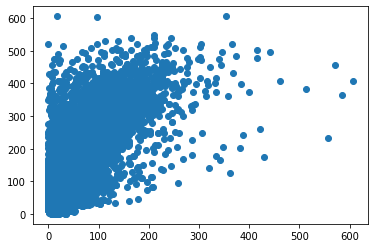

In [56]:
plt.scatter(box_sizes[:,0], box_sizes[:,1], label='True Position')

In [57]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(box_sizes)

KMeans(n_clusters=3)

In [58]:
print(kmeans.cluster_centers_)

[[ 38.9876002  104.43480349]
 [ 17.20146699  40.18766064]
 [100.04296477 264.5697414 ]]
